## CLEANING & FEATURE ENGINEERING

In [1]:
import copy
from seaborn.utils import os, np, plt, pd
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 500,
             'display.precision', 2)

In [3]:
from project_methods import MSc_Proj as proj

In [4]:
data_dir = 'PDS//'
os.listdir(data_dir)

['.ipynb_checkpoints',
 'adhoc.csv',
 'assessment.csv',
 'comorbid.csv',
 'enroll.csv',
 'event.csv',
 'nonpharmacotx.csv',
 'nutsuppl.csv',
 'participation.csv',
 'pharmacotx.csv',
 'profile.csv',
 'registry.csv']

In [5]:
start = 'PDS'
# fs = proj.file_search(start, search_file_type='csv', print_result=True)

partic_dict = proj.load_participant_based(start)
study_data_dict = proj.load_study_based(start)
visit_data_dict = proj.load_visit_based(start)

Starting search from: PDS

Starting search from: PDS

Starting search from: PDS



In [6]:
display(partic_dict.keys(), study_data_dict.keys(), visit_data_dict.keys())

dict_keys(['profile', 'pharm', 'nonpharm', 'nutsup', 'comorbid'])

dict_keys(['participation', 'event'])

dict_keys(['enroll', 'registry', 'assessment', 'ad_hoc'])

In [7]:
part_key_vars = ['subjid', 'visitnum', 'studyid', 'hdcat_0', 'hdcat_l']
partic = study_data_dict['participation']
hd_participants = proj.get_hd_categories(partic)

display(partic.info(), hd_participants.keys(), list(map(len, hd_participants.values())))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27665 entries, 0 to 27664
Data columns (total 55 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   subjid    27665 non-null  object 
 1   studyid   27665 non-null  object 
 2   study     27665 non-null  object 
 3   subjstat  27665 non-null  object 
 4   hdcat_0   25284 non-null  float64
 5   hdcat_l   25284 non-null  float64
 6   age_0     27665 non-null  object 
 7   rfstdy    27665 non-null  int64  
 8   rficdy    27363 non-null  float64
 9   rfendy    10478 non-null  float64
 10  dsterm    2972 non-null   float64
 11  evtnum    21116 non-null  float64
 12  visitnum  27665 non-null  int64  
 13  visit1    27665 non-null  object 
 14  visit2    21230 non-null  object 
 15  visit3    14705 non-null  object 
 16  visit4    9641 non-null   object 
 17  visit5    5691 non-null   object 
 18  visit6    2719 non-null   object 
 19  visit7    962 non-null    object 
 20  visit8    253 non-null    ob

None

dict_keys(['pre_manifest', 'manifest', 'gtype_negative', 'fam_controls'])

[5468, 11598, 2639, 2357]

In [8]:
profile = partic_dict['profile']
display(profile.info(), profile)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21116 entries, 0 to 21115
Data columns (total 62 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   subjid    21116 non-null  object 
 1   region    21116 non-null  object 
 2   sex       21116 non-null  object 
 3   race      21116 non-null  int64  
 4   handed    21116 non-null  int64  
 5   hxsid     18773 non-null  float64
 6   dssage    1011 non-null   float64
 7   dsplace   1010 non-null   float64
 8   dsend     1009 non-null   float64
 9   caghigh   21116 non-null  object 
 10  caglow    21116 non-null  object 
 11  momhd     18773 non-null  float64
 12  momagesx  9061 non-null   float64
 13  dadhd     18773 non-null  float64
 14  dadagesx  7941 non-null   float64
 15  fhx       21116 non-null  int64  
 16  ccmtr     18773 non-null  float64
 17  ccmtrage  12141 non-null  float64
 18  sxsubj    13332 non-null  float64
 19  sxsubjm   13176 non-null  float64
 20  sxs_m     1062 non-null   fl

None

,subjid,region,sex,race,handed,hxsid,dssage,dsplace,dsend,caghigh,caglow,momhd,momagesx,dadhd,dadagesx,fhx,ccmtr,ccmtrage,sxsubj,sxsubjm,sxs_m,sxs_c,sxs_p,sxs_o,sxfam,sxfamm,sxf_m,sxf_c,sxf_p,sxf_o,hddiagn,sxest,sxrater,sxestcfd,sxreas,sxgs,sxgsdy,sxraterm,sxr_m,sxr_c,sxr_p,sxr_o,ccdep,ccdepage,ccirb,ccirbage,ccvab,ccvabage,ccapt,ccaptage,ccpob,ccpobage,ccpsy,ccpsyage,ccpsyfh,cccog,cccogage,xgwas,xbsp,xpheno,xmorpho,ximage
0,R000024542,Northern America,m,1,1,0.0,NaN,NaN,NaN,44,19,1.0,50.0,0.0,NaN,1,1.0,42.0,42.0,1.0,NaN,NaN,NaN,NaN,42.0,1.0,NaN,NaN,NaN,NaN,47.0,1.0,42.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,1.0,46.0,0.0,NaN,0.0,NaN,1.0,46.0,0.0,NaN,NaN,0.0,NaN,1,0,0,0,0
1,R00010372X,Northern America,m,1,1,0.0,NaN,NaN,NaN,41,22,0.0,NaN,9999.0,NaN,1,1.0,61.0,60.0,6.0,1.0,NaN,1.0,NaN,60.0,6.0,1.0,NaN,1.0,NaN,64.0,1.0,60.0,2.0,NaN,NaN,NaN,6.0,1.0,NaN,1.0,NaN,1.0,59.0,1.0,59.0,1.0,59.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,1.0,63.0,1,0,0,0,0
2,R000147438,Europe,m,1,3,0.0,NaN,NaN,NaN,41,23,9999.0,NaN,9999.0,NaN,1,1.0,76.0,76.0,1.0,NaN,NaN,NaN,NaN,77.0,1.0,NaN,NaN,NaN,NaN,81.0,1.0,76.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,33.0,0.0,NaN,0.0,NaN,1.0,80.0,1.0,81.0,0.0,NaN,NaN,0.0,NaN,0,0,0,0,0
3,R00021725X,Europe,f,1,1,0.0,NaN,NaN,NaN,38,24,1.0,55.0,0.0,NaN,1,0.0,NaN,9997.0,9997.0,NaN,NaN,NaN,NaN,9997.0,9997.0,NaN,NaN,NaN,NaN,9998.0,NaN,NaN,NaN,NaN,NaN,NaN,9997.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,1,1,1,1,1
4,R00023946X,Europe,m,1,1,0.0,NaN,NaN,NaN,41,20,0.0,NaN,1.0,70.0,1,1.0,65.0,67.0,1.0,NaN,NaN,NaN,NaN,70.0,1.0,NaN,NaN,NaN,NaN,70.0,1.0,66.0,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,1.0,9997.0,1.0,71.0,1.0,75.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21111,R999841810,Europe,f,1,2,0.0,NaN,NaN,NaN,44,18,0.0,NaN,1.0,55.0,1,1.0,40.0,40.0,6.0,1.0,1.0,1.0,NaN,40.0,6.0,1.0,1.0,1.0,NaN,53.0,1.0,40.0,1.0,NaN,NaN,NaN,6.0,1.0,1.0,1.0,1.0,1.0,51.0,1.0,51.0,0.0,NaN,1.0,51.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0,0,0,0,0
21112,R999891140,Europe,m,1,1,0.0,NaN,NaN,NaN,40,26,0.0,NaN,1.0,65.0,1,1.0,59.0,60.0,6.0,1.0,NaN,1.0,NaN,60.0,1.0,NaN,NaN,NaN,NaN,61.0,1.0,60.0,1.0,NaN,NaN,NaN,6.0,1.0,NaN,1.0,NaN,1.0,62.0,1.0,60.0,0.0,NaN,1.0,62.0,1.0,62.0,0.0,NaN,NaN,0.0,NaN,0,0,0,0,0
21113,R99990772X,Europe,m,1,2,1.0,NaN,NaN,NaN,41,24,0.0,NaN,0.0,NaN,1,1.0,67.0,67.0,1.0,NaN,NaN,NaN,NaN,67.0,1.0,NaN,NaN,NaN,NaN,68.0,1.0,67.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,47.0,1.0,66.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,1,0,0,0,0
21114,R999989129,Europe,m,1,1,0.0,NaN,NaN,NaN,45,19,1.0,36.0,0.0,NaN,1,1.0,34.0,33.0,1.0,NaN,NaN,NaN,NaN,33.0,1.0,NaN,NaN,NaN,NaN,35.0,1.0,33.0,9998.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,38.0,0.0,NaN,0.0,NaN,1.0,38.0,0.0,NaN,0.0,NaN,NaN,1.0,40.0,1,0,0,0,0


In [9]:
prof_key_vars = ['subjid', 'race', 'region', 'sex', 'ccdep', 'cccog', 'ccapt', 'ccmtr', 'caghigh',
                 'caglow']
display(profile[prof_key_vars])
# profile_hd_categs = proj.hd_categorize_df(partic, profile)
# display(profile_hd_categs.keys(), list(map(pd.DataFrame.info, profile_hd_categs.values())))

,subjid,race,region,sex,ccdep,cccog,ccapt,ccmtr,caghigh,caglow
0,R000024542,1,Northern America,m,0.0,0.0,0.0,1.0,44,19
1,R00010372X,1,Northern America,m,1.0,1.0,0.0,1.0,41,22
2,R000147438,1,Europe,m,1.0,0.0,1.0,1.0,41,23
3,R00021725X,1,Europe,f,0.0,0.0,0.0,0.0,38,24
4,R00023946X,1,Europe,m,0.0,0.0,1.0,1.0,41,20
...,...,...,...,...,...,...,...,...,...,...
21111,R999841810,1,Europe,f,1.0,0.0,1.0,1.0,44,18
21112,R999891140,1,Europe,m,1.0,0.0,1.0,1.0,40,26
21113,R99990772X,1,Europe,m,1.0,0.0,0.0,1.0,41,24
21114,R999989129,1,Europe,m,1.0,1.0,1.0,1.0,45,19


In [10]:
pharm = partic_dict['pharm']
display(pharm.info(), pharm)
# pharm_hd_categs = proj.hd_categorize_df(partic, pharm)
# display(pharm_hd_categs.keys(), list(map(pd.DataFrame.info, pharm_hd_categs.values())))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110269 entries, 0 to 110268
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   subjid          110269 non-null  object 
 1   cmtrt__modify   110269 non-null  object 
 2   cmtrt__decod    110269 non-null  object 
 3   cmtrt__ing      110265 non-null  object 
 4   cmtrt__atc      110265 non-null  object 
 5   cmindc__modify  109825 non-null  object 
 6   cmindc__decod   110259 non-null  object 
 7   cmdostot        108796 non-null  float64
 8   cmdose__cmdosu  110267 non-null  object 
 9   cmdosfrq        110269 non-null  int64  
 10  cmroute         110269 non-null  int64  
 11  cmstdy          110269 non-null  int64  
 12  cmenrf          110269 non-null  int64  
 13  cmendy          46791 non-null   float64
dtypes: float64(2), int64(4), object(8)
memory usage: 11.8+ MB


None

,subjid,cmtrt__modify,cmtrt__decod,cmtrt__ing,cmtrt__atc,cmindc__modify,cmindc__decod,cmdostot,cmdose__cmdosu,cmdosfrq,cmroute,cmstdy,cmenrf,cmendy
0,R000024542,Xenazine,RX000090013,Tetrabenazine,N07XX,Chorea,CX997675208,37.50,milligram,1,1,0,0,283.0
1,R000024542,Aleve,RX000126663,Naproxen sodium,"G02CC,M01AE,M02AA",Back pain,CX862962203,440.00,milligram,1,1,-400,0,1045.0
2,R000024542,Xenazine,RX000090013,Tetrabenazine,N07XX,Chorea,CX997675208,100.00,milligram,1,1,283,0,1198.0
3,R000024542,Celexa,RX000069660,Citalopram hydrobromide,N06AB,Anxiety,CX797206714,20.00,milligram,1,1,194,1,NaN
4,R000024542,Clonazepam,RX000134155,Clonazepam,"N03AE,N05BA",Insomnia,CX959836908,0.25,milligram,1,1,-355,0,1061.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110264,R999989129,Escitalopram,RX000127620,Escitalopram,N06AB,Depression,CX875727542,5.00,milligram,1,1,-2142,0,-1489.0
110265,R999989129,Tetrabenazine,RX000135556,Tetrabenazine,N07XX,Chorea,CX997675208,12.50,milligram,1,1,-1994,0,-1835.0
110266,R999989129,Tetrabenazine,RX000135556,Tetrabenazine,N07XX,Chorea,CX997675208,12.50,milligram,1,1,-1834,0,-1645.0
110267,R999989129,Tetrabenazine,RX000135556,Tetrabenazine,N07XX,Chorea,CX997675208,25.00,milligram,1,1,-1644,1,NaN


In [11]:
# swallowing therapy
# cmtrt == 6
nonpharm_key_vars = ['subjid', 'cmtrt', 'cmfrq', 'cmdosfrq']
nonpharm = partic_dict['nonpharm']
display(nonpharm.info(), nonpharm[nonpharm_key_vars])
# nonpharm_hd_categs = proj.hd_categorize_df(partic, nonpharm)
# display(nonpharm_hd_categs.keys(), list(map(pd.DataFrame.info, nonpharm_hd_categs.values())))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15553 entries, 0 to 15552
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   subjid    15553 non-null  object 
 1   cmtrt     15553 non-null  int64  
 2   cmfrq     15553 non-null  float64
 3   cmdosfrq  15553 non-null  int64  
 4   cmstdy    15553 non-null  int64  
 5   cmenrf    15553 non-null  int64  
 6   cmendy    5644 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 850.7+ KB


None

,subjid,cmtrt,cmfrq,cmdosfrq
0,R000024542,1,3.0,2
1,R000147438,1,2.0,2
2,R00023946X,1,1.0,2
3,R00023946X,1,3.0,2
4,R00023946X,1,4.0,2
...,...,...,...,...
15548,R99990772X,1,1.0,2
15549,R999989129,1,2.0,2
15550,R999989129,5,2.0,2
15551,R999989129,3,2.0,2


In [12]:
# high calorie supplements
# cmcat == 7
nutsuppl_key_vars = ['subjid', 'cmcat',  'cmstdy', 'cmenrf', 'cmendy']
guide = {'cmcat':'supplement'}
nutsup = partic_dict['nutsup']#.rename(columns=guide)
display(nutsup.info(), nutsup[nutsuppl_key_vars])
# nutsup_hd_categs = proj.hd_categorize_df(partic, nutsup)
# display(nutsup_hd_categs.keys(), list(map(pd.DataFrame.info, nutsup_hd_categs.values())))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23261 entries, 0 to 23260
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subjid         23261 non-null  object 
 1   cmcat          23261 non-null  int64  
 2   cmtrt__modify  23261 non-null  object 
 3   cmtrt__decod   23261 non-null  object 
 4   cmtrt__atc     23261 non-null  object 
 5   cmtrt__ing     23261 non-null  object 
 6   cmdostot       23261 non-null  float64
 7   cmdosunit      23261 non-null  int64  
 8   cmdosfrq       23261 non-null  int64  
 9   cmstdy         23261 non-null  int64  
 10  cmenrf         23261 non-null  int64  
 11  cmendy         5812 non-null   float64
dtypes: float64(2), int64(5), object(5)
memory usage: 2.1+ MB


None

,subjid,cmcat,cmstdy,cmenrf,cmendy
0,R000024542,1,330,1,NaN
1,R00010372X,1,-1490,1,NaN
2,R00010372X,1,-137,1,NaN
3,R00010372X,1,-759,1,NaN
4,R00010372X,1,1955,1,NaN
...,...,...,...,...,...
23256,R999820346,1,807,1,NaN
23257,R999841810,1,-172,1,NaN
23258,R999993234,1,370,0,737.0
23259,R999993234,1,737,0,1050.0


In [13]:
comb_key_vars = ['subjid', 'mhbodsys']
comb = partic_dict['comorbid']
display(comb.info(), comb[comb_key_vars], proj.get_gastroint_issues(comb[comb_key_vars[-1]]))
# comb_hd_categs = proj.hd_categorize_df(partic, comb)
# display(comb_hd_categs.keys(), list(map(pd.DataFrame.info, comb_hd_categs.values())))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82320 entries, 0 to 82319
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   subjid          82320 non-null  object 
 1   mhterm__modify  82320 non-null  object 
 2   mhterm__decod   82320 non-null  object 
 3   mhbodsys        82320 non-null  int64  
 4   mhstdy          82320 non-null  int64  
 5   mhenrf          82320 non-null  int64  
 6   mhendy          33557 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 4.4+ MB


None

,subjid,mhbodsys
0,R000024542,14
1,R000024542,12
2,R000024542,13
3,R000024542,3
4,R000024542,11
...,...,...
82315,R999993234,14
82316,R999993234,8
82317,R999993234,13
82318,R999993234,8


0        0
1        0
2        0
3        0
4        0
        ..
82315    0
82316    0
82317    0
82318    0
82319    0
Name: mhbodsys, Length: 82320, dtype: int64

In [14]:
enroll = visit_data_dict['enroll']
display(enroll.info(), enroll)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67096 entries, 0 to 67095
Columns: 305 entries, subjid to dpdy
dtypes: float64(298), int64(2), object(5)
memory usage: 156.1+ MB


None

,subjid,studyid,seq,visit,visdy,visstat,age,hdcat,hxalcab,hxtobab,hxtobcpd,hxtobyos,hxpacky,hxdrugab,hxmar,hxmarfrq,hxher,hxherfrq,hxcoc,hxcocfrq,hxclb,hxclbfrq,hxamp,hxampfrq,hxrit,hxritfrq,hxhal,hxhalfrq,hxinh,hxinhfrq,hxopi,hxopifrq,hxpak,hxpakfrq,hxbar,hxbarfrq,hxtrq,hxtrqfrq,height,weight,bmi,alcab,alcunits,tobab,tobcpd,tobyos,packy,cafab,cafpd,drugab,mar,marfrq,her,herfrq,coc,cocfrq,clb,clbfrq,amp,ampfrq,rit,ritfrq,hal,halfrq,inh,inhfrq,opi,opifrq,pak,pakfrq,bar,barfrq,trq,trqfrq,updsc,maristat,res,isced,jobclas,jobpaid,rdcwk,rdcwkd,rdcwkhw,emplnrsn,emplnrd,ssdb,rtrnwk,rtrddur,updmed,updmh,updhdh,updfh,motscore,miscore,ocularh,ocularv,sacinith,sacinitv,sacvelh,sacvelv,dysarth,tongue,fingtapr,fingtapl,prosupr,prosupl,luria,rigarmr,rigarml,brady,dysttrnk,dystrue,dystlue,dystrle,dystlle,chorface,chorbol,chortrnk,chorrue,chorlue,chorrle,chorlle,gait,tandem,retropls,diagconf,tfcscore,occupatn,finances,chores,adl,carelevl,fascore,fiscore,emplusl,emplany,volunt,fafinan,grocery,cash,supchild,drive,housewrk,laundry,prepmeal,telephon,ownmeds,feedself,dress,bathe,pubtrans,walknbr,walkfall,walkhelp,comb,trnchair,bed,toilet,carehome,indepscl,gen1,gen2,gen3,gen4,gen5,gen6,sdmt,sdmt1,sdmt2,sdmtnd,verfct,verfctd,verfct5,verfct6,verfct7,verfctnd,scnt,scnt1,scnt2,scnt3,scntnd,swrt,swrt1,swrt2,swrt3,swrtnd,sit,sit1,sit2,sit3,trl,trla1,trla2,trla3,trlb1,trlb2,trlb3,verflt,verflt05,verflt06,verflt07,mmsetotal,tug,tug1,scst,scst1,depscore,irascore,psyscore,aptscore,exfscore,pbas1sv,pbas1fr,pbas1wo,pbas2sv,pbas2fr,pbas2wo,pbas3sv,pbas3fr,pbas3wo,pbas4sv,pbas4fr,pbas4wo,pbas5sv,pbas5fr,pbas5wo,pbas6sv,pbas6fr,pbas6wo,pbas7sv,pbas7fr,pbas7wo,pbas8sv,pbas8fr,pbas8wo,pbas9sv,pbas9fr,pbas9wo,pbas10sv,pbas10sm__1,pbas10sm__2,pbas10sm__3,pbas10sm__4,pbas10sm__5,pbas10fr,pbas10wo,pbas11sv,pbas11fr,pbas11wo,pbainfo,pbahshd,scoring,pf,rp,bp,gh,vt,sf,re,mh,pcs,mcs,anxscore,hads_depscore,irrscore,outscore,inwscore,wpaiscr1,wpaiscr2,wpaiscr3,wpaiscr4,sid1,sid2,sid3,sid4,sid5,int1,int2,int3,int4,int5,int6,sbh1,sbh1n,sbh2,sbh3,sbh3n,sbh4,sbh4n,sbh5,sbh6,sbh7,attmpt1dy,attmpt11,attmpt12,attmpt2dy,attmpt21,attmpt22,attmpt3dy,attmpt31,attmpt32,mvsrc,mvrsn,crlvl,dpdy
0,R000024542,ENR,1,Baseline,0,completed,48,3.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185.4,67.9,19.8,1.0,9998.0,0.0,NaN,NaN,NaN,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,4.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,28.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,4.0,11.0,2.0,2.0,2.0,3.0,2.0,24.0,24.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,95.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,21.0,1.0,NaN,1.0,1.0,11.0,0.0,1.0,NaN,1.0,43.0,0.0,0.0,NaN,1.0,45.0,0.0,3.0,NaN,1.0,21.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,0.0,0.0,25.0,NaN,NaN,NaN,NaN,8.0,10.0,0.0,1.0,6.0,0.0,0.0,9997.0,0.0,0.0,9997.0,2.0,4.0,9997.0,3.0,2.0,9997.0,2.0,2.0,9997.0,1.0,1.0,9997.0,2.0,3.0,9997.0,0.0,0.0,9997.0,0.0,0.0,9997.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,9997.0,0.0,0.0,9997.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,R000024542,ENR,2,Follow Up,371,completed,49,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185.0,67.2,19.6,1.0,9998.0,0.0,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,32.0,32.0,1.0,1.0,1.0,2.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,11.0,2.0,2.

#### Engineer has_chorea
to indicate if a participant is exhibiting chorea in any part of the body (face, trunk, etc)

In [15]:
chorea_vars = proj.get_columns_with_pattern(enroll, 'chor').drop('chores', axis=1)
display(chorea_vars)
chorea_indicator = pd.Series(chorea_vars.apply(lambda row: 1 if sum(tuple(row)) > 0 else 0, axis=1),
                             name='manifested_chorea')
display(chorea_indicator)
enroll = pd.concat([enroll, chorea_indicator], axis=1)
display(enroll['manifested_chorea'])

,chorface,chorbol,chortrnk,chorrue,chorlue,chorrle,chorlle
0,2.0,1.0,2.0,2.0,2.0,1.0,1.0
1,2.0,2.0,2.0,1.0,1.0,1.0,1.0
2,2.0,2.0,3.0,4.0,4.0,3.0,3.0
3,2.0,2.0,3.0,3.0,2.0,3.0,3.0
4,3.0,3.0,3.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...
67091,1.0,2.0,2.0,1.0,1.0,2.0,2.0
67092,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67093,0.0,0.0,1.0,0.0,0.0,0.0,0.0
67094,0.0,1.0,1.0,0.0,0.0,0.0,0.0


0        1
1        1
2        1
3        1
4        1
        ..
67091    1
67092    0
67093    1
67094    1
67095    0
Name: manifested_chorea, Length: 67096, dtype: int64

0        1
1        1
2        1
3        1
4        1
        ..
67091    1
67092    0
67093    1
67094    1
67095    0
Name: manifested_chorea, Length: 67096, dtype: int64

In [16]:
chorea_indicator.sum()/len(chorea_indicator)

0.48071420054846786

,subjid,studyid,hdcat,weight,height,bmi,seq,visdy,age,manifested_chorea,motscore,miscore,indepscl,fiscore,fascore,tfcscore,depscore,aptscore,exfscore,prepmeal,feedself,pubtrans,walknbr,walkfall,walkhelp,grocery
0,R000024542,ENR,3.0,67.9,185.4,19.8,1,0,48,1,28.0,28.0,95.0,24.0,24.0,11.0,8.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,R000024542,ENR,3.0,67.2,185.0,19.6,2,371,49,1,32.0,32.0,80.0,22.0,22.0,11.0,4.0,3.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,R000024542,ENR,3.0,65.4,185.0,19.1,3,734,50,1,45.0,45.0,75.0,20.0,20.0,11.0,3.0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
3,R000024542,ENR,3.0,63.8,185.0,18.6,4,1098,51,1,45.0,45.0,65.0,12.0,12.0,8.0,0.0,9.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,R000024542,ENR,3.0,62.5,185.0,18.3,5,1469,52,1,47.0,47.0,70.0,15.0,15.0,6.0,0.0,0.0,6.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67091,R999989129,ENR,3.0,73.0,180.0,22.5,1,0,44,1,32.0,32.0,80.0,20.0,20.0,9.0,0.0,6.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
67092,R999993234,ENR,2.0,57.0,168.0,20.2,1,0,47,0,0.0,0.0,100.0,25.0,25.0,13.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
67093,R999993234,ENR,2.0,57.3,167.6,20.4,2,380,48,1,1.0,1.0,100.0,25.0,25.0,13.0,0.0,0.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
67094,R999993234,ENR,2.0,57.0,167.0,20.4,3,777,49,1,2.0,2.0,100.0,25.0,25.0,13.0,0.0,0.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


subjid                   0
studyid                  0
seq                      0
visdy                    0
age                      0
manifested_chorea        0
weight               10917
height               10917
hdcat                10918
walkfall             10973
walknbr              10973
pubtrans             10973
feedself             10973
prepmeal             10973
indepscl             10973
walkhelp             10973
grocery              10973
miscore              11044
fiscore              11051
tfcscore             11115
motscore             11423
aptscore             11622
depscore             11638
exfscore             11738
fascore              12030
bmi                  12379
dtype: int64


Only columns with null values are included

In percentage

Only columns with null values are included


No handles with labels found to put in legend.
W:\MSc-AIDS-UoH\Trimester_3\project_methods.py:1634: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(np.round(axis.get_xticks(), precision), fontdict={'fontsize':xy_ticksize})


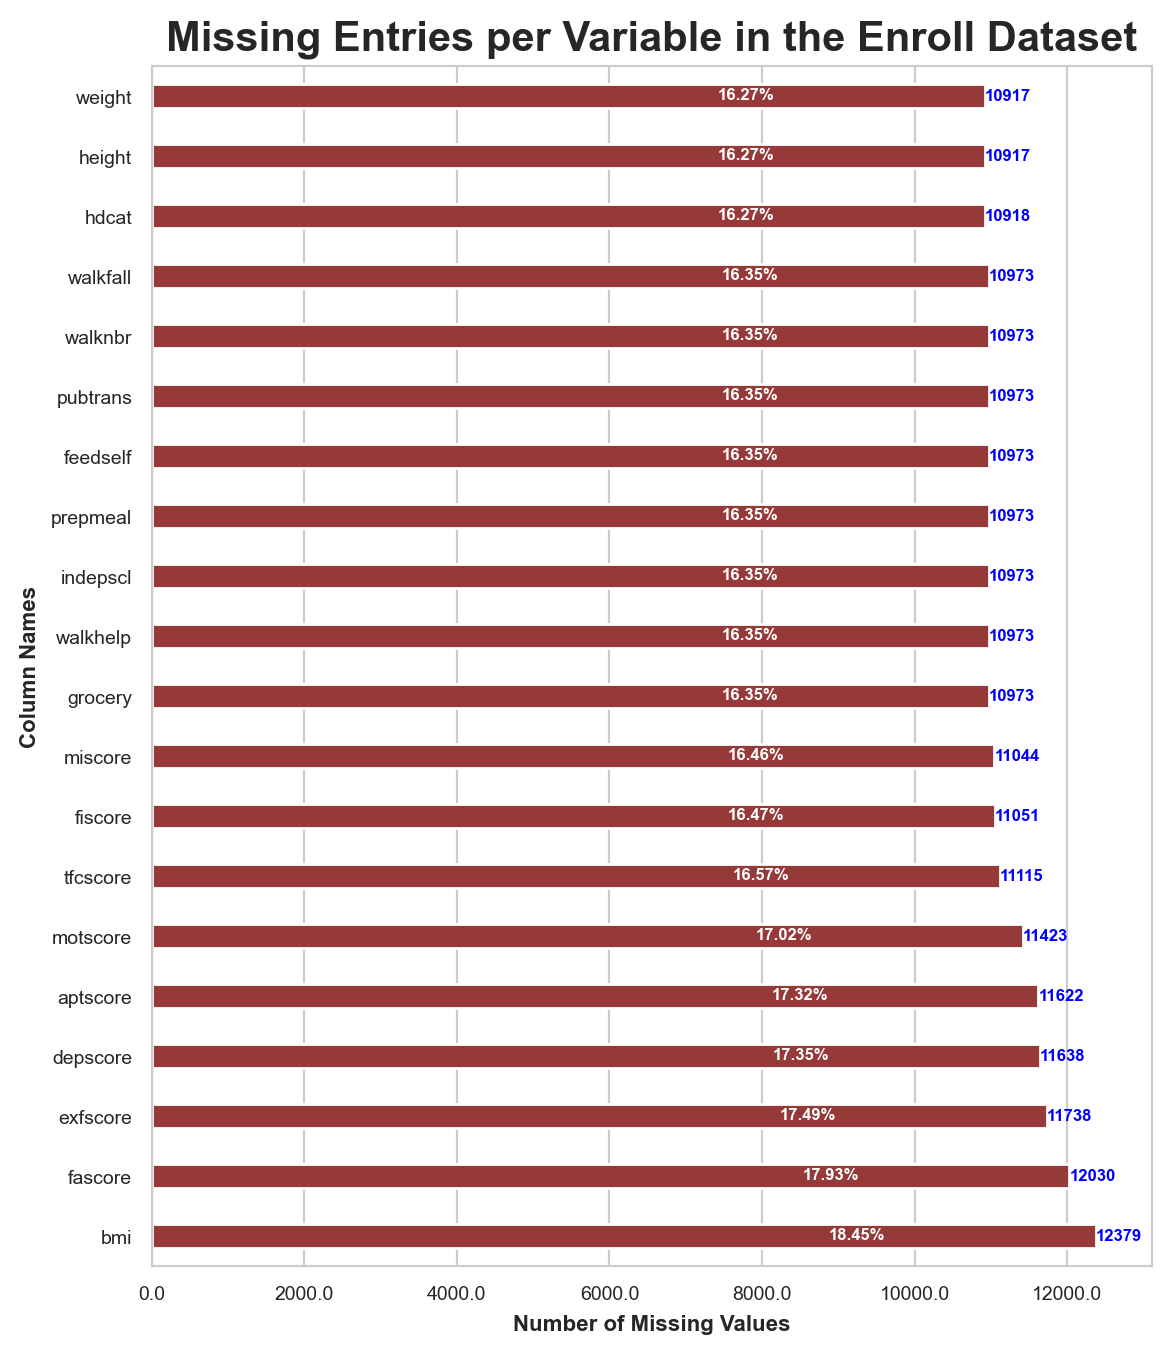

In [17]:
# hd_stat = partic[['subjid', 'studyid', 'hdcat_0', 'hdcat_l']]
# enroll = pd.merge(hd_stat, enroll, on=['subjid', 'studyid'])
enr_key_vars = ['subjid', 'studyid', 'hdcat', 'weight', 'height', 'bmi', 'seq', 'visdy', 'age', 'manifested_chorea',
                'motscore', 'miscore', 'indepscl','fiscore', 'fascore', 'tfcscore', 'depscore', 'aptscore', 
                'exfscore', 'prepmeal', 'feedself', 'pubtrans', 'walknbr', 'walkfall', 'walkhelp', 'grocery']
display(enroll[enr_key_vars], proj.null_checker(enroll[enr_key_vars]))
proj.visualize_nulls(enroll[enr_key_vars], plot_title='Missing Entries per Variable in the Enroll Dataset', use_bar=True,
                     include_perc=True, perc_total=enroll.shape[0], perc_labe_gap=-3500, h_labe_shift=-0.45,
                     perc_labe_color='white', reduce_barw_by=2, fig_size=(5, 6))
# display(proj.compare_variables(enroll[enr_key_vars[2]], enroll[enr_key_vars[1]], where_equal=False))#.sample(10))

### MERGE RECORDS

In [18]:
# join profile to enroll
enrl = pd.merge(profile[prof_key_vars], enroll[enr_key_vars], on='subjid')
enrl

,subjid,race,region,sex,ccdep,cccog,ccapt,ccmtr,caghigh,caglow,studyid,hdcat,weight,height,bmi,seq,visdy,age,manifested_chorea,motscore,miscore,indepscl,fiscore,fascore,tfcscore,depscore,aptscore,exfscore,prepmeal,feedself,pubtrans,walknbr,walkfall,walkhelp,grocery
0,R000024542,1,Northern America,m,0.0,0.0,0.0,1.0,44,19,ENR,3.0,67.9,185.4,19.8,1,0,48,1,28.0,28.0,95.0,24.0,24.0,11.0,8.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,R000024542,1,Northern America,m,0.0,0.0,0.0,1.0,44,19,ENR,3.0,67.2,185.0,19.6,2,371,49,1,32.0,32.0,80.0,22.0,22.0,11.0,4.0,3.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,R000024542,1,Northern America,m,0.0,0.0,0.0,1.0,44,19,ENR,3.0,65.4,185.0,19.1,3,734,50,1,45.0,45.0,75.0,20.0,20.0,11.0,3.0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
3,R000024542,1,Northern America,m,0.0,0.0,0.0,1.0,44,19,ENR,3.0,63.8,185.0,18.6,4,1098,51,1,45.0,45.0,65.0,12.0,12.0,8.0,0.0,9.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,R000024542,1,Northern America,m,0.0,0.0,0.0,1.0,44,19,ENR,3.0,62.5,185.0,18.3,5,1469,52,1,47.0,47.0,70.0,15.0,15.0,6.0,0.0,0.0,6.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67091,R999989129,1,Europe,m,1.0,1.0,1.0,1.0,45,19,ENR,3.0,73.0,180.0,22.5,1,0,44,1,32.0,32.0,80.0,20.0,20.0,9.0,0.0,6.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
67092,R999993234,1,Europe,f,1.0,0.0,1.0,0.0,41,17,ENR,2.0,57.0,168.0,20.2,1,0,47,0,0.0,0.0,100.0,25.0,25.0,13.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
67093,R999993234,1,Europe,f,1.0,0.0,1.0,0.0,41,17,ENR,2.0,57.3,167.6,20.4,2,380,48,1,1.0,1.0,100.0,25.0,25.0,13.0,0.0,0.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
67094,R999993234,1,Europe,f,1.0,0.0,1.0,0.0,41,17,ENR,2.0,57.0,167.0,20.4,3,777,49,1,2.0,2.0,100.0,25.0,25.0,13.0,0.0,0.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [19]:
# join participation to enroll
enrl = pd.merge(partic[part_key_vars], enrl, on=['subjid', 'studyid'])
enrl

,subjid,visitnum,studyid,hdcat_0,hdcat_l,race,region,sex,ccdep,cccog,ccapt,ccmtr,caghigh,caglow,hdcat,weight,height,bmi,seq,visdy,age,manifested_chorea,motscore,miscore,indepscl,fiscore,fascore,tfcscore,depscore,aptscore,exfscore,prepmeal,feedself,pubtrans,walknbr,walkfall,walkhelp,grocery
0,R000024542,6,ENR,3.0,3.0,1,Northern America,m,0.0,0.0,0.0,1.0,44,19,3.0,67.9,185.4,19.8,1,0,48,1,28.0,28.0,95.0,24.0,24.0,11.0,8.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,R000024542,6,ENR,3.0,3.0,1,Northern America,m,0.0,0.0,0.0,1.0,44,19,3.0,67.2,185.0,19.6,2,371,49,1,32.0,32.0,80.0,22.0,22.0,11.0,4.0,3.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,R000024542,6,ENR,3.0,3.0,1,Northern America,m,0.0,0.0,0.0,1.0,44,19,3.0,65.4,185.0,19.1,3,734,50,1,45.0,45.0,75.0,20.0,20.0,11.0,3.0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
3,R000024542,6,ENR,3.0,3.0,1,Northern America,m,0.0,0.0,0.0,1.0,44,19,3.0,63.8,185.0,18.6,4,1098,51,1,45.0,45.0,65.0,12.0,12.0,8.0,0.0,9.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,R000024542,6,ENR,3.0,3.0,1,Northern America,m,0.0,0.0,0.0,1.0,44,19,3.0,62.5,185.0,18.3,5,1469,52,1,47.0,47.0,70.0,15.0,15.0,6.0,0.0,0.0,6.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67091,R999989129,1,ENR,3.0,3.0,1,Europe,m,1.0,1.0,1.0,1.0,45,19,3.0,73.0,180.0,22.5,1,0,44,1,32.0,32.0,80.0,20.0,20.0,9.0,0.0,6.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
67092,R999993234,4,ENR,2.0,2.0,1,Europe,f,1.0,0.0,1.0,0.0,41,17,2.0,57.0,168.0,20.2,1,0,47,0,0.0,0.0,100.0,25.0,25.0,13.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
67093,R999993234,4,ENR,2.0,2.0,1,Europe,f,1.0,0.0,1.0,0.0,41,17,2.0,57.3,167.6,20.4,2,380,48,1,1.0,1.0,100.0,25.0,25.0,13.0,0.0,0.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
67094,R999993234,4,ENR,2.0,2.0,1,Europe,f,1.0,0.0,1.0,0.0,41,17,2.0,57.0,167.0,20.4,3,777,49,1,2.0,2.0,100.0,25.0,25.0,13.0,0.0,0.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### Clean up enroll + profile + participation

In [20]:
for col in enrl.columns:
    print(f"{col}:\n{np.sort(enrl[col].unique())}\n\n")

subjid:
['R000024542' 'R00010372X' 'R000147438' ... 'R99990772X' 'R999989129'
 'R999993234']


visitnum:
[ 1  2  3  4  5  6  7  8  9 10 11 12 14 15]


studyid:
['ENR']


hdcat_0:
[2. 3. 4. 5.]


hdcat_l:
[2. 3. 4. 5.]


race:
[   1    2    3    6    8   15   16 9998]


region:
['Australasia' 'Europe' 'Latin America' 'Northern America']


sex:
['f' 'm']


ccdep:
[0.000e+00 1.000e+00 9.996e+03 9.997e+03 9.998e+03       nan]


cccog:
[0.000e+00 1.000e+00 9.996e+03 9.997e+03 9.998e+03       nan]


ccapt:
[0.000e+00 1.000e+00 9.997e+03 9.998e+03       nan]


ccmtr:
[0.000e+00 1.000e+00 9.996e+03 9.997e+03 9.998e+03       nan]


caghigh:
['12' '13' '14' '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25'
 '26' '27' '28' '29' '30' '31' '32' '33' '34' '35' '36' '37' '38' '39'
 '40' '41' '42' '43' '44' '45' '46' '47' '48' '49' '50' '51' '52' '53'
 '54' '55' '56' '57' '58' '59' '60' '61' '62' '63' '64' '65' '66' '67'
 '68' '69' '70' '>70']


caglow:
['10' '11' '12' '13' '14' '15' '16' '17' '1

prepmeal:
[0.000e+00 1.000e+00 9.997e+03 9.998e+03       nan]


feedself:
[0.000e+00 1.000e+00 9.997e+03 9.998e+03       nan]


pubtrans:
[0.000e+00 1.000e+00 9.996e+03 9.997e+03 9.998e+03       nan]


walknbr:
[0.000e+00 1.000e+00 9.997e+03 9.998e+03       nan]


walkfall:
[0.000e+00 1.000e+00 9.997e+03 9.998e+03       nan]


walkhelp:
[0.000e+00 1.000e+00 9.997e+03 9.998e+03       nan]


grocery:
[0.000e+00 1.000e+00 9.997e+03 9.998e+03       nan]




#### Return placeholders 999- to nan

In [21]:
repl_guide = {9996:np.nan, 9997:np.nan, 9998:np.nan, 9999:np.nan}
enrl = proj.replace_value_with(enrl, repl_guide)
enrl

,subjid,visitnum,studyid,hdcat_0,hdcat_l,race,region,sex,ccdep,cccog,ccapt,ccmtr,caghigh,caglow,hdcat,weight,height,bmi,seq,visdy,age,manifested_chorea,motscore,miscore,indepscl,fiscore,fascore,tfcscore,depscore,aptscore,exfscore,prepmeal,feedself,pubtrans,walknbr,walkfall,walkhelp,grocery
0,R000024542,6,ENR,3.0,3.0,1.0,Northern America,m,0.0,0.0,0.0,1.0,44,19,3.0,67.9,185.4,19.8,1,0,48,1,28.0,28.0,95.0,24.0,24.0,11.0,8.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,R000024542,6,ENR,3.0,3.0,1.0,Northern America,m,0.0,0.0,0.0,1.0,44,19,3.0,67.2,185.0,19.6,2,371,49,1,32.0,32.0,80.0,22.0,22.0,11.0,4.0,3.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,R000024542,6,ENR,3.0,3.0,1.0,Northern America,m,0.0,0.0,0.0,1.0,44,19,3.0,65.4,185.0,19.1,3,734,50,1,45.0,45.0,75.0,20.0,20.0,11.0,3.0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
3,R000024542,6,ENR,3.0,3.0,1.0,Northern America,m,0.0,0.0,0.0,1.0,44,19,3.0,63.8,185.0,18.6,4,1098,51,1,45.0,45.0,65.0,12.0,12.0,8.0,0.0,9.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,R000024542,6,ENR,3.0,3.0,1.0,Northern America,m,0.0,0.0,0.0,1.0,44,19,3.0,62.5,185.0,18.3,5,1469,52,1,47.0,47.0,70.0,15.0,15.0,6.0,0.0,0.0,6.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67091,R999989129,1,ENR,3.0,3.0,1.0,Europe,m,1.0,1.0,1.0,1.0,45,19,3.0,73.0,180.0,22.5,1,0,44,1,32.0,32.0,80.0,20.0,20.0,9.0,0.0,6.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
67092,R999993234,4,ENR,2.0,2.0,1.0,Europe,f,1.0,0.0,1.0,0.0,41,17,2.0,57.0,168.0,20.2,1,0,47,0,0.0,0.0,100.0,25.0,25.0,13.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
67093,R999993234,4,ENR,2.0,2.0,1.0,Europe,f,1.0,0.0,1.0,0.0,41,17,2.0,57.3,167.6,20.4,2,380,48,1,1.0,1.0,100.0,25.0,25.0,13.0,0.0,0.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
67094,R999993234,4,ENR,2.0,2.0,1.0,Europe,f,1.0,0.0,1.0,0.0,41,17,2.0,57.0,167.0,20.4,3,777,49,1,2.0,2.0,100.0,25.0,25.0,13.0,0.0,0.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [22]:
for col in enrl.columns:
    print(f"{col}:\n{np.sort(enrl[col].unique())}\n\n")

subjid:
['R000024542' 'R00010372X' 'R000147438' ... 'R99990772X' 'R999989129'
 'R999993234']


visitnum:
[ 1  2  3  4  5  6  7  8  9 10 11 12 14 15]


studyid:
['ENR']


hdcat_0:
[2. 3. 4. 5.]


hdcat_l:
[2. 3. 4. 5.]


race:
[ 1.  2.  3.  6.  8. 15. 16. nan]


region:
['Australasia' 'Europe' 'Latin America' 'Northern America']


sex:
['f' 'm']


ccdep:
[ 0.  1. nan]


cccog:
[ 0.  1. nan]


ccapt:
[ 0.  1. nan]


ccmtr:
[ 0.  1. nan]


caghigh:
['12' '13' '14' '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25'
 '26' '27' '28' '29' '30' '31' '32' '33' '34' '35' '36' '37' '38' '39'
 '40' '41' '42' '43' '44' '45' '46' '47' '48' '49' '50' '51' '52' '53'
 '54' '55' '56' '57' '58' '59' '60' '61' '62' '63' '64' '65' '66' '67'
 '68' '69' '70' '>70']


caglow:
['10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '20' '21' '22' '23'
 '24' '25' '26' '27' '28' '8' '9' '>28']


hdcat:
[ 2.  3.  4.  5. nan]


weight:
[ 18.8  19.   19.7 ... 204.1 214.6   nan]


height:
[101.6 104.  108.  115.  116

aptscore:
[ 0.  1.  2.  3.  4.  6.  8.  9. 12. 16. nan]


exfscore:
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 24. 25. 28. 32. nan]


prepmeal:
[ 0.  1. nan]


feedself:
[ 0.  1. nan]


pubtrans:
[ 0.  1. nan]


walknbr:
[ 0.  1. nan]


walkfall:
[ 0.  1. nan]


walkhelp:
[ 0.  1. nan]


grocery:
[ 0.  1. nan]





Only columns with null values are included

In percentage

Only columns with null values are included


No handles with labels found to put in legend.
W:\MSc-AIDS-UoH\Trimester_3\project_methods.py:1634: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(np.round(axis.get_xticks(), precision), fontdict={'fontsize':xy_ticksize})


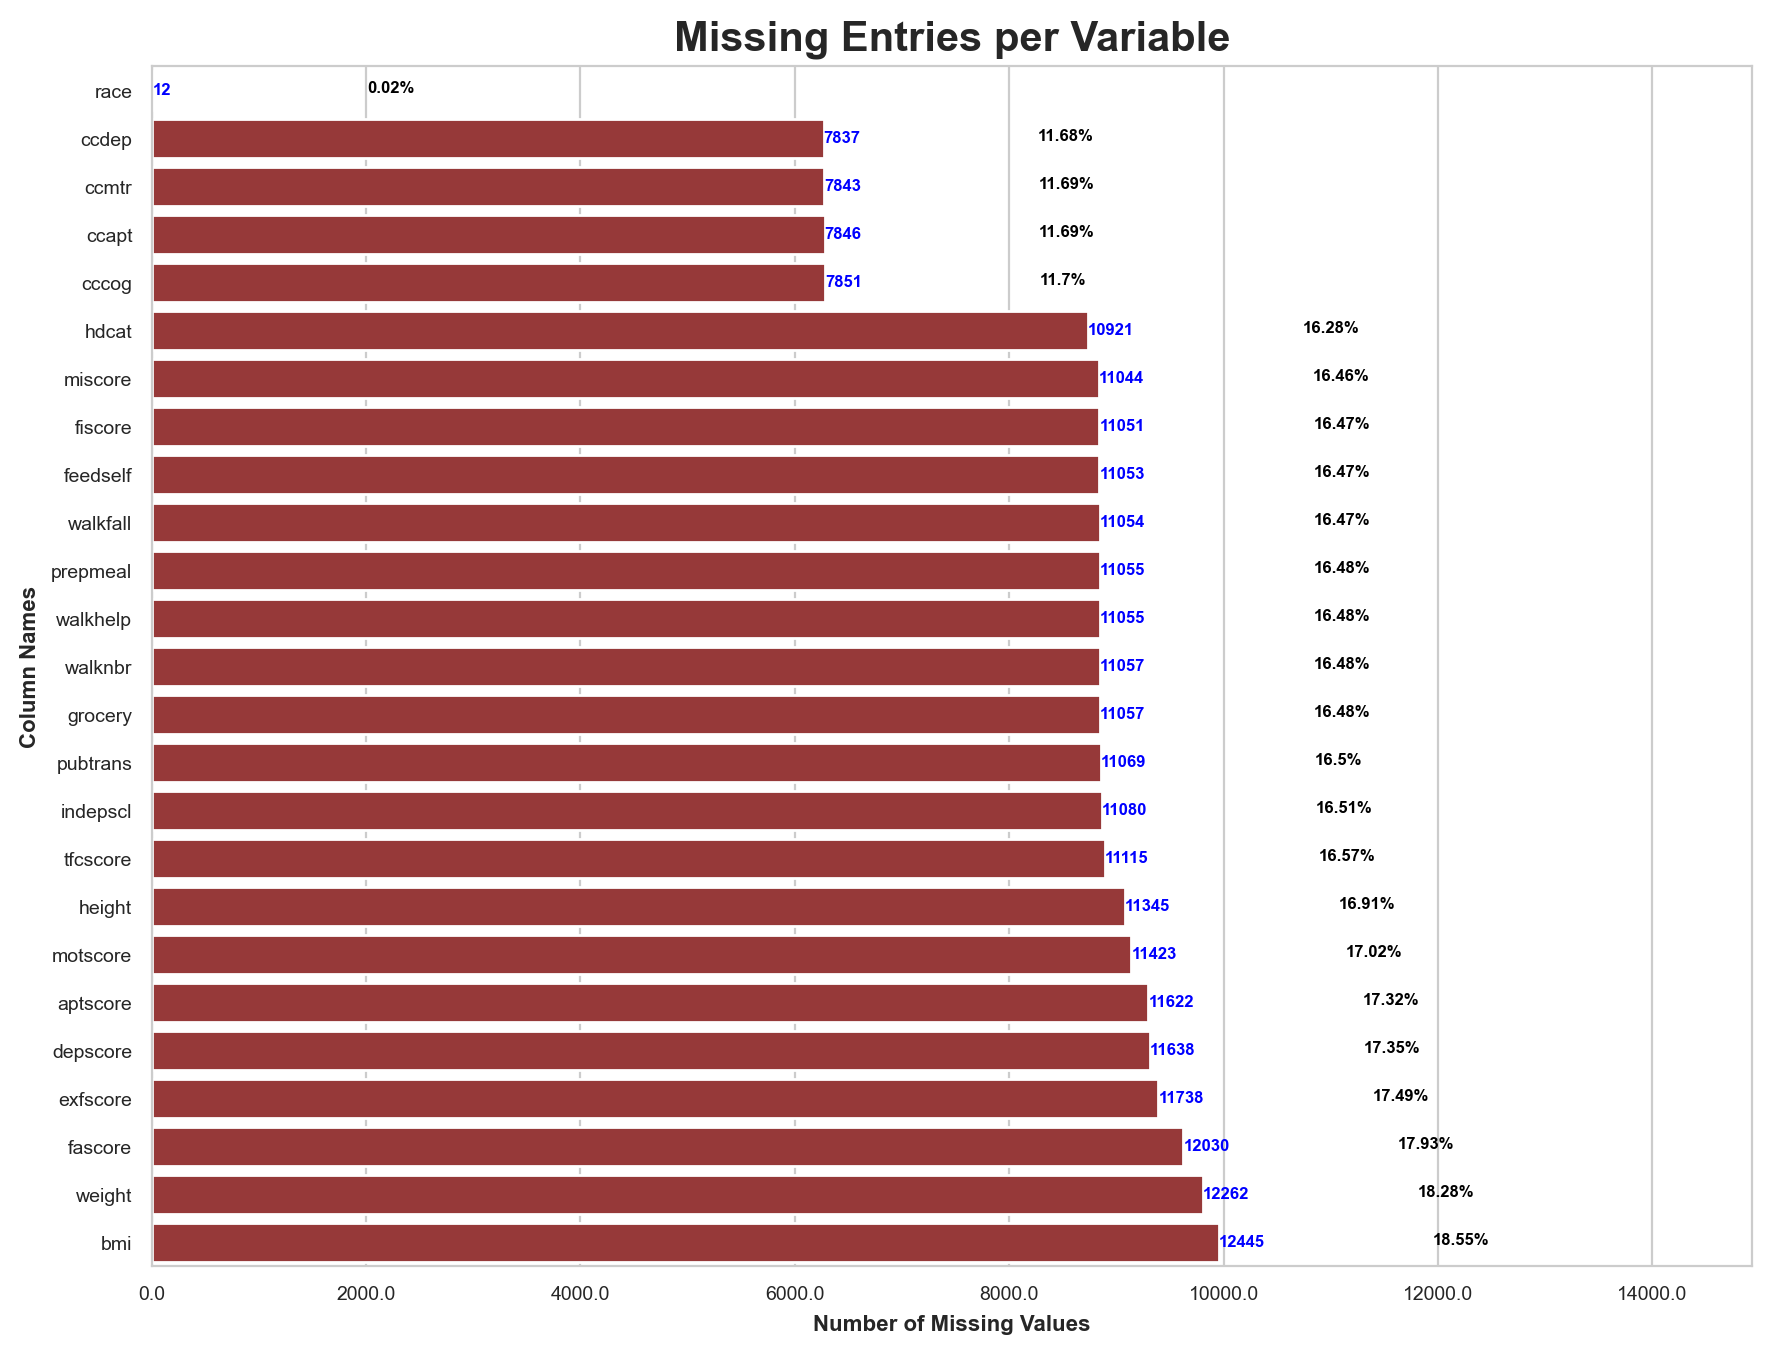

In [23]:
proj.visualize_nulls(enrl, use_bar=True, include_perc=True, perc_total=len(enrl), 
                     perc_labe_gap=2500, h_labe_shift=-0.45)

### Determine Participants Duration  in Study

In [24]:
cols = ['subjid', 'visdy']
# group up visitation (in days) per subject
agg_look = enrl[cols].groupby(cols[0]).agg(tuple).reset_index()

# compute duration by subtracting last visitation day from the baseline
agg_look.loc[:, 'study_timeyr'] = agg_look.visdy.apply(lambda x: x[-1] / 365).round(1)
# display(agg_look)

# attach duration to enrl
enrl = pd.merge(enrl, agg_look[['subjid', 'study_timeyr']], on='subjid')
display(enrl)

,subjid,visitnum,studyid,hdcat_0,hdcat_l,race,region,sex,ccdep,cccog,ccapt,ccmtr,caghigh,caglow,hdcat,weight,height,bmi,seq,visdy,age,manifested_chorea,motscore,miscore,indepscl,fiscore,fascore,tfcscore,depscore,aptscore,exfscore,prepmeal,feedself,pubtrans,walknbr,walkfall,walkhelp,grocery,study_timeyr
0,R000024542,6,ENR,3.0,3.0,1.0,Northern America,m,0.0,0.0,0.0,1.0,44,19,3.0,67.9,185.4,19.8,1,0,48,1,28.0,28.0,95.0,24.0,24.0,11.0,8.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.2
1,R000024542,6,ENR,3.0,3.0,1.0,Northern America,m,0.0,0.0,0.0,1.0,44,19,3.0,67.2,185.0,19.6,2,371,49,1,32.0,32.0,80.0,22.0,22.0,11.0,4.0,3.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.2
2,R000024542,6,ENR,3.0,3.0,1.0,Northern America,m,0.0,0.0,0.0,1.0,44,19,3.0,65.4,185.0,19.1,3,734,50,1,45.0,45.0,75.0,20.0,20.0,11.0,3.0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,5.2
3,R000024542,6,ENR,3.0,3.0,1.0,Northern America,m,0.0,0.0,0.0,1.0,44,19,3.0,63.8,185.0,18.6,4,1098,51,1,45.0,45.0,65.0,12.0,12.0,8.0,0.0,9.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,5.2
4,R000024542,6,ENR,3.0,3.0,1.0,Northern America,m,0.0,0.0,0.0,1.0,44,19,3.0,62.5,185.0,18.3,5,1469,52,1,47.0,47.0,70.0,15.0,15.0,6.0,0.0,0.0,6.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,5.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67091,R999989129,1,ENR,3.0,3.0,1.0,Europe,m,1.0,1.0,1.0,1.0,45,19,3.0,73.0,180.0,22.5,1,0,44,1,32.0,32.0,80.0,20.0,20.0,9.0,0.0,6.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
67092,R999993234,4,ENR,2.0,2.0,1.0,Europe,f,1.0,0.0,1.0,0.0,41,17,2.0,57.0,168.0,20.2,1,0,47,0,0.0,0.0,100.0,25.0,25.0,13.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.2
67093,R999993234,4,ENR,2.0,2.0,1.0,Europe,f,1.0,0.0,1.0,0.0,41,17,2.0,57.3,167.6,20.4,2,380,48,1,1.0,1.0,100.0,25.0,25.0,13.0,0.0,0.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.2
67094,R999993234,4,ENR,2.0,2.0,1.0,Europe,f,1.0,0.0,1.0,0.0,41,17,2.0,57.0,167.0,20.4,3,777,49,1,2.0,2.0,100.0,25.0,25.0,13.0,0.0,0.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.2


### Impute missing weight and height with participant's average

In [25]:
display(proj.null_checker(enrl[['weight', 'height']]))
# join the filled entries with not null entries at index
new_w = proj.impute_null_values(enrl, pivot_cols=['subjid'], target_col='weight')
new_h = proj.impute_null_values(enrl, pivot_cols=['subjid'], target_col='height')
display(new_w, new_h)
enrl.loc[:, 'height'] = new_h
enrl.loc[:, 'weight'] = new_w
display(proj.null_checker(enrl[['weight', 'height']]))

height    11345
weight    12262
dtype: int64

0        67.9
1        67.2
2        65.4
3        63.8
4        62.5
         ... 
67091    73.0
67092    57.0
67093    57.3
67094    57.0
67095    60.0
Name: weight, Length: 67096, dtype: float64

0        185.4
1        185.0
2        185.0
3        185.0
4        185.0
         ...  
67091    180.0
67092    168.0
67093    167.6
67094    167.0
67095    167.0
Name: height, Length: 67096, dtype: float64

weight    0
height    0
dtype: int64

### Recompute BMI 


Only columns with null values are included

In percentage

Only columns with null values are included


No handles with labels found to put in legend.
W:\MSc-AIDS-UoH\Trimester_3\project_methods.py:1634: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(np.round(axis.get_xticks(), precision), fontdict={'fontsize':xy_ticksize})


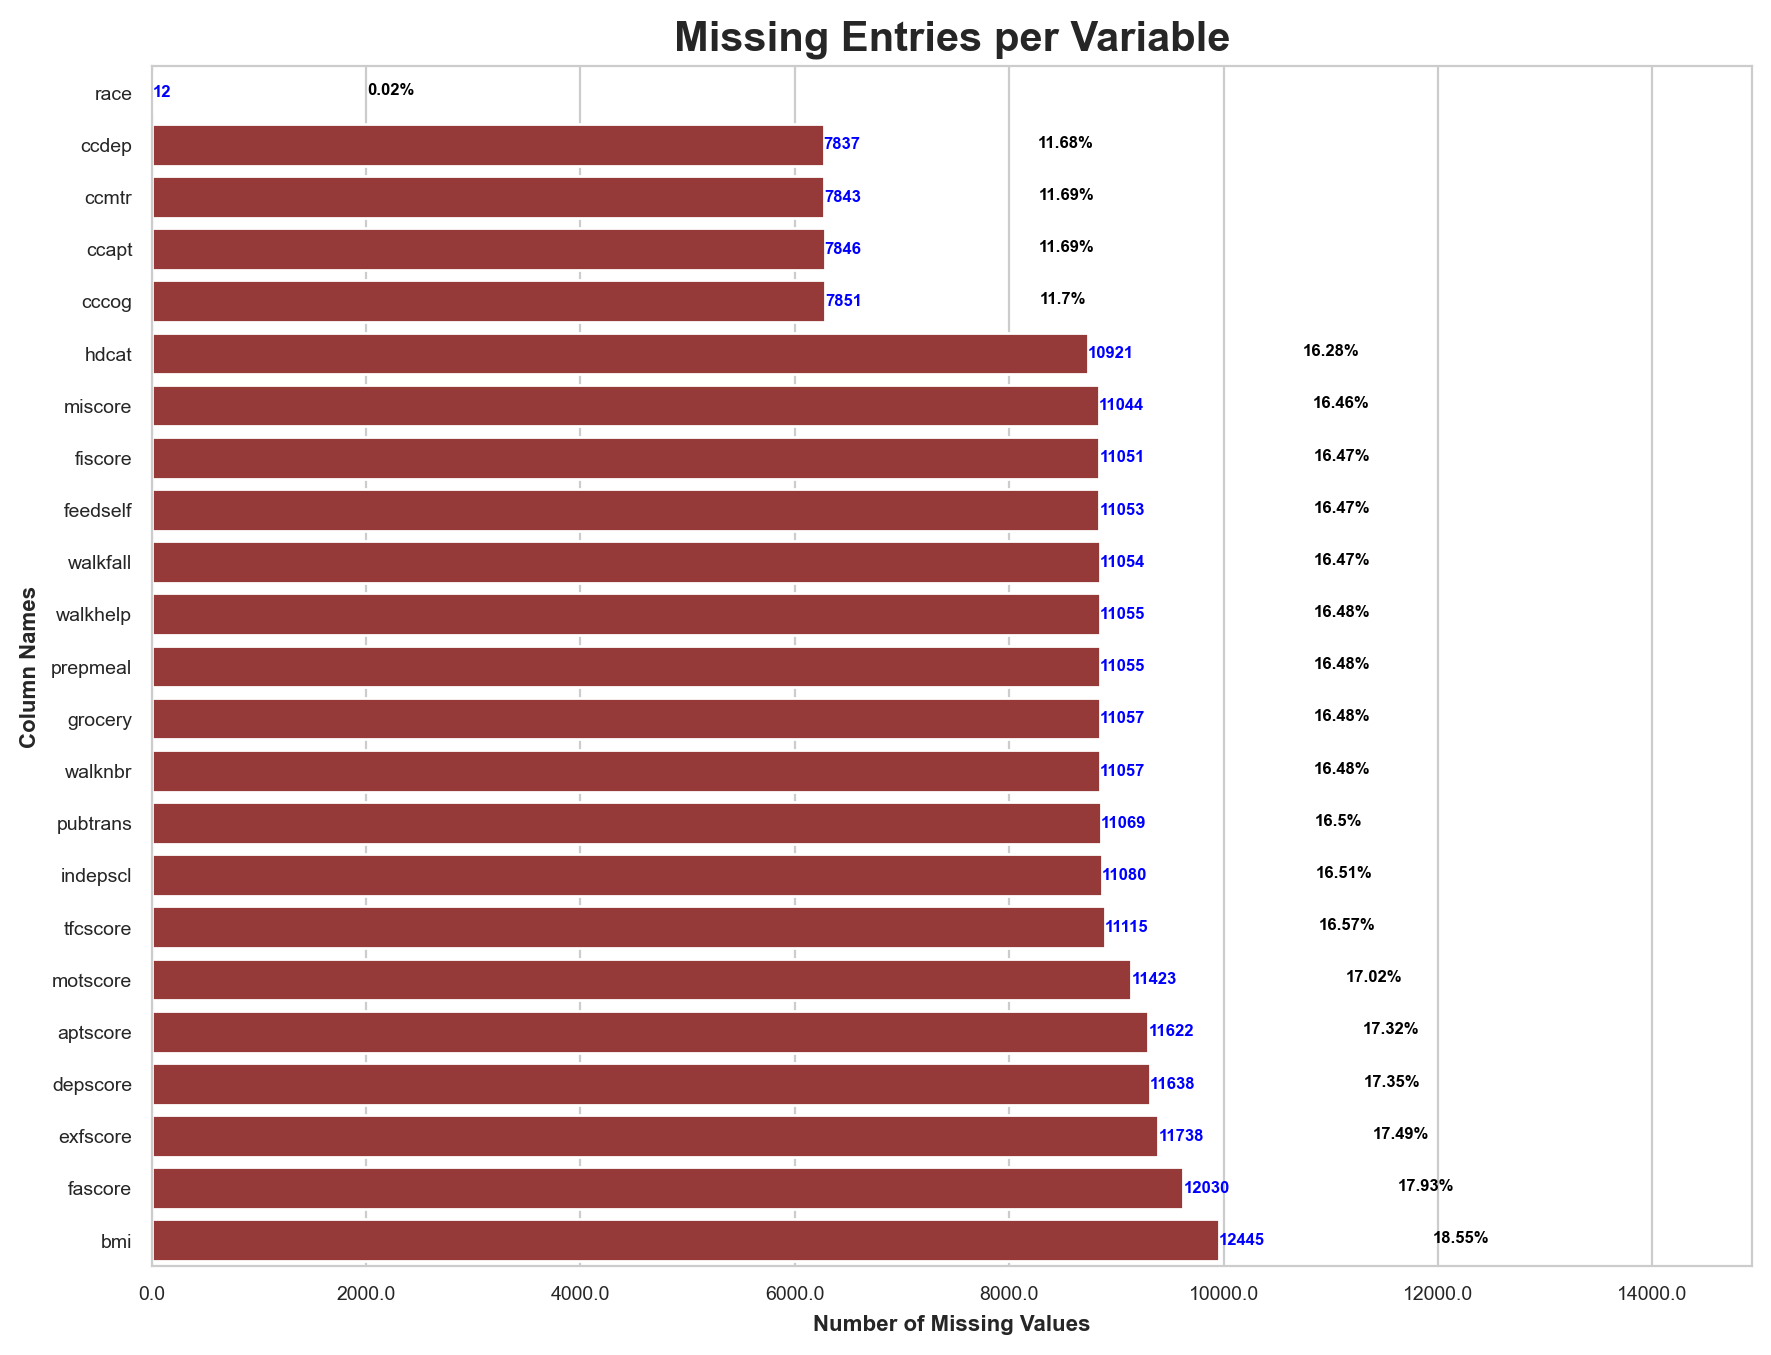

In [26]:
proj.visualize_nulls(enrl, use_bar=True, include_perc=True, perc_total=len(enrl), 
                     perc_labe_gap=2500, h_labe_shift=-0.45)

In [27]:
cols = ['weight', 'height']
new_bmi = enrl[cols].apply(lambda row: proj.compute_bmi(row['weight'], row['height']),
                           axis=1)
enrl.loc[:, 'bmi'] = new_bmi

In [28]:
bmi_discretized = pd.DataFrame(proj.get_bmi_band(enrl))
enrl = pd.concat([enrl, bmi_discretized], axis=1)

display(enrl, proj.null_checker(enrl, only_nulls=True))


Only columns with null values are included


,subjid,visitnum,studyid,hdcat_0,hdcat_l,race,region,sex,ccdep,cccog,ccapt,ccmtr,caghigh,caglow,hdcat,weight,height,bmi,seq,visdy,age,manifested_chorea,motscore,miscore,indepscl,fiscore,fascore,tfcscore,depscore,aptscore,exfscore,prepmeal,feedself,pubtrans,walknbr,walkfall,walkhelp,grocery,study_timeyr,bmi_level,bmi_outcome
0,R000024542,6,ENR,3.0,3.0,1.0,Northern America,m,0.0,0.0,0.0,1.0,44,19,3.0,67.9,185.4,19.8,1,0,48,1,28.0,28.0,95.0,24.0,24.0,11.0,8.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.2,1. normal,0
1,R000024542,6,ENR,3.0,3.0,1.0,Northern America,m,0.0,0.0,0.0,1.0,44,19,3.0,67.2,185.0,19.6,2,371,49,1,32.0,32.0,80.0,22.0,22.0,11.0,4.0,3.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.2,1. normal,0
2,R000024542,6,ENR,3.0,3.0,1.0,Northern America,m,0.0,0.0,0.0,1.0,44,19,3.0,65.4,185.0,19.1,3,734,50,1,45.0,45.0,75.0,20.0,20.0,11.0,3.0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,5.2,1. normal,0
3,R000024542,6,ENR,3.0,3.0,1.0,Northern America,m,0.0,0.0,0.0,1.0,44,19,3.0,63.8,185.0,18.6,4,1098,51,1,45.0,45.0,65.0,12.0,12.0,8.0,0.0,9.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,5.2,1. normal,0
4,R000024542,6,ENR,3.0,3.0,1.0,Northern America,m,0.0,0.0,0.0,1.0,44,19,3.0,62.5,185.0,18.3,5,1469,52,1,47.0,47.0,70.0,15.0,15.0,6.0,0.0,0.0,6.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,5.2,0. underweight,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67091,R999989129,1,ENR,3.0,3.0,1.0,Europe,m,1.0,1.0,1.0,1.0,45,19,3.0,73.0,180.0,22.5,1,0,44,1,32.0,32.0,80.0,20.0,20.0,9.0,0.0,6.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1. normal,0
67092,R999993234,4,ENR,2.0,2.0,1.0,Europe,f,1.0,0.0,1.0,0.0,41,17,2.0,57.0,168.0,20.2,1,0,47,0,0.0,0.0,100.0,25.0,25.0,13.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.2,1. normal,0
67093,R999993234,4,ENR,2.0,2.0,1.0,Europe,f,1.0,0.0,1.0,0.0,41,17,2.0,57.3,167.6,20.4,2,380,48,1,1.0,1.0,100.0,25.0,25.0,13.0,0.0,0.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.2,1. normal,0
67094,R999993234,4,ENR,2.0,2.0,1.0,Europe,f,1.0,0.0,1.0,0.0,41,17,2.0,57.0,167.0,20.4,3,777,49,1,2.0,2.0,100.0,25.0,25.0,13.0,0.0,0.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.2,1. normal,0


race           12
ccdep        7837
ccmtr        7843
ccapt        7846
cccog        7851
hdcat       10921
miscore     11044
fiscore     11051
feedself    11053
walkfall    11054
walkhelp    11055
prepmeal    11055
walknbr     11057
grocery     11057
pubtrans    11069
indepscl    11080
tfcscore    11115
motscore    11423
aptscore    11622
depscore    11638
exfscore    11738
fascore     12030
dtype: int64

In [29]:
bmi_change_df = proj.get_bmi_change(enrl)
display(bmi_change_df)
enrl = pd.concat([enrl, bmi_change_df], axis=1)
display(enrl)

,bmi_diff,bmi_change
0,-999.0,-999
1,-0.2,-1
2,-0.5,-1
3,-0.5,-1
4,-0.3,-1
...,...,...
67091,-999.0,-999
67092,-999.0,-999
67093,0.2,1
67094,0.0,0


,subjid,visitnum,studyid,hdcat_0,hdcat_l,race,region,sex,ccdep,cccog,ccapt,ccmtr,caghigh,caglow,hdcat,weight,height,bmi,seq,visdy,age,manifested_chorea,motscore,miscore,indepscl,fiscore,fascore,tfcscore,depscore,aptscore,exfscore,prepmeal,feedself,pubtrans,walknbr,walkfall,walkhelp,grocery,study_timeyr,bmi_level,bmi_outcome,bmi_diff,bmi_change
0,R000024542,6,ENR,3.0,3.0,1.0,Northern America,m,0.0,0.0,0.0,1.0,44,19,3.0,67.9,185.4,19.8,1,0,48,1,28.0,28.0,95.0,24.0,24.0,11.0,8.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.2,1. normal,0,-999.0,-999
1,R000024542,6,ENR,3.0,3.0,1.0,Northern America,m,0.0,0.0,0.0,1.0,44,19,3.0,67.2,185.0,19.6,2,371,49,1,32.0,32.0,80.0,22.0,22.0,11.0,4.0,3.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.2,1. normal,0,-0.2,-1
2,R000024542,6,ENR,3.0,3.0,1.0,Northern America,m,0.0,0.0,0.0,1.0,44,19,3.0,65.4,185.0,19.1,3,734,50,1,45.0,45.0,75.0,20.0,20.0,11.0,3.0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,5.2,1. normal,0,-0.5,-1
3,R000024542,6,ENR,3.0,3.0,1.0,Northern America,m,0.0,0.0,0.0,1.0,44,19,3.0,63.8,185.0,18.6,4,1098,51,1,45.0,45.0,65.0,12.0,12.0,8.0,0.0,9.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,5.2,1. normal,0,-0.5,-1
4,R000024542,6,ENR,3.0,3.0,1.0,Northern America,m,0.0,0.0,0.0,1.0,44,19,3.0,62.5,185.0,18.3,5,1469,52,1,47.0,47.0,70.0,15.0,15.0,6.0,0.0,0.0,6.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,5.2,0. underweight,-1,-0.3,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67091,R999989129,1,ENR,3.0,3.0,1.0,Europe,m,1.0,1.0,1.0,1.0,45,19,3.0,73.0,180.0,22.5,1,0,44,1,32.0,32.0,80.0,20.0,20.0,9.0,0.0,6.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1. normal,0,-999.0,-999
67092,R999993234,4,ENR,2.0,2.0,1.0,Europe,f,1.0,0.0,1.0,0.0,41,17,2.0,57.0,168.0,20.2,1,0,47,0,0.0,0.0,100.0,25.0,25.0,13.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.2,1. normal,0,-999.0,-999
67093,R999993234,4,ENR,2.0,2.0,1.0,Europe,f,1.0,0.0,1.0,0.0,41,17,2.0,57.3,167.6,20.4,2,380,48,1,1.0,1.0,100.0,25.0,25.0,13.0,0.0,0.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.2,1. normal,0,0.2,1
67094,R999993234,4,ENR,2.0,2.0,1.0,Europe,f,1.0,0.0,1.0,0.0,41,17,2.0,57.0,167.0,20.4,3,777,49,1,2.0,2.0,100.0,25.0,25.0,13.0,0.0,0.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.2,1. normal,0,0.0,0


In [30]:
# for the sake of interval accuracy, change -999 to 0
bmi_diff = enrl['bmi_diff'].apply(lambda x: 0 if x == -999 else x)
# display(bmi_diff)

bmi_change_interval = proj.get_interval_freq(bmi_diff, bin_width=1, precision=1)
# display(bmi_change_interval)
enrl = pd.concat([enrl, bmi_change_interval], axis=1)
enrl

,subjid,visitnum,studyid,hdcat_0,hdcat_l,race,region,sex,ccdep,cccog,ccapt,ccmtr,caghigh,caglow,hdcat,weight,height,bmi,seq,visdy,age,manifested_chorea,motscore,miscore,indepscl,fiscore,fascore,tfcscore,depscore,aptscore,exfscore,prepmeal,feedself,pubtrans,walknbr,walkfall,walkhelp,grocery,study_timeyr,bmi_level,bmi_outcome,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band
0,R000024542,6,ENR,3.0,3.0,1.0,Northern America,m,0.0,0.0,0.0,1.0,44,19,3.0,67.9,185.4,19.8,1,0,48,1,28.0,28.0,95.0,24.0,24.0,11.0,8.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.2,1. normal,0,-999.0,-999,30,[0.0 to 1.0)
1,R000024542,6,ENR,3.0,3.0,1.0,Northern America,m,0.0,0.0,0.0,1.0,44,19,3.0,67.2,185.0,19.6,2,371,49,1,32.0,32.0,80.0,22.0,22.0,11.0,4.0,3.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.2,1. normal,0,-0.2,-1,29,[-1.0 to 0.0)
2,R000024542,6,ENR,3.0,3.0,1.0,Northern America,m,0.0,0.0,0.0,1.0,44,19,3.0,65.4,185.0,19.1,3,734,50,1,45.0,45.0,75.0,20.0,20.0,11.0,3.0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,5.2,1. normal,0,-0.5,-1,29,[-1.0 to 0.0)
3,R000024542,6,ENR,3.0,3.0,1.0,Northern America,m,0.0,0.0,0.0,1.0,44,19,3.0,63.8,185.0,18.6,4,1098,51,1,45.0,45.0,65.0,12.0,12.0,8.0,0.0,9.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,5.2,1. normal,0,-0.5,-1,29,[-1.0 to 0.0)
4,R000024542,6,ENR,3.0,3.0,1.0,Northern America,m,0.0,0.0,0.0,1.0,44,19,3.0,62.5,185.0,18.3,5,1469,52,1,47.0,47.0,70.0,15.0,15.0,6.0,0.0,0.0,6.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,5.2,0. underweight,-1,-0.3,-1,29,[-1.0 to 0.0)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67091,R999989129,1,ENR,3.0,3.0,1.0,Europe,m,1.0,1.0,1.0,1.0,45,19,3.0,73.0,180.0,22.5,1,0,44,1,32.0,32.0,80.0,20.0,20.0,9.0,0.0,6.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1. normal,0,-999.0,-999,30,[0.0 to 1.0)
67092,R999993234,4,ENR,2.0,2.0,1.0,Europe,f,1.0,0.0,1.0,0.0,41,17,2.0,57.0,168.0,20.2,1,0,47,0,0.0,0.0,100.0,25.0,25.0,13.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.2,1. normal,0,-999.0,-999,30,[0.0 to 1.0)
67093,R999993234,4,ENR,2.0,2.0,1.0,Europe,f,1.0,0.0,1.0,0.0,41,17,2.0,57.3,167.6,20.4,2,380,48,1,1.0,1.0,100.0,25.0,25.0,13.0,0.0,0.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.2,1. normal,0,0.2,1,30,[0.0 to 1.0)
67094,R999993234,4,ENR,2.0,2.0,1.0,Europe,f,1.0,0.0,1.0,0.0,41,17,2.0,57.0,167.0,20.4,3,777,49,1,2.0,2.0,100.0,25.0,25.0,13.0,0.0,0.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.2,1. normal,0,0.0,0,30,[0.0 to 1.0)


No handles with labels found to put in legend.



Only columns with null values are included

In percentage

Only columns with null values are included


W:\MSc-AIDS-UoH\Trimester_3\project_methods.py:1634: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(np.round(axis.get_xticks(), precision), fontdict={'fontsize':xy_ticksize})


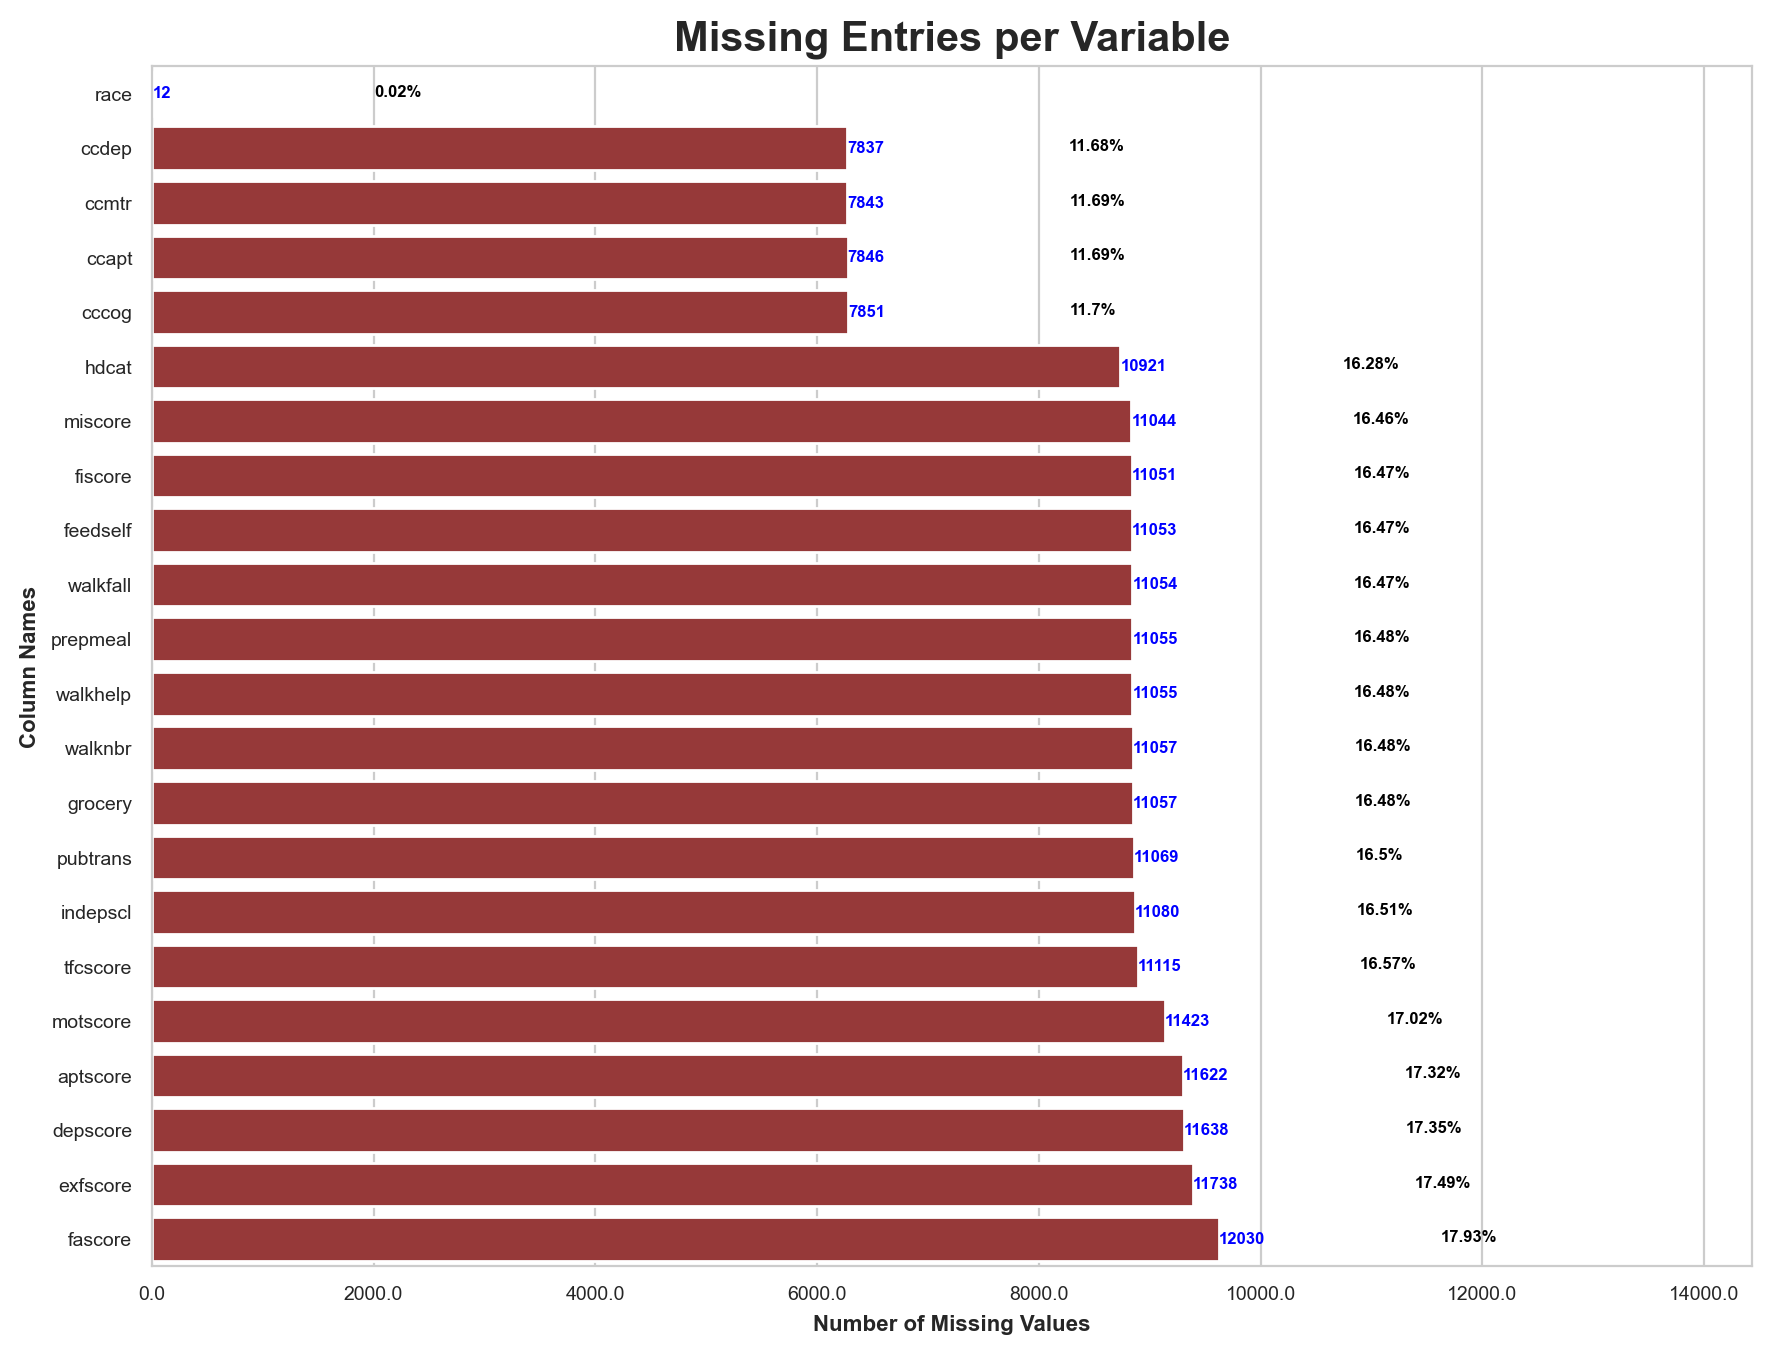

In [31]:
proj.visualize_nulls(enrl, use_bar=True, include_perc=True, perc_total=len(enrl), 
                     perc_labe_gap=2500, h_labe_shift=-0.45)

In [32]:
for col in enrl.columns:
    print(f"{col}:\n{np.sort(enrl[col].unique())}\n\n")

subjid:
['R000024542' 'R00010372X' 'R000147438' ... 'R99990772X' 'R999989129'
 'R999993234']


visitnum:
[ 1  2  3  4  5  6  7  8  9 10 11 12 14 15]


studyid:
['ENR']


hdcat_0:
[2. 3. 4. 5.]


hdcat_l:
[2. 3. 4. 5.]


race:
[ 1.  2.  3.  6.  8. 15. 16. nan]


region:
['Australasia' 'Europe' 'Latin America' 'Northern America']


sex:
['f' 'm']


ccdep:
[ 0.  1. nan]


cccog:
[ 0.  1. nan]


ccapt:
[ 0.  1. nan]


ccmtr:
[ 0.  1. nan]


caghigh:
['12' '13' '14' '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25'
 '26' '27' '28' '29' '30' '31' '32' '33' '34' '35' '36' '37' '38' '39'
 '40' '41' '42' '43' '44' '45' '46' '47' '48' '49' '50' '51' '52' '53'
 '54' '55' '56' '57' '58' '59' '60' '61' '62' '63' '64' '65' '66' '67'
 '68' '69' '70' '>70']


caglow:
['10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '20' '21' '22' '23'
 '24' '25' '26' '27' '28' '8' '9' '>28']


hdcat:
[ 2.  3.  4.  5. nan]


weight:
[ 18.8  19.   19.7 ... 204.1 209.4 214.6]


height:
[101.6 104.  108.  115.  116

### Age Band

In [33]:
age_band = pd.DataFrame(proj.get_age_band(enrl, 'age'))
display(age_band)

enrl = pd.concat([enrl.drop('age', axis=1), age_band['age_group']], axis=1)

display(enrl, proj.null_checker(enrl, only_nulls=True))

,age_group,age_bucket
0,7,45-49
1,7,45-49
2,8,50-54
3,8,50-54
4,8,50-54
...,...,...
67091,6,40-44
67092,7,45-49
67093,7,45-49
67094,7,45-49



Only columns with null values are included


,subjid,visitnum,studyid,hdcat_0,hdcat_l,race,region,sex,ccdep,cccog,ccapt,ccmtr,caghigh,caglow,hdcat,weight,height,bmi,seq,visdy,manifested_chorea,motscore,miscore,indepscl,fiscore,fascore,tfcscore,depscore,aptscore,exfscore,prepmeal,feedself,pubtrans,walknbr,walkfall,walkhelp,grocery,study_timeyr,bmi_level,bmi_outcome,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,age_group
0,R000024542,6,ENR,3.0,3.0,1.0,Northern America,m,0.0,0.0,0.0,1.0,44,19,3.0,67.9,185.4,19.8,1,0,1,28.0,28.0,95.0,24.0,24.0,11.0,8.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.2,1. normal,0,-999.0,-999,30,[0.0 to 1.0),7
1,R000024542,6,ENR,3.0,3.0,1.0,Northern America,m,0.0,0.0,0.0,1.0,44,19,3.0,67.2,185.0,19.6,2,371,1,32.0,32.0,80.0,22.0,22.0,11.0,4.0,3.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.2,1. normal,0,-0.2,-1,29,[-1.0 to 0.0),7
2,R000024542,6,ENR,3.0,3.0,1.0,Northern America,m,0.0,0.0,0.0,1.0,44,19,3.0,65.4,185.0,19.1,3,734,1,45.0,45.0,75.0,20.0,20.0,11.0,3.0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,5.2,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),8
3,R000024542,6,ENR,3.0,3.0,1.0,Northern America,m,0.0,0.0,0.0,1.0,44,19,3.0,63.8,185.0,18.6,4,1098,1,45.0,45.0,65.0,12.0,12.0,8.0,0.0,9.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,5.2,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),8
4,R000024542,6,ENR,3.0,3.0,1.0,Northern America,m,0.0,0.0,0.0,1.0,44,19,3.0,62.5,185.0,18.3,5,1469,1,47.0,47.0,70.0,15.0,15.0,6.0,0.0,0.0,6.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,5.2,0. underweight,-1,-0.3,-1,29,[-1.0 to 0.0),8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67091,R999989129,1,ENR,3.0,3.0,1.0,Europe,m,1.0,1.0,1.0,1.0,45,19,3.0,73.0,180.0,22.5,1,0,1,32.0,32.0,80.0,20.0,20.0,9.0,0.0,6.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1. normal,0,-999.0,-999,30,[0.0 to 1.0),6
67092,R999993234,4,ENR,2.0,2.0,1.0,Europe,f,1.0,0.0,1.0,0.0,41,17,2.0,57.0,168.0,20.2,1,0,0,0.0,0.0,100.0,25.0,25.0,13.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.2,1. normal,0,-999.0,-999,30,[0.0 to 1.0),7
67093,R999993234,4,ENR,2.0,2.0,1.0,Europe,f,1.0,0.0,1.0,0.0,41,17,2.0,57.3,167.6,20.4,2,380,1,1.0,1.0,100.0,25.0,25.0,13.0,0.0,0.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.2,1. normal,0,0.2,1,30,[0.0 to 1.0),7
67094,R999993234,4,ENR,2.0,2.0,1.0,Europe,f,1.0,0.0,1.0,0.0,41,17,2.0,57.0,167.0,20.4,3,777,1,2.0,2.0,100.0,25.0,25.0,13.0,0.0,0.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.2,1. normal,0,0.0,0,30,[0.0 to 1.0),7


race           12
ccdep        7837
ccmtr        7843
ccapt        7846
cccog        7851
hdcat       10921
miscore     11044
fiscore     11051
feedself    11053
walkfall    11054
prepmeal    11055
walkhelp    11055
walknbr     11057
grocery     11057
pubtrans    11069
indepscl    11080
tfcscore    11115
motscore    11423
aptscore    11622
depscore    11638
exfscore    11738
fascore     12030
dtype: int64

### Engineer age at first visit to 30yrs_above_at_vis1

In [34]:
# age_group > 3 == 30 and above
display(proj.age_band)
cols = ['subjid', 'age_group']
age30_above_vis1 = enrl[cols].groupby(cols[0]).agg(tuple).apply(lambda x: 0 if x['age_group'][0] < 4 else 1, axis=1)
young = pd.Series(age30_above_vis1,
                  name='age30_above_vis1').reset_index()
young = pd.merge(enrl[cols[0]], young, on='subjid')
display(young)
enrl = pd.concat([enrl, young.drop(cols[0], axis=1)], axis=1)
display(enrl)

{'five_yr_band': {1: 'below 18',
  2: '18-24',
  3: '25-29',
  4: '30-34',
  5: '35-39',
  6: '40-44',
  7: '45-49',
  8: '50-54',
  9: '55-59',
  10: '60-64',
  11: '65-69',
  12: 'above 70'},
 'ten_yr_band': {1: 'below 18',
  2: '18-30',
  3: '31-40',
  4: '41-50',
  5: '51-60',
  6: '61-70',
  7: 'above 70'}}

,subjid,age30_above_vis1
0,R000024542,1
1,R000024542,1
2,R000024542,1
3,R000024542,1
4,R000024542,1
...,...,...
67091,R999989129,1
67092,R999993234,1
67093,R999993234,1
67094,R999993234,1


,subjid,visitnum,studyid,hdcat_0,hdcat_l,race,region,sex,ccdep,cccog,ccapt,ccmtr,caghigh,caglow,hdcat,weight,height,bmi,seq,visdy,manifested_chorea,motscore,miscore,indepscl,fiscore,fascore,tfcscore,depscore,aptscore,exfscore,prepmeal,feedself,pubtrans,walknbr,walkfall,walkhelp,grocery,study_timeyr,bmi_level,bmi_outcome,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,age_group,age30_above_vis1
0,R000024542,6,ENR,3.0,3.0,1.0,Northern America,m,0.0,0.0,0.0,1.0,44,19,3.0,67.9,185.4,19.8,1,0,1,28.0,28.0,95.0,24.0,24.0,11.0,8.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.2,1. normal,0,-999.0,-999,30,[0.0 to 1.0),7,1
1,R000024542,6,ENR,3.0,3.0,1.0,Northern America,m,0.0,0.0,0.0,1.0,44,19,3.0,67.2,185.0,19.6,2,371,1,32.0,32.0,80.0,22.0,22.0,11.0,4.0,3.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.2,1. normal,0,-0.2,-1,29,[-1.0 to 0.0),7,1
2,R000024542,6,ENR,3.0,3.0,1.0,Northern America,m,0.0,0.0,0.0,1.0,44,19,3.0,65.4,185.0,19.1,3,734,1,45.0,45.0,75.0,20.0,20.0,11.0,3.0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,5.2,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),8,1
3,R000024542,6,ENR,3.0,3.0,1.0,Northern America,m,0.0,0.0,0.0,1.0,44,19,3.0,63.8,185.0,18.6,4,1098,1,45.0,45.0,65.0,12.0,12.0,8.0,0.0,9.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,5.2,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),8,1
4,R000024542,6,ENR,3.0,3.0,1.0,Northern America,m,0.0,0.0,0.0,1.0,44,19,3.0,62.5,185.0,18.3,5,1469,1,47.0,47.0,70.0,15.0,15.0,6.0,0.0,0.0,6.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,5.2,0. underweight,-1,-0.3,-1,29,[-1.0 to 0.0),8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67091,R999989129,1,ENR,3.0,3.0,1.0,Europe,m,1.0,1.0,1.0,1.0,45,19,3.0,73.0,180.0,22.5,1,0,1,32.0,32.0,80.0,20.0,20.0,9.0,0.0,6.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1. normal,0,-999.0,-999,30,[0.0 to 1.0),6,1
67092,R999993234,4,ENR,2.0,2.0,1.0,Europe,f,1.0,0.0,1.0,0.0,41,17,2.0,57.0,168.0,20.2,1,0,0,0.0,0.0,100.0,25.0,25.0,13.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.2,1. normal,0,-999.0,-999,30,[0.0 to 1.0),7,1
67093,R999993234,4,ENR,2.0,2.0,1.0,Europe,f,1.0,0.0,1.0,0.0,41,17,2.0,57.3,167.6,20.4,2,380,1,1.0,1.0,100.0,25.0,25.0,13.0,0.0,0.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.2,1. normal,0,0.2,1,30,[0.0 to 1.0),7,1
67094,R999993234,4,ENR,2.0,2.0,1.0,Europe,f,1.0,0.0,1.0,0.0,41,17,2.0,57.0,167.0,20.4,3,777,1,2.0,2.0,100.0,25.0,25.0,13.0,0.0,0.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.2,1. normal,0,0.0,0,30,[0.0 to 1.0),7,1


### Impute missing ccdep with participant's mode

In [35]:
cols = ['subjid', 'ccdep']
display(enrl[cols[-1]].unique())
# a = enrl[cols].groupby(cols[0]).agg(tuple).reset_index()
# x = a.apply(lambda row: np.unique(row[cols[-1]]),
#             axis=1).apply(len)
# x[x != 1]
# after confirming that ccdep is constant per participant
new_ccdep = proj.impute_null_values(enrl, pivot_cols=cols[:-1], target_col=cols[-1], stat_used='mode').astype(int)
display(new_ccdep,)# enrl['ccdep'])
# display(proj.compare_variables(new_ccdep, enrl['ccdep'], where_equal=False))
enrl.loc[:, cols[-1]] = new_ccdep

proj.null_checker(enrl, only_nulls=True)

array([ 0.,  1., nan])

0        0
1        0
2        0
3        0
4        0
        ..
67091    1
67092    1
67093    1
67094    1
67095    1
Name: ccdep, Length: 67096, dtype: int32


Only columns with null values are included


race           12
ccmtr        7843
ccapt        7846
cccog        7851
hdcat       10921
miscore     11044
fiscore     11051
feedself    11053
walkfall    11054
walkhelp    11055
prepmeal    11055
walknbr     11057
grocery     11057
pubtrans    11069
indepscl    11080
tfcscore    11115
motscore    11423
aptscore    11622
depscore    11638
exfscore    11738
fascore     12030
dtype: int64

### Impute missing cccog with participant's mode

In [36]:
cols = ['subjid', 'cccog']
display(enrl[cols[-1]].unique())
# a = enrl[cols].groupby(cols[0]).agg(tuple).reset_index()
# x = a.apply(lambda row: np.unique(row[cols[-1]]),
#             axis=1).apply(len)
# x[x != 1]
# after confirming that cccog is constant per participant
new_cccog = proj.impute_null_values(enrl, pivot_cols=cols[:-1], target_col=cols[-1], stat_used='mode').astype(int)
display(new_cccog,)# enrl['cccog'])
# display(proj.compare_variables(new_ccdep, enrl['ccdep'], where_equal=False))
enrl.loc[:, cols[-1]] = new_cccog

proj.null_checker(enrl, only_nulls=True)

array([ 0.,  1., nan])

0        0
1        0
2        0
3        0
4        0
        ..
67091    1
67092    0
67093    0
67094    0
67095    0
Name: cccog, Length: 67096, dtype: int32


Only columns with null values are included


race           12
ccmtr        7843
ccapt        7846
hdcat       10921
miscore     11044
fiscore     11051
feedself    11053
walkfall    11054
walkhelp    11055
prepmeal    11055
walknbr     11057
grocery     11057
pubtrans    11069
indepscl    11080
tfcscore    11115
motscore    11423
aptscore    11622
depscore    11638
exfscore    11738
fascore     12030
dtype: int64

### Impute missing ccapt with participant's mode

In [37]:
cols = ['subjid', 'ccapt']
display(enrl[cols[-1]].unique())
# a = enrl[cols].groupby(cols[0]).agg(tuple).reset_index()
# x = a.apply(lambda row: np.unique(row[cols[-1]]),
#             axis=1).apply(len)
# x[x != 1]
# after confirming that ccapt is constant per participant
new_ccapt = proj.impute_null_values(enrl, pivot_cols=cols[:-1], target_col=cols[-1], stat_used='mode').astype(int)
display(new_ccapt,)# enrl['ccapt'])
# display(proj.compare_variables(new_ccdep, enrl['ccdep'], where_equal=False))
enrl.loc[:, cols[-1]] = new_ccapt

proj.null_checker(enrl, only_nulls=True)

array([ 0.,  1., nan])

0        0
1        0
2        0
3        0
4        0
        ..
67091    1
67092    1
67093    1
67094    1
67095    1
Name: ccapt, Length: 67096, dtype: int32


Only columns with null values are included


race           12
ccmtr        7843
hdcat       10921
miscore     11044
fiscore     11051
feedself    11053
walkfall    11054
walkhelp    11055
prepmeal    11055
walknbr     11057
grocery     11057
pubtrans    11069
indepscl    11080
tfcscore    11115
motscore    11423
aptscore    11622
depscore    11638
exfscore    11738
fascore     12030
dtype: int64

### Impute missing ccmtr with participant's mode

In [38]:
cols = ['subjid', 'ccmtr']
display(enrl[cols[-1]].unique())
# a = enrl[cols].groupby(cols[0]).agg(tuple).reset_index()
# x = a.apply(lambda row: np.unique(row[cols[-1]]),
#             axis=1).apply(len)
# x[x != 1]
# after confirming that ccmtr is constant per participant
new_ccmtr = proj.impute_null_values(enrl, pivot_cols=cols[:-1], target_col=cols[-1], stat_used='mode').astype(int)
display(new_ccmtr,)# enrl['ccmtr'])
# display(proj.compare_variables(new_ccdep, enrl['ccdep'], where_equal=False))
enrl.loc[:, cols[-1]] = new_ccmtr

proj.null_checker(enrl, only_nulls=True)

array([ 1.,  0., nan])

0        1
1        1
2        1
3        1
4        1
        ..
67091    1
67092    0
67093    0
67094    0
67095    0
Name: ccmtr, Length: 67096, dtype: int32


Only columns with null values are included


race           12
hdcat       10921
miscore     11044
fiscore     11051
feedself    11053
walkfall    11054
walkhelp    11055
prepmeal    11055
walknbr     11057
grocery     11057
pubtrans    11069
indepscl    11080
tfcscore    11115
motscore    11423
aptscore    11622
depscore    11638
exfscore    11738
fascore     12030
dtype: int64

### Impute missing hdcat with participant's mode

In [39]:
# cols = ['subjid', 'hdcat']
# display(enrl[cols[-1]].unique())
# a = enrl.loc[enrl[cols[-1]].isin([4, 5]), cols[0]].unique()
# # display(a)
# # b = enrl.loc[enrl[cols[0]].isin(list(a)), cols].dropna().groupby(cols[0]).agg(np.unique)
# # display(b)
# # after confirming that hdcat is constant per participant
# # modal lookup
# c = enrl.loc[enrl[cols[0]].isin(list(a)), cols]
# clook = c.groupby(cols[0]).agg(pd.Series.mode).reset_index()
# # clook['hdcat'].unique()
# null_ix = c.loc[c[cols[-1]].isnull()].index
# nnull_ix = c.loc[c[cols[-1]].notnull()].index
# display(null_ix, nnull_ix)
# filled_ctrl = pd.concat([enrl.loc[~enrl.index.isin(c.index), cols[-1]], 
#                          new_c[cols[-1]]]).sort_index()
# enrl.loc[:, cols[-1]] = filled_ctrl
# proj.null_checker(enrl, only_nulls=True)

In [40]:
cols = ['subjid', 'hdcat']
display(enrl[cols[-1]].unique())
# a = enrl[cols].groupby(cols[0]).agg(tuple).reset_index()
# x = a.apply(lambda row: np.unique(row[cols[-1]]),
#             axis=1).apply(len)
# display(x[x != 1])
# after confirming that hdcat is constant per participant
new_hdcat = proj.impute_null_values(enrl, pivot_cols=cols[:-1], target_col=cols[-1], stat_used='mode').astype(int)
display(new_hdcat,)# enrl['hdcat'])
# display(proj.compare_variables(new_ccdep, enrl['ccdep'], where_equal=False))
enrl.loc[:, cols[-1]] = new_hdcat

proj.null_checker(enrl, only_nulls=True)

array([ 3.,  2., nan,  4.,  5.])

0        3
1        3
2        3
3        3
4        3
        ..
67091    3
67092    2
67093    2
67094    2
67095    2
Name: hdcat, Length: 67096, dtype: int32


Only columns with null values are included


race           12
miscore     11044
fiscore     11051
feedself    11053
walkfall    11054
walkhelp    11055
prepmeal    11055
walknbr     11057
grocery     11057
pubtrans    11069
indepscl    11080
tfcscore    11115
motscore    11423
aptscore    11622
depscore    11638
exfscore    11738
fascore     12030
dtype: int64

### Impute missing prepmeal with participant's mode

In [41]:
cols = ['subjid', 'prepmeal']
display(enrl[cols[-1]].unique())
# a = enrl[cols].groupby(cols[0]).agg(tuple).reset_index()
# x = a.apply(lambda row: np.unique(row[cols[-1]]),
#             axis=1).apply(len)
# display(x[x != 1])
# after confirming that prepmeal is constant per participant
new_prepmeal = proj.impute_null_values(enrl, pivot_cols=cols[:-1], target_col=cols[-1], stat_used='mode').astype(int)
display(new_prepmeal,)# enrl['prepmeal'])
# display(proj.compare_variables(new_ccdep, enrl['ccdep'], where_equal=False))
enrl.loc[:, cols[-1]] = new_prepmeal

proj.null_checker(enrl, only_nulls=True)

array([ 1.,  0., nan])

0        1
1        1
2        0
3        0
4        1
        ..
67091    1
67092    1
67093    1
67094    1
67095    1
Name: prepmeal, Length: 67096, dtype: int32


Only columns with null values are included


race           12
miscore     11044
fiscore     11051
feedself    11053
walkfall    11054
walkhelp    11055
grocery     11057
walknbr     11057
pubtrans    11069
indepscl    11080
tfcscore    11115
motscore    11423
aptscore    11622
depscore    11638
exfscore    11738
fascore     12030
dtype: int64

### Impute missing feedself with participant's mode

In [42]:
cols = ['subjid', 'feedself']
display(enrl[cols[-1]].unique())
# a = enrl[cols].groupby(cols[0]).agg(tuple).reset_index()
# x = a.apply(lambda row: np.unique(row[cols[-1]]),
#             axis=1).apply(len)
# display(x[x != 1])
# after confirming that feedself is constant per participant
new_feedself = proj.impute_null_values(enrl, pivot_cols=cols[:-1], target_col=cols[-1], stat_used='mode').astype(int)
display(new_feedself,)# enrl['feedself'])
# display(proj.compare_variables(new_ccdep, enrl['ccdep'], where_equal=False))
enrl.loc[:, cols[-1]] = new_feedself

proj.null_checker(enrl, only_nulls=True)

array([ 1.,  0., nan])

0        1
1        1
2        1
3        1
4        1
        ..
67091    1
67092    1
67093    1
67094    1
67095    1
Name: feedself, Length: 67096, dtype: int32


Only columns with null values are included


race           12
miscore     11044
fiscore     11051
walkfall    11054
walkhelp    11055
grocery     11057
walknbr     11057
pubtrans    11069
indepscl    11080
tfcscore    11115
motscore    11423
aptscore    11622
depscore    11638
exfscore    11738
fascore     12030
dtype: int64

### Impute missing walkhelp with participant's mode

In [43]:
cols = ['subjid', 'walkhelp']
display(enrl[cols[-1]].unique())
# a = enrl[cols].groupby(cols[0]).agg(tuple).reset_index()
# x = a.apply(lambda row: np.unique(row[cols[-1]]),
#             axis=1).apply(len)
# display(x[x != 1])
# after confirming that carehome is constant per participant
new_carehome = proj.impute_null_values(enrl, pivot_cols=cols[:-1], target_col=cols[-1], stat_used='mode').astype(int)
display(new_carehome,)# enrl['carehome'])
# display(proj.compare_variables(new_ccdep, enrl['ccdep'], where_equal=False))
enrl.loc[:, cols[-1]] = new_carehome

proj.null_checker(enrl, only_nulls=True)

array([ 1.,  0., nan])

0        1
1        1
2        1
3        0
4        1
        ..
67091    1
67092    1
67093    1
67094    1
67095    1
Name: walkhelp, Length: 67096, dtype: int32


Only columns with null values are included


race           12
miscore     11044
fiscore     11051
walkfall    11054
grocery     11057
walknbr     11057
pubtrans    11069
indepscl    11080
tfcscore    11115
motscore    11423
aptscore    11622
depscore    11638
exfscore    11738
fascore     12030
dtype: int64

### Impute missing walkfall with participant's mode

In [44]:
cols = ['subjid', 'walkfall']
display(enrl[cols[-1]].unique())
# a = enrl[cols].groupby(cols[0]).agg(tuple).reset_index()
# x = a.apply(lambda row: np.unique(row[cols[-1]]),
#             axis=1).apply(len)
# display(x[x != 1])
# after confirming that ownmeds is constant per participant
new_ownmeds = proj.impute_null_values(enrl, pivot_cols=cols[:-1], target_col=cols[-1], stat_used='mode').astype(int)
display(new_ownmeds,)# enrl['ownmeds'])
# display(proj.compare_variables(new_ccdep, enrl['ccdep'], where_equal=False))
enrl.loc[:, cols[-1]] = new_ownmeds

proj.null_checker(enrl, only_nulls=True)

array([ 1.,  0., nan])

0        1
1        1
2        1
3        1
4        1
        ..
67091    1
67092    1
67093    1
67094    1
67095    1
Name: walkfall, Length: 67096, dtype: int32


Only columns with null values are included


race           12
miscore     11044
fiscore     11051
walknbr     11057
grocery     11057
pubtrans    11069
indepscl    11080
tfcscore    11115
motscore    11423
aptscore    11622
depscore    11638
exfscore    11738
fascore     12030
dtype: int64

### Impute missing pubtrans with participant's mode

In [45]:
cols = ['subjid', 'pubtrans']
display(enrl[cols[-1]].unique())
# a = enrl[cols].groupby(cols[0]).agg(tuple).reset_index()
# x = a.apply(lambda row: np.unique(row[cols[-1]]),
#             axis=1).apply(len)
# display(x[x != 1])
# after confirming that ownmeds is constant per participant
new_ownmeds = proj.impute_null_values(enrl, pivot_cols=cols[:-1], target_col=cols[-1], stat_used='mode').astype(int)
display(new_ownmeds,)# enrl['ownmeds'])
# display(proj.compare_variables(new_ccdep, enrl['ccdep'], where_equal=False))
enrl.loc[:, cols[-1]] = new_ownmeds

proj.null_checker(enrl, only_nulls=True)

array([ 1.,  0., nan])

0        1
1        1
2        0
3        0
4        0
        ..
67091    1
67092    1
67093    1
67094    1
67095    1
Name: pubtrans, Length: 67096, dtype: int32


Only columns with null values are included


race           12
miscore     11044
fiscore     11051
walknbr     11057
grocery     11057
indepscl    11080
tfcscore    11115
motscore    11423
aptscore    11622
depscore    11638
exfscore    11738
fascore     12030
dtype: int64

### Impute missing walknbr with participant's mode

In [46]:
cols = ['subjid', 'walknbr']
display(enrl[cols[-1]].unique())
# a = enrl[cols].groupby(cols[0]).agg(tuple).reset_index()
# x = a.apply(lambda row: np.unique(row[cols[-1]]),
#             axis=1).apply(len)
# display(x[x != 1])
# after confirming that ownmeds is constant per participant
new_ownmeds = proj.impute_null_values(enrl, pivot_cols=cols[:-1], target_col=cols[-1], stat_used='mode').astype(int)
display(new_ownmeds,)# enrl['ownmeds'])
# display(proj.compare_variables(new_ccdep, enrl['ccdep'], where_equal=False))
enrl.loc[:, cols[-1]] = new_ownmeds

proj.null_checker(enrl, only_nulls=True)

array([ 1.,  0., nan])

0        1
1        1
2        1
3        1
4        0
        ..
67091    1
67092    1
67093    1
67094    1
67095    1
Name: walknbr, Length: 67096, dtype: int32


Only columns with null values are included


race           12
miscore     11044
fiscore     11051
grocery     11057
indepscl    11080
tfcscore    11115
motscore    11423
aptscore    11622
depscore    11638
exfscore    11738
fascore     12030
dtype: int64

### Impute missing grocery with participant's mode

In [47]:
cols = ['subjid', 'grocery']
display(enrl[cols[-1]].unique())
# a = enrl[cols].groupby(cols[0]).agg(tuple).reset_index()
# x = a.apply(lambda row: np.unique(row[cols[-1]]),
#             axis=1).apply(len)
# display(x[x != 1])
# after confirming that grocery is constant per participant
new_grocery = proj.impute_null_values(enrl, pivot_cols=cols[:-1], target_col=cols[-1], stat_used='mode').astype(int)
display(new_grocery,)# enrl['grocery'])
# display(proj.compare_variables(new_ccdep, enrl['ccdep'], where_equal=False))
enrl.loc[:, cols[-1]] = new_grocery

proj.null_checker(enrl, only_nulls=True)

array([ 1.,  0., nan])

0        1
1        1
2        0
3        0
4        0
        ..
67091    1
67092    1
67093    1
67094    1
67095    1
Name: grocery, Length: 67096, dtype: int32


Only columns with null values are included


race           12
miscore     11044
fiscore     11051
indepscl    11080
tfcscore    11115
motscore    11423
aptscore    11622
depscore    11638
exfscore    11738
fascore     12030
dtype: int64

### IMPUTING SCORES

#### indepscl

In [48]:
cols = ['hdcat', 'age_group', 'feedself', 'prepmeal', 'ccmtr', 'cccog', 'ccdep']
y = 'indepscl'
corrn = proj.corr_with_pearson(X=enrl[cols], y=enrl[y], precision=1, top_n=2)
display(corrn, corrn.index)

prepmeal    75.0
feedself    64.7
dtype: float64

Index(['prepmeal', 'feedself'], dtype='object')

In [49]:
cols = ['subjid', 'feedself', 'prepmeal', 'indepscl']
display(enrl[cols[-1]].unique())
# a = enrl[cols].groupby(cols[0]).agg(tuple).reset_index()
# x = a.apply(lambda row: np.unique(row[cols[-1]]),
#             axis=1).apply(len)
# display(x[x != 1])
# after confirming that indepscl is constant per participant
new_indepscl = proj.impute_null_values(enrl, pivot_cols=cols[:-1], target_col=cols[-1], stat_used='mode').astype(int)
display(new_indepscl,)# enrl['indepscl'])
# display(proj.compare_variables(new_ccdep, enrl['ccdep'], where_equal=False))
enrl.loc[:, cols[-1]] = new_indepscl

proj.null_checker(enrl, only_nulls=True)

array([ 95.,  80.,  75.,  65.,  70.,  90., 100.,  nan,  85.,  20.,  25.,
        15.,  10.,  50.,  30.,  60.,  55.,  45.,  35.,  40.,   5.])

0         95
1         80
2         75
3         65
4         70
        ... 
67091     80
67092    100
67093    100
67094    100
67095    100
Name: indepscl, Length: 67096, dtype: int32


Only columns with null values are included


race           12
miscore     11044
fiscore     11051
tfcscore    11115
motscore    11423
aptscore    11622
depscore    11638
exfscore    11738
fascore     12030
dtype: int64

#### miscore

In [50]:
cols = ['hdcat', 'bmi_level', 'age_group', 'feedself', 'prepmeal', 'ccmtr', 'cccog', 'ccdep']
y = 'miscore'
corrn = proj.corr_with_pearson(X=enrl[cols], y=enrl[y], precision=1, top_n=2)
display(corrn, corrn.index)

prepmeal    67.4
cccog       60.6
dtype: float64

Index(['prepmeal', 'cccog'], dtype='object')

In [51]:
cols = ['subjid', 'prepmeal', 'cccog', 'miscore']
display(enrl[cols[-1]].unique())
# a = enrl[cols].groupby(cols[0]).agg(tuple).reset_index()
# x = a.apply(lambda row: np.unique(row[cols[-1]]),
#             axis=1).apply(len)
# display(x[x != 1])
# after confirming that miscore is constant per participant
new_miscore = proj.impute_null_values(enrl, pivot_cols=cols[:-1], target_col=cols[-1], stat_used='mode').astype(int)
display(new_miscore,)# enrl['miscore'])
# display(proj.compare_variables(new_ccdep, enrl['ccdep'], where_equal=False))
enrl.loc[:, cols[-1]] = new_miscore

proj.null_checker(enrl, only_nulls=True)

array([ 28.,  32.,  45.,  47.,  60.,  20.,  16.,  25.,  31.,  36.,   0.,
        nan,   2.,  12.,  22.,  24.,  26.,  30., 109., 112., 120., 122.,
       116.,  40.,  38.,  10.,  23.,   3.,  50.,  67.,   1.,   6.,  99.,
       102.,  89.,  95.,   5.,  27.,  15.,   7.,  13.,  17.,  14.,   9.,
         8.,  55.,  48.,  59.,  57.,  61.,  64.,   4.,  21.,  53.,  46.,
        42.,  70.,  29.,  41.,  58.,  33.,  63.,  39.,  69.,  11.,  54.,
        35.,  18.,  44.,  52.,  37.,  49.,  71.,  19.,  34.,  65.,  79.,
        56.,  85.,  80.,  83.,  82.,  72.,  66.,  81.,  87.,  84.,  51.,
        73.,  62.,  68.,  77.,  88., 100., 108., 104.,  74.,  43.,  92.,
        76.,  98.,  90.,  78.,  86.,  75.,  91., 115.,  94., 101.,  93.,
       107., 119.,  97., 106., 105., 103., 111.,  96., 110., 118., 114.,
       113., 117., 124.])

0        28
1        32
2        45
3        45
4        47
         ..
67091    32
67092     0
67093     1
67094     2
67095     0
Name: miscore, Length: 67096, dtype: int32


Only columns with null values are included


race           12
fiscore     11051
tfcscore    11115
motscore    11423
aptscore    11622
depscore    11638
exfscore    11738
fascore     12030
dtype: int64

#### motscore

In [52]:
cols = ['hdcat', 'bmi_level', 'age_group', 'feedself', 'prepmeal', 'ccmtr', 'cccog', 'ccdep']
y = 'motscore'
corrn = proj.corr_with_pearson(X=enrl[cols], y=enrl[y], precision=1, top_n=2)
display(corrn, corrn.index)

prepmeal    67.4
cccog       60.6
dtype: float64

Index(['prepmeal', 'cccog'], dtype='object')

In [53]:
cols = ['subjid', 'prepmeal', 'cccog', 'motscore']
display(enrl[cols[-1]].unique())
new_motscore = proj.impute_null_values(enrl, pivot_cols=cols[:-1], target_col=cols[-1], stat_used='mode').astype(int)
display(new_motscore,)# enrl['motscore'])
# display(proj.compare_variables(new_ccdep, enrl['ccdep'], where_equal=False))
enrl.loc[:, cols[-1]] = new_motscore

proj.null_checker(enrl, only_nulls=True)

array([ 28.,  32.,  45.,  47.,  60.,  20.,  16.,  25.,  31.,  36.,   0.,
        nan,   2.,  12.,  22.,  24.,  26.,  30., 109., 112., 120., 122.,
       116.,  40.,  38.,  10.,  23.,   3.,  50.,  67.,   1.,   6.,  99.,
       102.,  89.,  95.,   5.,  27.,  15.,   7.,  13.,  17.,  14.,   9.,
         8.,  55.,  48.,  59.,  57.,  61.,  64.,   4.,  21.,  53.,  46.,
        42.,  70.,  29.,  41.,  58.,  33.,  63.,  39.,  69.,  11.,  54.,
        35.,  18.,  44.,  52.,  37.,  49.,  71.,  19.,  34.,  65.,  79.,
        56.,  85.,  80.,  83.,  82.,  72.,  66.,  81.,  87.,  84.,  51.,
        73.,  62.,  68.,  88., 100., 108., 104.,  74.,  43.,  92.,  76.,
        98.,  90.,  77.,  78.,  86.,  75.,  91., 115.,  94., 101.,  93.,
       107., 119.,  97., 106., 105., 103., 111.,  96., 110., 118., 114.,
       113., 117., 124.])

0        28
1        32
2        45
3        45
4        47
         ..
67091    32
67092     0
67093     1
67094     2
67095     0
Name: motscore, Length: 67096, dtype: int32


Only columns with null values are included


race           12
fiscore     11051
tfcscore    11115
aptscore    11622
depscore    11638
exfscore    11738
fascore     12030
dtype: int64

#### fiscore

In [54]:
cols = ['hdcat', 'bmi_level', 'age_group', 'feedself', 'prepmeal', 'ccmtr', 'cccog', 'ccdep']
y = 'fiscore'
corrn = proj.corr_with_pearson(X=enrl[cols], y=enrl[y], precision=1, top_n=2)
display(corrn, corrn.index)

prepmeal    82.0
feedself    68.5
dtype: float64

Index(['prepmeal', 'feedself'], dtype='object')

In [55]:
cols = ['subjid', 'feedself', 'prepmeal', 'fiscore']
display(enrl[cols[-1]].unique())
# a = enrl[cols].groupby(cols[0]).agg(tuple).reset_index()
# x = a.apply(lambda row: np.unique(row[cols[-1]]),
#             axis=1).apply(len)
# display(x[x != 1])
# after confirming that fiscore is constant per participant
new_fiscore = proj.impute_null_values(enrl, pivot_cols=cols[:-1], target_col=cols[-1], stat_used='mode').astype(int)
display(new_fiscore,)# enrl['fiscore'])
# display(proj.compare_variables(new_ccdep, enrl['ccdep'], where_equal=False))
enrl.loc[:, cols[-1]] = new_fiscore

proj.null_checker(enrl, only_nulls=True)

array([24., 22., 20., 12., 15.,  7., 25., 23., 21., nan,  3.,  0.,  1.,
       17., 18., 19., 16.,  6., 14.,  9., 10., 11., 13.,  5.,  8.,  4.,
        2.])

0        24
1        22
2        20
3        12
4        15
         ..
67091    20
67092    25
67093    25
67094    25
67095    25
Name: fiscore, Length: 67096, dtype: int32


Only columns with null values are included


race           12
tfcscore    11115
aptscore    11622
depscore    11638
exfscore    11738
fascore     12030
dtype: int64

#### fascore

In [56]:
cols = ['hdcat', 'bmi_level', 'age_group', 'feedself', 'prepmeal', 'ccmtr', 'cccog', 'ccdep']
y = 'fascore'
corrn = proj.corr_with_pearson(X=enrl[cols], y=enrl[y], precision=1, top_n=2)
display(corrn, corrn.index)

prepmeal    82.2
feedself    68.8
dtype: float64

Index(['prepmeal', 'feedself'], dtype='object')

In [57]:
cols = ['subjid', 'feedself', 'prepmeal', 'fascore']
display(enrl[cols[-1]].unique())
# a = enrl[cols].groupby(cols[0]).agg(tuple).reset_index()
# x = a.apply(lambda row: np.unique(row[cols[-1]]),
#             axis=1).apply(len)
# display(x[x != 1])
# after confirming that fascore is constant per participant
new_fascore = proj.impute_null_values(enrl, pivot_cols=cols[:-1], target_col=cols[-1], stat_used='mode').astype(int)
display(new_fascore,)# enrl['fascore'])
# display(proj.compare_variables(new_ccdep, enrl['ccdep'], where_equal=False))
enrl.loc[:, cols[-1]] = new_fascore

proj.null_checker(enrl, only_nulls=True)

array([24., 22., 20., 12., 15.,  7., 25., 23., 21., nan,  3.,  0.,  1.,
       17., 18., 19., 16.,  6., 14.,  9., 10., 11., 13.,  5.,  8.,  4.,
        2.])

0        24
1        22
2        20
3        12
4        15
         ..
67091    20
67092    25
67093    25
67094    25
67095    25
Name: fascore, Length: 67096, dtype: int32


Only columns with null values are included


race           12
tfcscore    11115
aptscore    11622
depscore    11638
exfscore    11738
dtype: int64

#### tfcscore

In [58]:
cols = ['hdcat', 'bmi_level', 'age_group', 'feedself', 'prepmeal', 'ccmtr', 'cccog', 'ccdep']
y = 'tfcscore'
corrn = proj.corr_with_pearson(X=enrl[cols], y=enrl[y], precision=1, top_n=2)
display(corrn, corrn.index)

prepmeal    76.2
cccog       64.0
dtype: float64

Index(['prepmeal', 'cccog'], dtype='object')

In [59]:
cols = ['subjid', 'cccog', 'prepmeal', 'tfcscore']
display(enrl[cols[-1]].unique())
# a = enrl[cols].groupby(cols[0]).agg(tuple).reset_index()
# x = a.apply(lambda row: np.unique(row[cols[-1]]),
#             axis=1).apply(len)
# display(x[x != 1])
# after contfcrming that tfcscore is constant per participant
new_tfcscore = proj.impute_null_values(enrl, pivot_cols=cols[:-1], target_col=cols[-1], stat_used='mode').astype(int)
display(new_tfcscore,)# enrl['tfcscore'])
# display(proj.compare_variables(new_ccdep, enrl['ccdep'], where_equal=False))
enrl.loc[:, cols[-1]] = new_tfcscore

proj.null_checker(enrl, only_nulls=True)

array([11.,  8.,  6., 13., 10.,  9., nan, 12.,  1.,  0.,  2.,  4.,  7.,
        5.,  3.])

0        11
1        11
2        11
3         8
4         6
         ..
67091     9
67092    13
67093    13
67094    13
67095    13
Name: tfcscore, Length: 67096, dtype: int32


Only columns with null values are included


race           12
aptscore    11622
depscore    11638
exfscore    11738
dtype: int64

#### aptscore

In [60]:
cols = ['hdcat', 'bmi_level', 'age_group', 'feedself', 'prepmeal', 'ccmtr', 'cccog', 'ccdep']
y = 'aptscore'
corrn = proj.corr_with_pearson(X=enrl[cols], y=enrl[y], precision=1, top_n=2)
display(corrn, corrn.index)

prepmeal    40.6
cccog       40.1
dtype: float64

Index(['prepmeal', 'cccog'], dtype='object')

In [61]:
cols = ['subjid', 'cccog', 'prepmeal', 'aptscore']
display(enrl[cols[-1]].unique())
# a = enrl[cols].groupby(cols[0]).agg(tuple).reset_index()
# x = a.apply(lambda row: np.unique(row[cols[-1]]),
#             axis=1).apply(len)
# display(x[x != 1])
# after confirming that aptscore is constant per participant
new_aptscore = proj.impute_null_values(enrl, pivot_cols=cols[:-1], target_col=cols[-1], stat_used='mode').astype(int)
display(new_aptscore,)# enrl['aptscore'])
# display(proj.compare_variables(new_ccdep, enrl['ccdep'], where_equal=False))
enrl.loc[:, cols[-1]] = new_aptscore

proj.null_checker(enrl, only_nulls=True)

array([ 1.,  3.,  2.,  9.,  0.,  8., nan, 12.,  4.,  6., 16.])

0        1
1        3
2        2
3        9
4        0
        ..
67091    6
67092    0
67093    0
67094    0
67095    1
Name: aptscore, Length: 67096, dtype: int32


Only columns with null values are included


race           12
depscore    11638
exfscore    11738
dtype: int64

#### depscore

In [62]:
cols = ['hdcat', 'bmi_level', 'age_group', 'feedself', 'prepmeal', 'ccmtr', 'cccog', 'ccdep']
y = 'depscore'
corrn = proj.corr_with_pearson(X=enrl[cols], y=enrl[y], precision=1, top_n=2)
display(corrn, corrn.index)

ccdep    29.5
cccog    13.6
dtype: float64

Index(['ccdep', 'cccog'], dtype='object')

In [63]:
cols = ['subjid', 'cccog', 'ccdep', 'depscore']
display(enrl[cols[-1]].unique())
# a = enrl[cols].groupby(cols[0]).agg(tuple).reset_index()
# x = a.apply(lambda row: np.unique(row[cols[-1]]),
#             axis=1).apply(len)
# display(x[x != 1])
# after confirming that depscore is constant per participant
new_depscore = proj.impute_null_values(enrl, pivot_cols=cols[:-1], target_col=cols[-1], stat_used='mode').astype(int)
display(new_depscore,)# enrl['depscore'])
# display(proj.compare_variables(new_ccdep, enrl['ccdep'], where_equal=False))
enrl.loc[:, cols[-1]] = new_depscore

proj.null_checker(enrl, only_nulls=True)

array([ 8.,  4.,  3.,  0.,  2.,  1., 10., nan,  6.,  5., 11., 20., 28.,
       12., 14.,  9., 13., 22., 25., 16., 18.,  7., 15., 30., 27., 24.,
       41., 17., 21., 32., 35., 29., 36., 37., 19., 23., 34., 48., 44.,
       26., 33., 31., 38., 40.])

0        8
1        4
2        3
3        0
4        0
        ..
67091    0
67092    0
67093    0
67094    0
67095    3
Name: depscore, Length: 67096, dtype: int32


Only columns with null values are included


race           12
exfscore    11738
dtype: int64

#### exfscore

In [64]:
cols = ['hdcat', 'bmi_level', 'age_group', 'feedself', 'prepmeal', 'ccmtr', 'cccog', 'ccdep']
y = 'exfscore'
corrn = proj.corr_with_pearson(X=enrl[cols], y=enrl[y], precision=1, top_n=2)
display(corrn, corrn.index)

prepmeal    31.9
cccog       30.2
dtype: float64

Index(['prepmeal', 'cccog'], dtype='object')

In [65]:
cols = ['subjid', 'cccog', 'prepmeal', 'exfscore']
display(enrl[cols[-1]].unique())
# a = enrl[cols].groupby(cols[0]).agg(tuple).reset_index()
# x = a.apply(lambda row: np.unique(row[cols[-1]]),
#             axis=1).apply(len)
# display(x[x != 1])
# after confirming that exfscore is constant per participant
new_exfscore = proj.impute_null_values(enrl, pivot_cols=cols[:-1], target_col=cols[-1], stat_used='mode').astype(int)
display(new_exfscore,)# enrl['exfscore'])
# display(proj.compare_variables(new_ccdep, enrl['ccdep'], where_equal=False))
enrl.loc[:, cols[-1]] = new_exfscore


proj.null_checker(enrl, only_nulls=True)

array([ 6.,  8.,  2.,  1.,  0.,  4., nan, 12., 16.,  7., 13., 24., 10.,
        5.,  9.,  3., 15., 18., 28., 22., 25., 11., 21., 20., 14., 17.,
       32., 19.])

0        6
1        8
2        2
3        2
4        6
        ..
67091    6
67092    0
67093    8
67094    6
67095    1
Name: exfscore, Length: 67096, dtype: int32


Only columns with null values are included


race    12
dtype: int64

### Generate participant's average score

In [66]:
scores = [ 'motscore', 'miscore', 'indepscl', 'fiscore', 'fascore', 'tfcscore', 'depscore', 'aptscore', 'exfscore',
          'prepmeal', 'feedself', 'walkhelp', 'walkfall', 'walknbr', 'pubtrans', 'grocery']
for col in scores:
    xcols = ['subjid', col]
    avg_score = enrl[xcols].groupby(xcols[0]).agg(np.mean).round(1).reset_index().rename(columns={xcols[-1]:f'avg_{xcols[-1]}'})
    display(avg_score)

    enrl = pd.merge(enrl, avg_score, on=cols[0])
display(enrl)

,subjid,avg_motscore
0,R000024542,42.8
1,R00010372X,24.8
2,R000147438,36.0
3,R00021725X,0.3
4,R00023946X,22.8
...,...,...
21111,R999841810,41.0
21112,R999891140,12.0
21113,R99990772X,35.0
21114,R999989129,32.0


,subjid,avg_miscore
0,R000024542,42.8
1,R00010372X,24.8
2,R000147438,36.0
3,R00021725X,0.3
4,R00023946X,22.8
...,...,...
21111,R999841810,41.0
21112,R999891140,12.0
21113,R99990772X,35.0
21114,R999989129,32.0


,subjid,avg_indepscl
0,R000024542,75.0
1,R00010372X,81.7
2,R000147438,70.0
3,R00021725X,100.0
4,R00023946X,91.0
...,...,...
21111,R999841810,83.3
21112,R999891140,90.0
21113,R99990772X,85.0
21114,R999989129,80.0


,subjid,avg_fiscore
0,R000024542,16.7
1,R00010372X,22.7
2,R000147438,12.0
3,R00021725X,25.0
4,R00023946X,24.4
...,...,...
21111,R999841810,21.0
21112,R999891140,22.0
21113,R99990772X,23.0
21114,R999989129,20.0


,subjid,avg_fascore
0,R000024542,16.7
1,R00010372X,22.7
2,R000147438,12.0
3,R00021725X,25.0
4,R00023946X,24.4
...,...,...
21111,R999841810,21.0
21112,R999891140,22.0
21113,R99990772X,23.0
21114,R999989129,20.0


,subjid,avg_tfcscore
0,R000024542,8.8
1,R00010372X,10.3
2,R000147438,6.0
3,R00021725X,13.0
4,R00023946X,11.8
...,...,...
21111,R999841810,10.3
21112,R999891140,11.0
21113,R99990772X,11.0
21114,R999989129,9.0


,subjid,avg_depscore
0,R000024542,2.5
1,R00010372X,1.0
2,R000147438,10.0
3,R00021725X,0.0
4,R00023946X,4.0
...,...,...
21111,R999841810,0.0
21112,R999891140,6.0
21113,R99990772X,0.7
21114,R999989129,0.0


,subjid,avg_aptscore
0,R000024542,2.5
1,R00010372X,0.2
2,R000147438,8.0
3,R00021725X,0.0
4,R00023946X,1.4
...,...,...
21111,R999841810,0.3
21112,R999891140,12.0
21113,R99990772X,0.2
21114,R999989129,6.0


,subjid,avg_exfscore
0,R000024542,4.2
1,R00010372X,0.0
2,R000147438,4.0
3,R00021725X,0.0
4,R00023946X,1.2
...,...,...
21111,R999841810,0.0
21112,R999891140,9.0
21113,R99990772X,0.0
21114,R999989129,6.0


,subjid,avg_prepmeal
0,R000024542,0.5
1,R00010372X,1.0
2,R000147438,0.0
3,R00021725X,1.0
4,R00023946X,1.0
...,...,...
21111,R999841810,1.0
21112,R999891140,1.0
21113,R99990772X,1.0
21114,R999989129,1.0


,subjid,avg_feedself
0,R000024542,0.8
1,R00010372X,1.0
2,R000147438,1.0
3,R00021725X,1.0
4,R00023946X,1.0
...,...,...
21111,R999841810,1.0
21112,R999891140,1.0
21113,R99990772X,1.0
21114,R999989129,1.0


,subjid,avg_walkhelp
0,R000024542,0.8
1,R00010372X,1.0
2,R000147438,0.0
3,R00021725X,1.0
4,R00023946X,1.0
...,...,...
21111,R999841810,1.0
21112,R999891140,1.0
21113,R99990772X,1.0
21114,R999989129,1.0


,subjid,avg_walkfall
0,R000024542,1.0
1,R00010372X,1.0
2,R000147438,0.0
3,R00021725X,1.0
4,R00023946X,1.0
...,...,...
21111,R999841810,1.0
21112,R999891140,1.0
21113,R99990772X,1.0
21114,R999989129,1.0


,subjid,avg_walknbr
0,R000024542,0.7
1,R00010372X,1.0
2,R000147438,0.0
3,R00021725X,1.0
4,R00023946X,1.0
...,...,...
21111,R999841810,1.0
21112,R999891140,1.0
21113,R99990772X,1.0
21114,R999989129,1.0


,subjid,avg_pubtrans
0,R000024542,0.3
1,R00010372X,1.0
2,R000147438,0.0
3,R00021725X,1.0
4,R00023946X,1.0
...,...,...
21111,R999841810,1.0
21112,R999891140,1.0
21113,R99990772X,1.0
21114,R999989129,1.0


,subjid,avg_grocery
0,R000024542,0.3
1,R00010372X,1.0
2,R000147438,0.0
3,R00021725X,1.0
4,R00023946X,1.0
...,...,...
21111,R999841810,1.0
21112,R999891140,1.0
21113,R99990772X,1.0
21114,R999989129,1.0


,subjid,visitnum,studyid,hdcat_0,hdcat_l,race,region,sex,ccdep,cccog,ccapt,ccmtr,caghigh,caglow,hdcat,weight,height,bmi,seq,visdy,manifested_chorea,motscore,miscore,indepscl,fiscore,fascore,tfcscore,depscore,aptscore,exfscore,prepmeal,feedself,pubtrans,walknbr,walkfall,walkhelp,grocery,study_timeyr,bmi_level,bmi_outcome,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,age_group,age30_above_vis1,avg_motscore,avg_miscore,avg_indepscl,avg_fiscore,avg_fascore,avg_tfcscore,avg_depscore,avg_aptscore,avg_exfscore,avg_prepmeal,avg_feedself,avg_walkhelp,avg_walkfall,avg_walknbr,avg_pubtrans,avg_grocery
0,R000024542,6,ENR,3.0,3.0,1.0,Northern America,m,0,0,0,1,44,19,3,67.9,185.4,19.8,1,0,1,28,28,95,24,24,11,8,1,6,1,1,1,1,1,1,1,5.2,1. normal,0,-999.0,-999,30,[0.0 to 1.0),7,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3
1,R000024542,6,ENR,3.0,3.0,1.0,Northern America,m,0,0,0,1,44,19,3,67.2,185.0,19.6,2,371,1,32,32,80,22,22,11,4,3,8,1,1,1,1,1,1,1,5.2,1. normal,0,-0.2,-1,29,[-1.0 to 0.0),7,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3
2,R000024542,6,ENR,3.0,3.0,1.0,Northern America,m,0,0,0,1,44,19,3,65.4,185.0,19.1,3,734,1,45,45,75,20,20,11,3,2,2,0,1,0,1,1,1,0,5.2,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3
3,R000024542,6,ENR,3.0,3.0,1.0,Northern America,m,0,0,0,1,44,19,3,63.8,185.0,18.6,4,1098,1,45,45,65,12,12,8,0,9,2,0,1,0,1,1,0,0,5.2,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3
4,R000024542,6,ENR,3.0,3.0,1.0,Northern America,m,0,0,0,1,44,19,3,62.5,185.0,18.3,5,1469,1,47,47,70,15,15,6,0,0,6,1,1,0,0,1,1,0,5.2,0. underweight,-1,-0.3,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67091,R999989129,1,ENR,3.0,3.0,1.0,Europe,m,1,1,1,1,45,19,3,73.0,180.0,22.5,1,0,1,32,32,80,20,20,9,0,6,6,1,1,1,1,1,1,1,0.0,1. normal,0,-999.0,-999,30,[0.0 to 1.0),6,1,32.0,32.0,80.0,20.0,20.0,9.0,0.0,6.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
67092,R999993234,4,ENR,2.0,2.0,1.0,Europe,f,1,0,1,0,41,17,2,57.0,168.0,20.2,1,0,0,0,0,100,25,25,13,0,0,0,1,1,1,1,1,1,1,3.2,1. normal,0,-999.0,-999,30,[0.0 to 1.0),7,1,0.8,0.8,100.0,25.0,25.0,13.0,0.8,0.2,3.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0
67093,R999993234,4,ENR,2.0,2.0,1.0,Europe,f,1,0,1,0,41,17,2,57.3,167.6,20.4,2,380,1,1,1,100,25,25,13,0,0,8,1,1,1,1,1,1,1,3.2,1. normal,0,0.2,1,30,[0.0 to 1.0),7,1,0.8,0.8,100.0,25.0,25.0,13.0,0.8,0.2,3.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0
67094,R999993234,4,ENR,2.0,2.0,1.0,Europe,f,1,0,1,0,41,17,2,57.0,167.0,20.4,3,777,1,2,2,100,25,25,13,0,0,6,1,1,1,1,1,1,1,3.2,1. normal,0,0.0,0,30,[0.0 to 1.0),7,1,0.8,0.8,100.0,25.0,25.0,13.0,0.8,0.2,3.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### Drop variables containing null entries

In [67]:
enrl = enrl.dropna(axis=1).drop('studyid', axis=1)
enrl

,subjid,visitnum,hdcat_0,hdcat_l,region,sex,ccdep,cccog,ccapt,ccmtr,caghigh,caglow,hdcat,weight,height,bmi,seq,visdy,manifested_chorea,motscore,miscore,indepscl,fiscore,fascore,tfcscore,depscore,aptscore,exfscore,prepmeal,feedself,pubtrans,walknbr,walkfall,walkhelp,grocery,study_timeyr,bmi_level,bmi_outcome,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,age_group,age30_above_vis1,avg_motscore,avg_miscore,avg_indepscl,avg_fiscore,avg_fascore,avg_tfcscore,avg_depscore,avg_aptscore,avg_exfscore,avg_prepmeal,avg_feedself,avg_walkhelp,avg_walkfall,avg_walknbr,avg_pubtrans,avg_grocery
0,R000024542,6,3.0,3.0,Northern America,m,0,0,0,1,44,19,3,67.9,185.4,19.8,1,0,1,28,28,95,24,24,11,8,1,6,1,1,1,1,1,1,1,5.2,1. normal,0,-999.0,-999,30,[0.0 to 1.0),7,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3
1,R000024542,6,3.0,3.0,Northern America,m,0,0,0,1,44,19,3,67.2,185.0,19.6,2,371,1,32,32,80,22,22,11,4,3,8,1,1,1,1,1,1,1,5.2,1. normal,0,-0.2,-1,29,[-1.0 to 0.0),7,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3
2,R000024542,6,3.0,3.0,Northern America,m,0,0,0,1,44,19,3,65.4,185.0,19.1,3,734,1,45,45,75,20,20,11,3,2,2,0,1,0,1,1,1,0,5.2,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3
3,R000024542,6,3.0,3.0,Northern America,m,0,0,0,1,44,19,3,63.8,185.0,18.6,4,1098,1,45,45,65,12,12,8,0,9,2,0,1,0,1,1,0,0,5.2,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3
4,R000024542,6,3.0,3.0,Northern America,m,0,0,0,1,44,19,3,62.5,185.0,18.3,5,1469,1,47,47,70,15,15,6,0,0,6,1,1,0,0,1,1,0,5.2,0. underweight,-1,-0.3,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67091,R999989129,1,3.0,3.0,Europe,m,1,1,1,1,45,19,3,73.0,180.0,22.5,1,0,1,32,32,80,20,20,9,0,6,6,1,1,1,1,1,1,1,0.0,1. normal,0,-999.0,-999,30,[0.0 to 1.0),6,1,32.0,32.0,80.0,20.0,20.0,9.0,0.0,6.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
67092,R999993234,4,2.0,2.0,Europe,f,1,0,1,0,41,17,2,57.0,168.0,20.2,1,0,0,0,0,100,25,25,13,0,0,0,1,1,1,1,1,1,1,3.2,1. normal,0,-999.0,-999,30,[0.0 to 1.0),7,1,0.8,0.8,100.0,25.0,25.0,13.0,0.8,0.2,3.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0
67093,R999993234,4,2.0,2.0,Europe,f,1,0,1,0,41,17,2,57.3,167.6,20.4,2,380,1,1,1,100,25,25,13,0,0,8,1,1,1,1,1,1,1,3.2,1. normal,0,0.2,1,30,[0.0 to 1.0),7,1,0.8,0.8,100.0,25.0,25.0,13.0,0.8,0.2,3.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0
67094,R999993234,4,2.0,2.0,Europe,f,1,0,1,0,41,17,2,57.0,167.0,20.4,3,777,1,2,2,100,25,25,13,0,0,6,1,1,1,1,1,1,1,3.2,1. normal,0,0.0,0,30,[0.0 to 1.0),7,1,0.8,0.8,100.0,25.0,25.0,13.0,0.8,0.2,3.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [68]:
proj.visualize_nulls(enrl, use_bar=True, include_perc=True, perc_total=len(enrl), 
                     perc_labe_gap=2500, h_labe_shift=-0.45)


In percentage


'No null values in the dataframe'

#### First & Last BMI

In [69]:
total_bmi_diff = proj.get_total_bmi_diff(enrl)
display(total_bmi_diff)
enrl = pd.concat([enrl, total_bmi_diff.drop('subjid', axis=1)], axis=1)
display(enrl)

,subjid,total_avg_bmi,first_bmi,last_bmi,total_bmi_diff
0,R000024542,18.8,19.8,17.5,-2.3
1,R000024542,18.8,19.8,17.5,-2.3
2,R000024542,18.8,19.8,17.5,-2.3
3,R000024542,18.8,19.8,17.5,-2.3
4,R000024542,18.8,19.8,17.5,-2.3
...,...,...,...,...,...
67091,R999989129,22.5,22.5,22.5,0.0
67092,R999993234,20.6,20.2,21.5,1.3
67093,R999993234,20.6,20.2,21.5,1.3
67094,R999993234,20.6,20.2,21.5,1.3


,subjid,visitnum,hdcat_0,hdcat_l,region,sex,ccdep,cccog,ccapt,ccmtr,caghigh,caglow,hdcat,weight,height,bmi,seq,visdy,manifested_chorea,motscore,miscore,indepscl,fiscore,fascore,tfcscore,depscore,aptscore,exfscore,prepmeal,feedself,pubtrans,walknbr,walkfall,walkhelp,grocery,study_timeyr,bmi_level,bmi_outcome,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,age_group,age30_above_vis1,avg_motscore,avg_miscore,avg_indepscl,avg_fiscore,avg_fascore,avg_tfcscore,avg_depscore,avg_aptscore,avg_exfscore,avg_prepmeal,avg_feedself,avg_walkhelp,avg_walkfall,avg_walknbr,avg_pubtrans,avg_grocery,total_avg_bmi,first_bmi,last_bmi,total_bmi_diff
0,R000024542,6,3.0,3.0,Northern America,m,0,0,0,1,44,19,3,67.9,185.4,19.8,1,0,1,28,28,95,24,24,11,8,1,6,1,1,1,1,1,1,1,5.2,1. normal,0,-999.0,-999,30,[0.0 to 1.0),7,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3
1,R000024542,6,3.0,3.0,Northern America,m,0,0,0,1,44,19,3,67.2,185.0,19.6,2,371,1,32,32,80,22,22,11,4,3,8,1,1,1,1,1,1,1,5.2,1. normal,0,-0.2,-1,29,[-1.0 to 0.0),7,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3
2,R000024542,6,3.0,3.0,Northern America,m,0,0,0,1,44,19,3,65.4,185.0,19.1,3,734,1,45,45,75,20,20,11,3,2,2,0,1,0,1,1,1,0,5.2,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3
3,R000024542,6,3.0,3.0,Northern America,m,0,0,0,1,44,19,3,63.8,185.0,18.6,4,1098,1,45,45,65,12,12,8,0,9,2,0,1,0,1,1,0,0,5.2,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3
4,R000024542,6,3.0,3.0,Northern America,m,0,0,0,1,44,19,3,62.5,185.0,18.3,5,1469,1,47,47,70,15,15,6,0,0,6,1,1,0,0,1,1,0,5.2,0. underweight,-1,-0.3,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67091,R999989129,1,3.0,3.0,Europe,m,1,1,1,1,45,19,3,73.0,180.0,22.5,1,0,1,32,32,80,20,20,9,0,6,6,1,1,1,1,1,1,1,0.0,1. normal,0,-999.0,-999,30,[0.0 to 1.0),6,1,32.0,32.0,80.0,20.0,20.0,9.0,0.0,6.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,22.5,22.5,22.5,0.0
67092,R999993234,4,2.0,2.0,Europe,f,1,0,1,0,41,17,2,57.0,168.0,20.2,1,0,0,0,0,100,25,25,13,0,0,0,1,1,1,1,1,1,1,3.2,1. normal,0,-999.0,-999,30,[0.0 to 1.0),7,1,0.8,0.8,100.0,25.0,25.0,13.0,0.8,0.2,3.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.6,20.2,21.5,1.3
67093,R999993234,4,2.0,2.0,Europe,f,1,0,1,0,41,17,2,57.3,167.6,20.4,2,380,1,1,1,100,25,25,13,0,0,8,1,1,1,1,1,1,1,3.2,1. normal,0,0.2,1,30,[0.0 to 1.0),7,1,0.8,0.8,100.0,25.0,25.0,13.0,0.8,0.2,3.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.6,20.2,21.5,1.3
67094,R999993234,4,2.0,2.0,Europe,f,1,0,1,0,41,17,2,57.0,167.0,20.4,3,777,1,2,2,100,25,25,13,0,0,6,1,1,1,1,1,1,1,3.2,1. normal,0,0.0,0,30,[0.0 to 1.0),7,1,0.8,0.8,100.0,25.0,25.0,13.0,0.8,0.2,3.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.6,20.2,21.5,1.3


### Convert hdcat from integer classes into labels

In [70]:
enrl.loc[:, 'hd_status'] = proj.get_hdcat_labes(enrl['hdcat'])
enrl.loc[:, 'hd_status0'] = proj.get_hdcat_labes(enrl['hdcat_0'])
enrl =  enrl.drop(['hdcat', 'hdcat_0', 'hdcat_l'], axis=1)
baseline_manifest_hd = pd.Series(enrl['hd_status0'].apply(lambda x: 1 if x == 'manifest' else 0),
                                 name='baseline_manifest_hd')
enrl = pd.concat([enrl, baseline_manifest_hd], axis=1)
enrl

,subjid,visitnum,region,sex,ccdep,cccog,ccapt,ccmtr,caghigh,caglow,weight,height,bmi,seq,visdy,manifested_chorea,motscore,miscore,indepscl,fiscore,fascore,tfcscore,depscore,aptscore,exfscore,prepmeal,feedself,pubtrans,walknbr,walkfall,walkhelp,grocery,study_timeyr,bmi_level,bmi_outcome,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,age_group,age30_above_vis1,avg_motscore,avg_miscore,avg_indepscl,avg_fiscore,avg_fascore,avg_tfcscore,avg_depscore,avg_aptscore,avg_exfscore,avg_prepmeal,avg_feedself,avg_walkhelp,avg_walkfall,avg_walknbr,avg_pubtrans,avg_grocery,total_avg_bmi,first_bmi,last_bmi,total_bmi_diff,hd_status,hd_status0,baseline_manifest_hd
0,R000024542,6,Northern America,m,0,0,0,1,44,19,67.9,185.4,19.8,1,0,1,28,28,95,24,24,11,8,1,6,1,1,1,1,1,1,1,5.2,1. normal,0,-999.0,-999,30,[0.0 to 1.0),7,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1
1,R000024542,6,Northern America,m,0,0,0,1,44,19,67.2,185.0,19.6,2,371,1,32,32,80,22,22,11,4,3,8,1,1,1,1,1,1,1,5.2,1. normal,0,-0.2,-1,29,[-1.0 to 0.0),7,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1
2,R000024542,6,Northern America,m,0,0,0,1,44,19,65.4,185.0,19.1,3,734,1,45,45,75,20,20,11,3,2,2,0,1,0,1,1,1,0,5.2,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1
3,R000024542,6,Northern America,m,0,0,0,1,44,19,63.8,185.0,18.6,4,1098,1,45,45,65,12,12,8,0,9,2,0,1,0,1,1,0,0,5.2,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1
4,R000024542,6,Northern America,m,0,0,0,1,44,19,62.5,185.0,18.3,5,1469,1,47,47,70,15,15,6,0,0,6,1,1,0,0,1,1,0,5.2,0. underweight,-1,-0.3,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67091,R999989129,1,Europe,m,1,1,1,1,45,19,73.0,180.0,22.5,1,0,1,32,32,80,20,20,9,0,6,6,1,1,1,1,1,1,1,0.0,1. normal,0,-999.0,-999,30,[0.0 to 1.0),6,1,32.0,32.0,80.0,20.0,20.0,9.0,0.0,6.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,22.5,22.5,22.5,0.0,manifest,manifest,1
67092,R999993234,4,Europe,f,1,0,1,0,41,17,57.0,168.0,20.2,1,0,0,0,0,100,25,25,13,0,0,0,1,1,1,1,1,1,1,3.2,1. normal,0,-999.0,-999,30,[0.0 to 1.0),7,1,0.8,0.8,100.0,25.0,25.0,13.0,0.8,0.2,3.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.6,20.2,21.5,1.3,pre-manifest,pre-manifest,0
67093,R999993234,4,Europe,f,1,0,1,0,41,17,57.3,167.6,20.4,2,380,1,1,1,100,25,25,13,0,0,8,1,1,1,1,1,1,1,3.2,1. normal,0,0.2,1,30,[0.0 to 1.0),7,1,0.8,0.8,100.0,25.0,25.0,13.0,0.8,0.2,3.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.6,20.2,21.5,1.3,pre-manifest,pre-manifest,0
67094,R999993234,4,Europe,f,1,0,1,0,41,17,57.0,167.0,20.4,3,777,1,2,2,100,25,25,13,0,0,6,1,1,1,1,1,1,1,3.2,1. normal,0,0.0,0,30,[0.0 to 1.0),7,1,0.8,0.8,100.0,25.0,25.0,13.0,0.8,0.2,3.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.6,20.2,21.5,1.3,pre-manifest,pre-manifest,0


### Clean up nutritional supplements variables

In [71]:
display(nutsup, nutsup[nutsuppl_key_vars])


display(proj.null_checker(nutsup, in_perc=True))

,subjid,cmcat,cmtrt__modify,cmtrt__decod,cmtrt__atc,cmtrt__ing,cmdostot,cmdosunit,cmdosfrq,cmstdy,cmenrf,cmendy
0,R000024542,1,"Multivitamins, plain",RX000128150,"A11B,A11BA","Multivitamins, plain, ingredient unspecified",1.0,5,1,330,1,NaN
1,R00010372X,1,Vitamin e,RX000126883,"A11HA,D02AX,D03AX",Tocopherol,1000.0,2,1,-1490,1,NaN
2,R00010372X,1,Cod-liver oil,RX000152993,"A11CB,D03AA",Cod-liver oil,415.0,2,1,-137,1,NaN
3,R00010372X,1,Omega 3,RX000085060,C10AX,Fish oil,1000.0,2,1,-759,1,NaN
4,R00010372X,1,Coq10,RX000071684,"A16AX,C01EB",Ubidecarenone,300.0,2,1,1955,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
23256,R999820346,1,"Multivitamins, plain",RX000128150,"A11B,A11BA","Multivitamins, plain, ingredient unspecified",1.0,5,1,807,1,NaN
23257,R999841810,1,Magnesium,RX000135760,A12CC,Magnesium,9998.0,5,1,-172,1,NaN
23258,R999993234,1,Normocis,RX000013046,A03FA,Cisapride,400.0,2,1,370,0,737.0
23259,R999993234,1,Lipid modifying agents,RX000154853,C10,"Lipid modifying agents, ingredient unspecified",1.0,7,1,737,0,1050.0


,subjid,cmcat,cmstdy,cmenrf,cmendy
0,R000024542,1,330,1,NaN
1,R00010372X,1,-1490,1,NaN
2,R00010372X,1,-137,1,NaN
3,R00010372X,1,-759,1,NaN
4,R00010372X,1,1955,1,NaN
...,...,...,...,...,...
23256,R999820346,1,807,1,NaN
23257,R999841810,1,-172,1,NaN
23258,R999993234,1,370,0,737.0
23259,R999993234,1,737,0,1050.0



In percentage


subjid            0.00
cmcat             0.00
cmtrt__modify     0.00
cmtrt__decod      0.00
cmtrt__atc        0.00
cmtrt__ing        0.00
cmdostot          0.00
cmdosunit         0.00
cmdosfrq          0.00
cmstdy            0.00
cmenrf            0.00
cmendy           75.01
dtype: float64

In [72]:
high_calorie_diet = pd.Series(nutsup.apply(lambda row: 1 if row['cmcat'] == 7 else 0,
                                           axis=1),
                              name='is_high_calorie')
ns_df = pd.concat([nutsup, high_calorie_diet], axis=1)
drop_cols = ['cmcat', 'cmtrt__decod', 'cmtrt__atc', 'cmdostot', 'cmdosunit', 'cmendy']
col_rename = {'cmtrt__ing':'nsup_ingredients', 'cmdosfrq':'nsup_freq', 'cmtrt__modify':'nsup_name',
              'cmstdy':'nsup_start_day', 'cmenrf':'nsup_ongoing'}
# ns_df = ns_df.drop(drop_cols, axis=1).rename(columns=col_rename).fillna(-999)
# new_end = ns_df.apply(lambda row: row['nsup_start_day'] if row['nsup_end_day'] == -999 else row['nsup_end_day'],
#                       axis=1)
# ns_df['nsup_duration'] = np.int_(new_end - ns_df['nsup_start_day'])
# ns_df = ns_df.drop('nsup_end_day', axis=1)
clean_nutsup = proj.cleanup_participation(ns_df, startdate_col='cmstdy', enddate_col='cmendy', 
                              duration_output_name='nsup_duration', drop_colnames=drop_cols, 
                              rename_col_guide=col_rename)
display(clean_nutsup.loc[clean_nutsup['is_high_calorie'] == 1], clean_nutsup)

,subjid,nsup_name,nsup_ingredients,nsup_freq,nsup_start_day,nsup_ongoing,is_high_calorie,nsup_duration
166,R007549795,Carbohydrates nos w/Fatty acids nos/Minerals,"Carbohydrates nos,Fatty acids nos,Minerals nos...",1,183,1,1,0.0
188,R008158251,Carbohydrates nos w/Fats nos/Mineral,"Carbohydrates nos,Fats nos,Minerals nos,Protei...",1,770,0,1,321.0
189,R008243335,"Fat/carbohydrates/proteins/minerals/vitamins, ...","Fat/carbohydrates/proteins/minerals/vitamins, ...",1,1584,1,1,0.0
190,R008243335,Fortisip,"Carbohydrates nos,Fats nos,Minerals nos,Protei...",1,1584,1,1,0.0
205,R009059313,Fortisip,"Carbohydrates nos,Fats nos,Minerals nos,Protei...",1,711,1,1,0.0
...,...,...,...,...,...,...,...,...
22350,R961917976,Protein supplements,"Protein supplements, ingredient unspecified",1,54,1,1,0.0
22405,R963742917,General nutrients,"General nutrients, ingredient unspecified",1,766,1,1,0.0
22766,R981313200,Carbohydrates nos w/Fatty acids nos/Minerals,"Carbohydrates nos,Fatty acids nos,Minerals nos...",2,828,1,1,0.0
22889,R985142679,"Fat/carbohydrates/proteins/minerals/vitamins, ...","Fat/carbohydrates/proteins/minerals/vitamins, ...",1,736,1,1,0.0


,subjid,nsup_name,nsup_ingredients,nsup_freq,nsup_start_day,nsup_ongoing,is_high_calorie,nsup_duration
0,R000024542,"Multivitamins, plain","Multivitamins, plain, ingredient unspecified",1,330,1,0,0.0
1,R00010372X,Vitamin e,Tocopherol,1,-1490,1,0,0.0
2,R00010372X,Cod-liver oil,Cod-liver oil,1,-137,1,0,0.0
3,R00010372X,Omega 3,Fish oil,1,-759,1,0,0.0
4,R00010372X,Coq10,Ubidecarenone,1,1955,1,0,0.0
...,...,...,...,...,...,...,...,...
23256,R999820346,"Multivitamins, plain","Multivitamins, plain, ingredient unspecified",1,807,1,0,0.0
23257,R999841810,Magnesium,Magnesium,1,-172,1,0,0.0
23258,R999993234,Normocis,Cisapride,1,370,0,0,367.0
23259,R999993234,Lipid modifying agents,"Lipid modifying agents, ingredient unspecified",1,737,0,0,313.0


### Join nutsuppl to enroll

In [73]:
pd.merge(enrl, clean_nutsup, on='subjid')

,subjid,visitnum,region,sex,ccdep,cccog,ccapt,ccmtr,caghigh,caglow,weight,height,bmi,seq,visdy,manifested_chorea,motscore,miscore,indepscl,fiscore,fascore,tfcscore,depscore,aptscore,exfscore,prepmeal,feedself,pubtrans,walknbr,walkfall,walkhelp,grocery,study_timeyr,bmi_level,bmi_outcome,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,age_group,age30_above_vis1,avg_motscore,avg_miscore,avg_indepscl,avg_fiscore,avg_fascore,avg_tfcscore,avg_depscore,avg_aptscore,avg_exfscore,avg_prepmeal,avg_feedself,avg_walkhelp,avg_walkfall,avg_walknbr,avg_pubtrans,avg_grocery,total_avg_bmi,first_bmi,last_bmi,total_bmi_diff,hd_status,hd_status0,baseline_manifest_hd,nsup_name,nsup_ingredients,nsup_freq,nsup_start_day,nsup_ongoing,is_high_calorie,nsup_duration
0,R000024542,6,Northern America,m,0,0,0,1,44,19,67.9,185.4,19.8,1,0,1,28,28,95,24,24,11,8,1,6,1,1,1,1,1,1,1,5.2,1. normal,0,-999.0,-999,30,[0.0 to 1.0),7,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,"Multivitamins, plain","Multivitamins, plain, ingredient unspecified",1,330,1,0,0.0
1,R000024542,6,Northern America,m,0,0,0,1,44,19,67.2,185.0,19.6,2,371,1,32,32,80,22,22,11,4,3,8,1,1,1,1,1,1,1,5.2,1. normal,0,-0.2,-1,29,[-1.0 to 0.0),7,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,"Multivitamins, plain","Multivitamins, plain, ingredient unspecified",1,330,1,0,0.0
2,R000024542,6,Northern America,m,0,0,0,1,44,19,65.4,185.0,19.1,3,734,1,45,45,75,20,20,11,3,2,2,0,1,0,1,1,1,0,5.2,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,"Multivitamins, plain","Multivitamins, plain, ingredient unspecified",1,330,1,0,0.0
3,R000024542,6,Northern America,m,0,0,0,1,44,19,63.8,185.0,18.6,4,1098,1,45,45,65,12,12,8,0,9,2,0,1,0,1,1,0,0,5.2,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,"Multivitamins, plain","Multivitamins, plain, ingredient unspecified",1,330,1,0,0.0
4,R000024542,6,Northern America,m,0,0,0,1,44,19,62.5,185.0,18.3,5,1469,1,47,47,70,15,15,6,0,0,6,1,1,0,0,1,1,0,5.2,0. underweight,-1,-0.3,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,"Multivitamins, plain","Multivitamins, plain, ingredient unspecified",1,330,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87877,R999993234,4,Europe,f,1,0,1,0,41,17,57.0,167.0,20.4,3,777,1,2,2,100,25,25,13,0,0,6,1,1,1,1,1,1,1,3.2,1. normal,0,0.0,0,30,[0.0 to 1.0),7,1,0.8,0.8,100.0,25.0,25.0,13.0,0.8,0.2,3.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.6,20.2,21.5,1.3,pre-manifest,pre-manifest,0,Lipid modifying agents,"Lipid modifying agents, ingredient unspecified",1,737,0,0,313.0
87878,R999993234,4,Europe,f,1,0,1,0,41,17,57.0,167.0,20.4,3,777,1,2,2,100,25,25,13,0,0,6,1,1,1,1,1,1,1,3.2,1. normal,0,0.0,0,30,[0.0 to 1.0),7,1,0.8,0.8,100.0,25.0,25.0,13.0,0.8,0.2,3.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.6,20.2,21.5,1.3,pre-manifest,pre-manifest,0,"Multivitamins, plain","Multivitamins, plain, ingredient unspecified",1,1013,0,0,98.0
87879,R999993234,4,Europe,f,1,0,1,0,41,17,60.0,167.0,21.5,4,1158,0,0,0,100,25,25,13,3,1,1,1,1,1,1,1,1,1,3.2,1. normal,0,1.1,1,31,[1.0 to 2.0),8,1,0.8,0.8,100.0,25.0,25.0,13.0,0.8,0.2,3.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.6,20.2,21.5,1.3,pre-manifest,pre-manifest,0,Normocis,Cisapride,1,370,0,0,367.0
87880,R999993234,4,Europe,f,1,0,1,0,41,17,60.0,167.0,21.5,4,1158,0,0,0,100,25,25,13,3,1,1,1,1,1,1,1,1,1,3.2,1. normal,0,1.1,1,31,[1.0 to 2.0),8,1,0.8,0.8,100.0,25.0,25.0,13.0,0.8,0.2,3.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.6,2

In [74]:
enrl_nutsup = pd.merge(enrl, clean_nutsup, on='subjid')
proj.null_checker(enrl_nutsup, only_nulls=True)

Series([], dtype: int64)

#### Engineer high_calorie indicator from cmcat == 7

In [75]:
cols = ['subjid', 'is_high_calorie']
hi_kal = tuple(clean_nutsup.loc[clean_nutsup['is_high_calorie'] == 1, 'subjid'])
enrl.loc[:, 'is_high_calorie'] = enrl.apply(lambda row: 1 if row['subjid'] in hi_kal else 0,
                                            axis=1)
display(enrl)
proj.null_checker(enrl, only_nulls=True)

,subjid,visitnum,region,sex,ccdep,cccog,ccapt,ccmtr,caghigh,caglow,weight,height,bmi,seq,visdy,manifested_chorea,motscore,miscore,indepscl,fiscore,fascore,tfcscore,depscore,aptscore,exfscore,prepmeal,feedself,pubtrans,walknbr,walkfall,walkhelp,grocery,study_timeyr,bmi_level,bmi_outcome,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,age_group,age30_above_vis1,avg_motscore,avg_miscore,avg_indepscl,avg_fiscore,avg_fascore,avg_tfcscore,avg_depscore,avg_aptscore,avg_exfscore,avg_prepmeal,avg_feedself,avg_walkhelp,avg_walkfall,avg_walknbr,avg_pubtrans,avg_grocery,total_avg_bmi,first_bmi,last_bmi,total_bmi_diff,hd_status,hd_status0,baseline_manifest_hd,is_high_calorie
0,R000024542,6,Northern America,m,0,0,0,1,44,19,67.9,185.4,19.8,1,0,1,28,28,95,24,24,11,8,1,6,1,1,1,1,1,1,1,5.2,1. normal,0,-999.0,-999,30,[0.0 to 1.0),7,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0
1,R000024542,6,Northern America,m,0,0,0,1,44,19,67.2,185.0,19.6,2,371,1,32,32,80,22,22,11,4,3,8,1,1,1,1,1,1,1,5.2,1. normal,0,-0.2,-1,29,[-1.0 to 0.0),7,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0
2,R000024542,6,Northern America,m,0,0,0,1,44,19,65.4,185.0,19.1,3,734,1,45,45,75,20,20,11,3,2,2,0,1,0,1,1,1,0,5.2,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0
3,R000024542,6,Northern America,m,0,0,0,1,44,19,63.8,185.0,18.6,4,1098,1,45,45,65,12,12,8,0,9,2,0,1,0,1,1,0,0,5.2,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0
4,R000024542,6,Northern America,m,0,0,0,1,44,19,62.5,185.0,18.3,5,1469,1,47,47,70,15,15,6,0,0,6,1,1,0,0,1,1,0,5.2,0. underweight,-1,-0.3,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67091,R999989129,1,Europe,m,1,1,1,1,45,19,73.0,180.0,22.5,1,0,1,32,32,80,20,20,9,0,6,6,1,1,1,1,1,1,1,0.0,1. normal,0,-999.0,-999,30,[0.0 to 1.0),6,1,32.0,32.0,80.0,20.0,20.0,9.0,0.0,6.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,22.5,22.5,22.5,0.0,manifest,manifest,1,0
67092,R999993234,4,Europe,f,1,0,1,0,41,17,57.0,168.0,20.2,1,0,0,0,0,100,25,25,13,0,0,0,1,1,1,1,1,1,1,3.2,1. normal,0,-999.0,-999,30,[0.0 to 1.0),7,1,0.8,0.8,100.0,25.0,25.0,13.0,0.8,0.2,3.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.6,20.2,21.5,1.3,pre-manifest,pre-manifest,0,0
67093,R999993234,4,Europe,f,1,0,1,0,41,17,57.3,167.6,20.4,2,380,1,1,1,100,25,25,13,0,0,8,1,1,1,1,1,1,1,3.2,1. normal,0,0.2,1,30,[0.0 to 1.0),7,1,0.8,0.8,100.0,25.0,25.0,13.0,0.8,0.2,3.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.6,20.2,21.5,1.3,pre-manifest,pre-manifest,0,0
67094,R999993234,4,Europe,f,1,0,1,0,41,17,57.0,167.0,20.4,3,777,1,2,2,100,25,25,13,0,0,6,1,1,1,1,1,1,1,3.2,1. normal,0,0.0,0,30,[0.0 to 1.0),7,1,0.8,0.8,100.0,25.0,25.0,13.0,0.8,0.2,3.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.6,20.2,21.5,1.3,pre-manifest,pre-manifest,0,0


Series([], dtype: int64)

In [76]:
# save to clean data to filesystem
data_dir = 'clean_pds//'
fname = 'enrl_nutsup.csv'
enrl_nutsup.to_csv(data_dir+fname, index=False)

### Clean up pharmacotherapy variables

In [77]:
pharm = partic_dict['pharm']
display(proj.null_checker(pharm, in_perc=True), pharm)


In percentage


subjid             0.00
cmtrt__modify      0.00
cmtrt__decod       0.00
cmdosfrq           0.00
cmroute            0.00
cmstdy             0.00
cmenrf             0.00
cmdose__cmdosu     0.00
cmtrt__ing         0.00
cmtrt__atc         0.00
cmindc__decod      0.01
cmindc__modify     0.40
cmdostot           1.34
cmendy            57.57
dtype: float64

,subjid,cmtrt__modify,cmtrt__decod,cmtrt__ing,cmtrt__atc,cmindc__modify,cmindc__decod,cmdostot,cmdose__cmdosu,cmdosfrq,cmroute,cmstdy,cmenrf,cmendy
0,R000024542,Xenazine,RX000090013,Tetrabenazine,N07XX,Chorea,CX997675208,37.50,milligram,1,1,0,0,283.0
1,R000024542,Aleve,RX000126663,Naproxen sodium,"G02CC,M01AE,M02AA",Back pain,CX862962203,440.00,milligram,1,1,-400,0,1045.0
2,R000024542,Xenazine,RX000090013,Tetrabenazine,N07XX,Chorea,CX997675208,100.00,milligram,1,1,283,0,1198.0
3,R000024542,Celexa,RX000069660,Citalopram hydrobromide,N06AB,Anxiety,CX797206714,20.00,milligram,1,1,194,1,NaN
4,R000024542,Clonazepam,RX000134155,Clonazepam,"N03AE,N05BA",Insomnia,CX959836908,0.25,milligram,1,1,-355,0,1061.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110264,R999989129,Escitalopram,RX000127620,Escitalopram,N06AB,Depression,CX875727542,5.00,milligram,1,1,-2142,0,-1489.0
110265,R999989129,Tetrabenazine,RX000135556,Tetrabenazine,N07XX,Chorea,CX997675208,12.50,milligram,1,1,-1994,0,-1835.0
110266,R999989129,Tetrabenazine,RX000135556,Tetrabenazine,N07XX,Chorea,CX997675208,12.50,milligram,1,1,-1834,0,-1645.0
110267,R999989129,Tetrabenazine,RX000135556,Tetrabenazine,N07XX,Chorea,CX997675208,25.00,milligram,1,1,-1644,1,NaN


In [78]:
drop_cols = ['cmindc__decod', 'cmtrt__decod', 'cmtrt__atc', 'cmdostot', 'cmdose__cmdosu', 'cmendy']
col_rename = {'cmtrt__ing':'drug_ingredients', 'cmdosfrq':'drug_freq', 'cmindc__modify':'indication',
              'cmtrt__modify':'drug_name', 'cmstdy':'drug_start_day', 'cmenrf':'drug_ongoing', 'cmroute':'drug_intake'}
clean_pharm = proj.cleanup_participation(pharm, startdate_col='cmstdy', enddate_col='cmendy', duration_output_name='drug_duration', 
                                   drop_colnames=drop_cols, rename_col_guide=col_rename).dropna().reset_index(drop=True)
display(clean_pharm, proj.null_checker(clean_pharm))

,subjid,drug_name,drug_ingredients,indication,drug_freq,drug_intake,drug_start_day,drug_ongoing,drug_duration
0,R000024542,Xenazine,Tetrabenazine,Chorea,1,1,0,0,283.0
1,R000024542,Aleve,Naproxen sodium,Back pain,1,1,-400,0,1445.0
2,R000024542,Xenazine,Tetrabenazine,Chorea,1,1,283,0,915.0
3,R000024542,Celexa,Citalopram hydrobromide,Anxiety,1,1,194,1,0.0
4,R000024542,Clonazepam,Clonazepam,Insomnia,1,1,-355,0,1416.0
...,...,...,...,...,...,...,...,...,...
109816,R999989129,Escitalopram,Escitalopram,Depression,1,1,-2142,0,653.0
109817,R999989129,Tetrabenazine,Tetrabenazine,Chorea,1,1,-1994,0,159.0
109818,R999989129,Tetrabenazine,Tetrabenazine,Chorea,1,1,-1834,0,189.0
109819,R999989129,Tetrabenazine,Tetrabenazine,Chorea,1,1,-1644,1,0.0


subjid              0
drug_name           0
drug_ingredients    0
indication          0
drug_freq           0
drug_intake         0
drug_start_day      0
drug_ongoing        0
drug_duration       0
dtype: int64

In [79]:
x = proj.count_occurrences(clean_pharm, ['indication'])
x.loc[((x['total_count'] >= 1) &
       (x['indication'].str.lower().str.contains('app')) |
      (x['indication'].str.lower().str.contains('eat')))]

,indication,total_count
14,Abortion threatened,4
63,Alopecia areata,6
114,Antifungal treatment,2
120,Antiviral treatment,10
134,Appendicitis,2
135,Appetite disorder,1
198,Binge eating,3
260,Breath odour,7
261,Breathing-related sleep disorder,1
417,Decreased appetite,32


### Join pharmacotherapy to enroll

In [80]:
# enrl = pd.merge(enrl, clean_pharm)
enrl_pharm = pd.merge(enrl, clean_pharm)
proj.null_checker(enrl_pharm, only_nulls=True)

Series([], dtype: int64)

In [81]:
enrl_pharm

,subjid,visitnum,region,sex,ccdep,cccog,ccapt,ccmtr,caghigh,caglow,weight,height,bmi,seq,visdy,manifested_chorea,motscore,miscore,indepscl,fiscore,fascore,tfcscore,depscore,aptscore,exfscore,prepmeal,feedself,pubtrans,walknbr,walkfall,walkhelp,grocery,study_timeyr,bmi_level,bmi_outcome,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,age_group,age30_above_vis1,avg_motscore,avg_miscore,avg_indepscl,avg_fiscore,avg_fascore,avg_tfcscore,avg_depscore,avg_aptscore,avg_exfscore,avg_prepmeal,avg_feedself,avg_walkhelp,avg_walkfall,avg_walknbr,avg_pubtrans,avg_grocery,total_avg_bmi,first_bmi,last_bmi,total_bmi_diff,hd_status,hd_status0,baseline_manifest_hd,is_high_calorie,drug_name,drug_ingredients,indication,drug_freq,drug_intake,drug_start_day,drug_ongoing,drug_duration
0,R000024542,6,Northern America,m,0,0,0,1,44,19,67.9,185.4,19.8,1,0,1,28,28,95,24,24,11,8,1,6,1,1,1,1,1,1,1,5.2,1. normal,0,-999.0,-999,30,[0.0 to 1.0),7,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,Xenazine,Tetrabenazine,Chorea,1,1,0,0,283.0
1,R000024542,6,Northern America,m,0,0,0,1,44,19,67.9,185.4,19.8,1,0,1,28,28,95,24,24,11,8,1,6,1,1,1,1,1,1,1,5.2,1. normal,0,-999.0,-999,30,[0.0 to 1.0),7,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,Aleve,Naproxen sodium,Back pain,1,1,-400,0,1445.0
2,R000024542,6,Northern America,m,0,0,0,1,44,19,67.9,185.4,19.8,1,0,1,28,28,95,24,24,11,8,1,6,1,1,1,1,1,1,1,5.2,1. normal,0,-999.0,-999,30,[0.0 to 1.0),7,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,Xenazine,Tetrabenazine,Chorea,1,1,283,0,915.0
3,R000024542,6,Northern America,m,0,0,0,1,44,19,67.9,185.4,19.8,1,0,1,28,28,95,24,24,11,8,1,6,1,1,1,1,1,1,1,5.2,1. normal,0,-999.0,-999,30,[0.0 to 1.0),7,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,Celexa,Citalopram hydrobromide,Anxiety,1,1,194,1,0.0
4,R000024542,6,Northern America,m,0,0,0,1,44,19,67.9,185.4,19.8,1,0,1,28,28,95,24,24,11,8,1,6,1,1,1,1,1,1,1,5.2,1. normal,0,-999.0,-999,30,[0.0 to 1.0),7,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,Clonazepam,Clonazepam,Insomnia,1,1,-355,0,1416.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399396,R999989129,1,Europe,m,1,1,1,1,45,19,73.0,180.0,22.5,1,0,1,32,32,80,20,20,9,0,6,6,1,1,1,1,1,1,1,0.0,1. normal,0,-999.0,-999,30,[0.0 to 1.0),6,1,32.0,32.0,80.0,20.0,20.0,9.0,0.0,6.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,22.5,22.5,22.5,0.0,manifest,manifest,1,0,Tetrabenazine,Tetrabenazine,Chorea,1,1,-1644,1,0.0
399397,R999993234,4,Europe,f,1,0,1,0,41,17,57.0,168.0,20.2,1,0,0,0,0,100,25,25,13,0,0,0,1,1,1,1,1,1,1,3.2,1. normal,0,-999.0,-999,30,[0.0 to 1.0),7,1,0.8,0.8,100.0,25.0,25.0,13.0,0.8,0.2,3.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.6,20.2,21.5,1.3,pre-manifest,pre-manifest,0,0,Prasterone,Prasterone,Menopausal symptoms,3,10,1599,1,0.0
399398,R999993234,4,Europe,f,1,0,1,0,41,17,57.3,167.6,20.4,2,380,1,1,1,100,25,25,13,0,0,8,1,1,1,1,1,1,1,3.2,1. normal,0,0.2,1,30,[0.0 to 1.0),7,1,0.8,0.8,100.0,25.0,25.0,13.0,0.8,0.2,3.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.6,20.2,21.5,1.3,pre-manifest,pre-manifest,0,0,Prasterone,Prasterone,Menopausal symptoms,3,10,1599,1,0.0
399399,R999993234,4,Europe,f,1,0,1,0,41,17,57.0,167.0,20.4,3,777,1,2,2,100,25,25,13,0,0,6,1,1,1,1,1,1,1,3.2,1. normal,0,0.0,0,30,[0.0 to 1.0),7,1,0.8,0.8,100.0,25.0,25.0,13.0,0.8,0.2,3.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.6,20.2,21.5,1.3,pre-manifest,pre-manifest,0,0,Prasterone,Prasterone,Menopausal symptoms,3,10,1599,1,0.0


In [82]:
# save to clean data to filesystem
data_dir = 'clean_pds//'
fname = 'enrl_pharm.csv'
enrl_pharm.to_csv(data_dir+fname, index=False)

### Clean up non-pharmacologic therapies variables

In [83]:
nonpharm = partic_dict['nonpharm']
display(proj.null_checker(nonpharm, in_perc=True), nonpharm)


In percentage


subjid       0.00
cmtrt        0.00
cmfrq        0.00
cmdosfrq     0.00
cmstdy       0.00
cmenrf       0.00
cmendy      63.71
dtype: float64

,subjid,cmtrt,cmfrq,cmdosfrq,cmstdy,cmenrf,cmendy
0,R000024542,1,3.0,2,1014,0,1045.0
1,R000147438,1,2.0,2,-331,1,NaN
2,R00023946X,1,1.0,2,-164,0,201.0
3,R00023946X,1,3.0,2,201,1,NaN
4,R00023946X,1,4.0,2,932,1,NaN
...,...,...,...,...,...,...,...
15548,R99990772X,1,1.0,2,1236,1,NaN
15549,R999989129,1,2.0,2,-3208,1,NaN
15550,R999989129,5,2.0,2,-3208,1,NaN
15551,R999989129,3,2.0,2,-3208,1,NaN


In [84]:
drop_cols = ['cmendy']
col_rename = {'cmtrt':'therapy_name', 'cmfrq':'therapy_freq', 'cmdosfrq':'therapy_dose_freq',
              'cmstdy':'therapy_start_day','cmenrf':'therapy_ongoing'}
swallow_indicator = pd.Series(nonpharm['cmtrt'].apply(lambda x: 1 if x == 6 else 0),
                              name='received_swallowing_therapy')
nonph_df = pd.concat([nonpharm.drop('cmtrt', axis=1),
                     swallow_indicator], axis=1)
display(nonph_df)
clean_nonpharm = proj.cleanup_participation(nonph_df, startdate_col='cmstdy', enddate_col='cmendy', 
                                            duration_output_name='therapy_duration', drop_colnames=drop_cols, rename_col_guide=col_rename)
display(clean_nonpharm, proj.null_checker(clean_nonpharm))

,subjid,cmfrq,cmdosfrq,cmstdy,cmenrf,cmendy,received_swallowing_therapy
0,R000024542,3.0,2,1014,0,1045.0,0
1,R000147438,2.0,2,-331,1,NaN,0
2,R00023946X,1.0,2,-164,0,201.0,0
3,R00023946X,3.0,2,201,1,NaN,0
4,R00023946X,4.0,2,932,1,NaN,0
...,...,...,...,...,...,...,...
15548,R99990772X,1.0,2,1236,1,NaN,0
15549,R999989129,2.0,2,-3208,1,NaN,0
15550,R999989129,2.0,2,-3208,1,NaN,0
15551,R999989129,2.0,2,-3208,1,NaN,0


,subjid,therapy_freq,therapy_dose_freq,therapy_start_day,therapy_ongoing,received_swallowing_therapy,therapy_duration
0,R000024542,3.0,2,1014,0,0,31.0
1,R000147438,2.0,2,-331,1,0,0.0
2,R00023946X,1.0,2,-164,0,0,365.0
3,R00023946X,3.0,2,201,1,0,0.0
4,R00023946X,4.0,2,932,1,0,0.0
...,...,...,...,...,...,...,...
15548,R99990772X,1.0,2,1236,1,0,0.0
15549,R999989129,2.0,2,-3208,1,0,0.0
15550,R999989129,2.0,2,-3208,1,0,0.0
15551,R999989129,2.0,2,-3208,1,0,0.0


subjid                         0
therapy_freq                   0
therapy_dose_freq              0
therapy_start_day              0
therapy_ongoing                0
received_swallowing_therapy    0
therapy_duration               0
dtype: int64

### Join nonpharmacotherapy to enroll

In [85]:
# nonph_key_vars = ['subjid', 'received_swallowing_therapy', 'therapy_duration', 'therapy_ongoing']
enrl_nonph = pd.merge(enrl, clean_nonpharm)#[nonph_key_vars])
proj.null_checker(enrl_nonph, only_nulls=True)

Series([], dtype: int64)

In [86]:
enrl_nonph

,subjid,visitnum,region,sex,ccdep,cccog,ccapt,ccmtr,caghigh,caglow,weight,height,bmi,seq,visdy,manifested_chorea,motscore,miscore,indepscl,fiscore,fascore,tfcscore,depscore,aptscore,exfscore,prepmeal,feedself,pubtrans,walknbr,walkfall,walkhelp,grocery,study_timeyr,bmi_level,bmi_outcome,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,age_group,age30_above_vis1,avg_motscore,avg_miscore,avg_indepscl,avg_fiscore,avg_fascore,avg_tfcscore,avg_depscore,avg_aptscore,avg_exfscore,avg_prepmeal,avg_feedself,avg_walkhelp,avg_walkfall,avg_walknbr,avg_pubtrans,avg_grocery,total_avg_bmi,first_bmi,last_bmi,total_bmi_diff,hd_status,hd_status0,baseline_manifest_hd,is_high_calorie,therapy_freq,therapy_dose_freq,therapy_start_day,therapy_ongoing,received_swallowing_therapy,therapy_duration
0,R000024542,6,Northern America,m,0,0,0,1,44,19,67.9,185.4,19.8,1,0,1,28,28,95,24,24,11,8,1,6,1,1,1,1,1,1,1,5.2,1. normal,0,-999.0,-999,30,[0.0 to 1.0),7,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,3.0,2,1014,0,0,31.0
1,R000024542,6,Northern America,m,0,0,0,1,44,19,67.2,185.0,19.6,2,371,1,32,32,80,22,22,11,4,3,8,1,1,1,1,1,1,1,5.2,1. normal,0,-0.2,-1,29,[-1.0 to 0.0),7,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,3.0,2,1014,0,0,31.0
2,R000024542,6,Northern America,m,0,0,0,1,44,19,65.4,185.0,19.1,3,734,1,45,45,75,20,20,11,3,2,2,0,1,0,1,1,1,0,5.2,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,3.0,2,1014,0,0,31.0
3,R000024542,6,Northern America,m,0,0,0,1,44,19,63.8,185.0,18.6,4,1098,1,45,45,65,12,12,8,0,9,2,0,1,0,1,1,0,0,5.2,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,3.0,2,1014,0,0,31.0
4,R000024542,6,Northern America,m,0,0,0,1,44,19,62.5,185.0,18.3,5,1469,1,47,47,70,15,15,6,0,0,6,1,1,0,0,1,1,0,5.2,0. underweight,-1,-0.3,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,3.0,2,1014,0,0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56280,R99990772X,6,Europe,m,1,0,0,1,41,24,74.5,172.3,25.1,6,2044,0,34,34,85,23,23,11,0,0,0,1,1,1,1,1,1,1,5.6,2. overweight,1,0.6,1,30,[0.0 to 1.0),12,1,35.0,35.0,85.0,23.0,23.0,11.0,0.7,0.2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,25.1,25.4,25.1,-0.3,manifest,manifest,1,0,1.0,2,1236,1,0,0.0
56281,R999989129,1,Europe,m,1,1,1,1,45,19,73.0,180.0,22.5,1,0,1,32,32,80,20,20,9,0,6,6,1,1,1,1,1,1,1,0.0,1. normal,0,-999.0,-999,30,[0.0 to 1.0),6,1,32.0,32.0,80.0,20.0,20.0,9.0,0.0,6.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,22.5,22.5,22.5,0.0,manifest,manifest,1,0,2.0,2,-3208,1,0,0.0
56282,R999989129,1,Europe,m,1,1,1,1,45,19,73.0,180.0,22.5,1,0,1,32,32,80,20,20,9,0,6,6,1,1,1,1,1,1,1,0.0,1. normal,0,-999.0,-999,30,[0.0 to 1.0),6,1,32.0,32.0,80.0,20.0,20.0,9.0,0.0,6.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,22.5,22.5,22.5,0.0,manifest,manifest,1,0,2.0,2,-3208,1,0,0.0
56283,R999989129,1,Europe,m,1,1,1,1,45,19,73.0,180.0,22.5,1,0,1,32,32,80,20,20,9,0,6,6,1,1,1,1,1,1,1,0.0,1. normal,0,-999.0,-999,30,[0.0 to 1.0),6,1,32.0,32.0,80.0,20.0,20.0,9.0,0.0,6.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,22.5,22.5,22.5,0.0,manifest,manifest,1,0,2.0,2,-3208,1,0,0.0


#### Engineer  received_swallow_therapy indicator from cmtrt == 6

In [87]:
cols = ['subjid', 'received_swallowing_therapy']
swallow_ther = tuple(clean_nonpharm.loc[clean_nonpharm[cols[-1]] == 1, 'subjid'])
enrl.loc[:, 'received_swallowing_therapy'] = enrl.apply(lambda row: 1 if row['subjid'] in swallow_ther else 0,
                                            axis=1)
display(len(swallow_ther), enrl)
proj.null_checker(enrl, only_nulls=True)

536

,subjid,visitnum,region,sex,ccdep,cccog,ccapt,ccmtr,caghigh,caglow,weight,height,bmi,seq,visdy,manifested_chorea,motscore,miscore,indepscl,fiscore,fascore,tfcscore,depscore,aptscore,exfscore,prepmeal,feedself,pubtrans,walknbr,walkfall,walkhelp,grocery,study_timeyr,bmi_level,bmi_outcome,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,age_group,age30_above_vis1,avg_motscore,avg_miscore,avg_indepscl,avg_fiscore,avg_fascore,avg_tfcscore,avg_depscore,avg_aptscore,avg_exfscore,avg_prepmeal,avg_feedself,avg_walkhelp,avg_walkfall,avg_walknbr,avg_pubtrans,avg_grocery,total_avg_bmi,first_bmi,last_bmi,total_bmi_diff,hd_status,hd_status0,baseline_manifest_hd,is_high_calorie,received_swallowing_therapy
0,R000024542,6,Northern America,m,0,0,0,1,44,19,67.9,185.4,19.8,1,0,1,28,28,95,24,24,11,8,1,6,1,1,1,1,1,1,1,5.2,1. normal,0,-999.0,-999,30,[0.0 to 1.0),7,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0
1,R000024542,6,Northern America,m,0,0,0,1,44,19,67.2,185.0,19.6,2,371,1,32,32,80,22,22,11,4,3,8,1,1,1,1,1,1,1,5.2,1. normal,0,-0.2,-1,29,[-1.0 to 0.0),7,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0
2,R000024542,6,Northern America,m,0,0,0,1,44,19,65.4,185.0,19.1,3,734,1,45,45,75,20,20,11,3,2,2,0,1,0,1,1,1,0,5.2,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0
3,R000024542,6,Northern America,m,0,0,0,1,44,19,63.8,185.0,18.6,4,1098,1,45,45,65,12,12,8,0,9,2,0,1,0,1,1,0,0,5.2,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0
4,R000024542,6,Northern America,m,0,0,0,1,44,19,62.5,185.0,18.3,5,1469,1,47,47,70,15,15,6,0,0,6,1,1,0,0,1,1,0,5.2,0. underweight,-1,-0.3,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67091,R999989129,1,Europe,m,1,1,1,1,45,19,73.0,180.0,22.5,1,0,1,32,32,80,20,20,9,0,6,6,1,1,1,1,1,1,1,0.0,1. normal,0,-999.0,-999,30,[0.0 to 1.0),6,1,32.0,32.0,80.0,20.0,20.0,9.0,0.0,6.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,22.5,22.5,22.5,0.0,manifest,manifest,1,0,0
67092,R999993234,4,Europe,f,1,0,1,0,41,17,57.0,168.0,20.2,1,0,0,0,0,100,25,25,13,0,0,0,1,1,1,1,1,1,1,3.2,1. normal,0,-999.0,-999,30,[0.0 to 1.0),7,1,0.8,0.8,100.0,25.0,25.0,13.0,0.8,0.2,3.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.6,20.2,21.5,1.3,pre-manifest,pre-manifest,0,0,0
67093,R999993234,4,Europe,f,1,0,1,0,41,17,57.3,167.6,20.4,2,380,1,1,1,100,25,25,13,0,0,8,1,1,1,1,1,1,1,3.2,1. normal,0,0.2,1,30,[0.0 to 1.0),7,1,0.8,0.8,100.0,25.0,25.0,13.0,0.8,0.2,3.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.6,20.2,21.5,1.3,pre-manifest,pre-manifest,0,0,0
67094,R999993234,4,Europe,f,1,0,1,0,41,17,57.0,167.0,20.4,3,777,1,2,2,100,25,25,13,0,0,6,1,1,1,1,1,1,1,3.2,1. normal,0,0.0,0,30,[0.0 to 1.0),7,1,0.8,0.8,100.0,25.0,25.0,13.0,0.8,0.2,3.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.6,20.2,21.5,1.3,pre-manifest,pre-manifest,0,0,0


Series([], dtype: int64)

In [88]:
# save to clean data to filesystem
data_dir = 'clean_pds//'

fname = 'enrl_nonph.csv'
enrl_nonph.to_csv(data_dir+fname, index=False)

### Clean up comorbidities variables

In [89]:
comorb = partic_dict['comorbid']
display(proj.null_checker(comorb, in_perc=True), comorb)


In percentage


subjid             0.00
mhterm__modify     0.00
mhterm__decod      0.00
mhbodsys           0.00
mhstdy             0.00
mhenrf             0.00
mhendy            59.24
dtype: float64

,subjid,mhterm__modify,mhterm__decod,mhbodsys,mhstdy,mhenrf,mhendy
0,R000024542,Presence of spectacles and contact lenses,Z97.3,14,-765,1,NaN
1,R000024542,Low back pain,M54.5,12,-1131,1,NaN
2,R000024542,"Chronic sinusitis, unspecified",J32.9,13,-8801,1,NaN
3,R000024542,Other chorea,G25.5,3,-2226,1,NaN
4,R000024542,Irritability and anger,R45.4,11,-400,1,NaN
...,...,...,...,...,...,...,...
82315,R999993234,"Strabismus, unspecified",H50.9,14,-14208,0,-14208.0
82316,R999993234,Nontoxic single thyroid nodule,E04.1,8,-5442,1,NaN
82317,R999993234,Allergic rhinitis due to pollen,J30.1,13,-5442,1,NaN
82318,R999993234,"Coagulation defect, unspecified",D68.9,8,173,1,NaN


In [90]:
drop_cols = ['mhterm__decod', 'mhterm__decod', 'mhendy']
col_rename = {'mhterm__modify':'illness', 'mhenrf':'illness_ongoing', 'mhbodsys':'affected_body_sys',
             'mhstdy':'illness_start'}
gi_indicator = pd.Series(comorb['mhbodsys'].apply(lambda x: 1 if x == 7 else 0),
                              name='had_gi_illness')
comb_df = pd.concat([comorb.drop('mhbodsys', axis=1),
                     gi_indicator], axis=1)
display(gi_indicator.sum(), comb_df)
clean_comorb = proj.cleanup_participation(comb_df, startdate_col='mhstdy', enddate_col='mhendy', 
                                            duration_output_name='illness_duration', drop_colnames=drop_cols, rename_col_guide=col_rename)
display(clean_comorb, proj.null_checker(clean_comorb))

7283

,subjid,mhterm__modify,mhterm__decod,mhstdy,mhenrf,mhendy,had_gi_illness
0,R000024542,Presence of spectacles and contact lenses,Z97.3,-765,1,NaN,0
1,R000024542,Low back pain,M54.5,-1131,1,NaN,0
2,R000024542,"Chronic sinusitis, unspecified",J32.9,-8801,1,NaN,0
3,R000024542,Other chorea,G25.5,-2226,1,NaN,0
4,R000024542,Irritability and anger,R45.4,-400,1,NaN,0
...,...,...,...,...,...,...,...
82315,R999993234,"Strabismus, unspecified",H50.9,-14208,0,-14208.0,0
82316,R999993234,Nontoxic single thyroid nodule,E04.1,-5442,1,NaN,0
82317,R999993234,Allergic rhinitis due to pollen,J30.1,-5442,1,NaN,0
82318,R999993234,"Coagulation defect, unspecified",D68.9,173,1,NaN,0


,subjid,illness,illness_start,illness_ongoing,had_gi_illness,illness_duration
0,R000024542,Presence of spectacles and contact lenses,-765,1,0,0.0
1,R000024542,Low back pain,-1131,1,0,0.0
2,R000024542,"Chronic sinusitis, unspecified",-8801,1,0,0.0
3,R000024542,Other chorea,-2226,1,0,0.0
4,R000024542,Irritability and anger,-400,1,0,0.0
...,...,...,...,...,...,...
82315,R999993234,"Strabismus, unspecified",-14208,0,0,0.0
82316,R999993234,Nontoxic single thyroid nodule,-5442,1,0,0.0
82317,R999993234,Allergic rhinitis due to pollen,-5442,1,0,0.0
82318,R999993234,"Coagulation defect, unspecified",173,1,0,0.0


subjid              0
illness             0
illness_start       0
illness_ongoing     0
had_gi_illness      0
illness_duration    0
dtype: int64

### Join comorbidities to enroll

In [91]:
# comb_key_vars = ['subjid', 'received_swallowing_therapy', 'therapy_duration', 'therapy_ongoing']
enrl_comb = pd.merge(enrl, clean_comorb)#[comb_key_vars])
proj.null_checker(enrl_comb, only_nulls=True)

Series([], dtype: int64)

In [92]:
enrl_comb

,subjid,visitnum,region,sex,ccdep,cccog,ccapt,ccmtr,caghigh,caglow,weight,height,bmi,seq,visdy,manifested_chorea,motscore,miscore,indepscl,fiscore,fascore,tfcscore,depscore,aptscore,exfscore,prepmeal,feedself,pubtrans,walknbr,walkfall,walkhelp,grocery,study_timeyr,bmi_level,bmi_outcome,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,age_group,age30_above_vis1,avg_motscore,avg_miscore,avg_indepscl,avg_fiscore,avg_fascore,avg_tfcscore,avg_depscore,avg_aptscore,avg_exfscore,avg_prepmeal,avg_feedself,avg_walkhelp,avg_walkfall,avg_walknbr,avg_pubtrans,avg_grocery,total_avg_bmi,first_bmi,last_bmi,total_bmi_diff,hd_status,hd_status0,baseline_manifest_hd,is_high_calorie,received_swallowing_therapy,illness,illness_start,illness_ongoing,had_gi_illness,illness_duration
0,R000024542,6,Northern America,m,0,0,0,1,44,19,67.9,185.4,19.8,1,0,1,28,28,95,24,24,11,8,1,6,1,1,1,1,1,1,1,5.2,1. normal,0,-999.0,-999,30,[0.0 to 1.0),7,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0,Presence of spectacles and contact lenses,-765,1,0,0.0
1,R000024542,6,Northern America,m,0,0,0,1,44,19,67.9,185.4,19.8,1,0,1,28,28,95,24,24,11,8,1,6,1,1,1,1,1,1,1,5.2,1. normal,0,-999.0,-999,30,[0.0 to 1.0),7,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0,Low back pain,-1131,1,0,0.0
2,R000024542,6,Northern America,m,0,0,0,1,44,19,67.9,185.4,19.8,1,0,1,28,28,95,24,24,11,8,1,6,1,1,1,1,1,1,1,5.2,1. normal,0,-999.0,-999,30,[0.0 to 1.0),7,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0,"Chronic sinusitis, unspecified",-8801,1,0,0.0
3,R000024542,6,Northern America,m,0,0,0,1,44,19,67.9,185.4,19.8,1,0,1,28,28,95,24,24,11,8,1,6,1,1,1,1,1,1,1,5.2,1. normal,0,-999.0,-999,30,[0.0 to 1.0),7,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0,Other chorea,-2226,1,0,0.0
4,R000024542,6,Northern America,m,0,0,0,1,44,19,67.9,185.4,19.8,1,0,1,28,28,95,24,24,11,8,1,6,1,1,1,1,1,1,1,5.2,1. normal,0,-999.0,-999,30,[0.0 to 1.0),7,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0,Irritability and anger,-400,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289802,R999993234,4,Europe,f,1,0,1,0,41,17,60.0,167.0,21.5,4,1158,0,0,0,100,25,25,13,3,1,1,1,1,1,1,1,1,1,3.2,1. normal,0,1.1,1,31,[1.0 to 2.0),8,1,0.8,0.8,100.0,25.0,25.0,13.0,0.8,0.2,3.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.6,20.2,21.5,1.3,pre-manifest,pre-manifest,0,0,0,"Strabismus, unspecified",-14208,0,0,0.0
289803,R999993234,4,Europe,f,1,0,1,0,41,17,60.0,167.0,21.5,4,1158,0,0,0,100,25,25,13,3,1,1,1,1,1,1,1,1,1,3.2,1. normal,0,1.1,1,31,[1.0 to 2.0),8,1,0.8,0.8,100.0,25.0,25.0,13.0,0.8,0.2,3.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.6,20.2,21.5,1.3,pre-manifest,pre-manifest,0,0,0,Nontoxic single thyroid nodule,-5442,1,0,0.0
289804,R999993234,4,Europe,f,1,0,1,0,41,17,60.0,167.0,21.5,4,1158,0,0,0,100,25,25,13,3,1,1,1,1,1,1,1,1,1,3.2,1. normal,0,1.1,1,31,[1.0 to 2.0),8,1,0.8,0.8,100.0,25.0,25.0,13.0,0.8,0.2,3.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.6,20.2,21.5,1.3,pre-manifest,pre-manifest,0,0,0,Allergic rhinitis due to pollen,-5442,1,0,0.0
289805,R999993234,4,Europe,f,1,0,1,0,41,17,60.0,167.0,21.5,4,1158,0,0,0,100,25,25,13,3,1,1,1,1,1,1,1,1,1,3.2,1. normal,0,1.1,1,31,[1.0 to 2.0),8,1,0.8,0.8,100.0,25.0,25.0,13.0,0.8,0.2,3.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.6,20.2,21.5,1.3,pre-manifest,pre-manifest,0,0,0,"Coagulation defect, unspecified",173,1,0,0.0


In [93]:
# save to clean data to filesystem
data_dir = 'clean_pds//'
fname = 'enrl_comb.csv'
enrl_comb.to_csv(data_dir+fname, index=False)

#### Engineer gi_illness indicator from mhbodsys == 7

In [94]:
cols = ['subjid', 'had_gi_illness']
gi_ill = tuple(clean_comorb.loc[clean_comorb['had_gi_illness'] == 1, 'subjid'])
enrl.loc[:, 'had_gi_illness'] = enrl.apply(lambda row: 1 if row['subjid'] in gi_ill else 0,
                                            axis=1)
display(len(gi_ill), enrl)
proj.null_checker(enrl, only_nulls=True)

7283

,subjid,visitnum,region,sex,ccdep,cccog,ccapt,ccmtr,caghigh,caglow,weight,height,bmi,seq,visdy,manifested_chorea,motscore,miscore,indepscl,fiscore,fascore,tfcscore,depscore,aptscore,exfscore,prepmeal,feedself,pubtrans,walknbr,walkfall,walkhelp,grocery,study_timeyr,bmi_level,bmi_outcome,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,age_group,age30_above_vis1,avg_motscore,avg_miscore,avg_indepscl,avg_fiscore,avg_fascore,avg_tfcscore,avg_depscore,avg_aptscore,avg_exfscore,avg_prepmeal,avg_feedself,avg_walkhelp,avg_walkfall,avg_walknbr,avg_pubtrans,avg_grocery,total_avg_bmi,first_bmi,last_bmi,total_bmi_diff,hd_status,hd_status0,baseline_manifest_hd,is_high_calorie,received_swallowing_therapy,had_gi_illness
0,R000024542,6,Northern America,m,0,0,0,1,44,19,67.9,185.4,19.8,1,0,1,28,28,95,24,24,11,8,1,6,1,1,1,1,1,1,1,5.2,1. normal,0,-999.0,-999,30,[0.0 to 1.0),7,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0,0
1,R000024542,6,Northern America,m,0,0,0,1,44,19,67.2,185.0,19.6,2,371,1,32,32,80,22,22,11,4,3,8,1,1,1,1,1,1,1,5.2,1. normal,0,-0.2,-1,29,[-1.0 to 0.0),7,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0,0
2,R000024542,6,Northern America,m,0,0,0,1,44,19,65.4,185.0,19.1,3,734,1,45,45,75,20,20,11,3,2,2,0,1,0,1,1,1,0,5.2,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0,0
3,R000024542,6,Northern America,m,0,0,0,1,44,19,63.8,185.0,18.6,4,1098,1,45,45,65,12,12,8,0,9,2,0,1,0,1,1,0,0,5.2,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0,0
4,R000024542,6,Northern America,m,0,0,0,1,44,19,62.5,185.0,18.3,5,1469,1,47,47,70,15,15,6,0,0,6,1,1,0,0,1,1,0,5.2,0. underweight,-1,-0.3,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67091,R999989129,1,Europe,m,1,1,1,1,45,19,73.0,180.0,22.5,1,0,1,32,32,80,20,20,9,0,6,6,1,1,1,1,1,1,1,0.0,1. normal,0,-999.0,-999,30,[0.0 to 1.0),6,1,32.0,32.0,80.0,20.0,20.0,9.0,0.0,6.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,22.5,22.5,22.5,0.0,manifest,manifest,1,0,0,1
67092,R999993234,4,Europe,f,1,0,1,0,41,17,57.0,168.0,20.2,1,0,0,0,0,100,25,25,13,0,0,0,1,1,1,1,1,1,1,3.2,1. normal,0,-999.0,-999,30,[0.0 to 1.0),7,1,0.8,0.8,100.0,25.0,25.0,13.0,0.8,0.2,3.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.6,20.2,21.5,1.3,pre-manifest,pre-manifest,0,0,0,1
67093,R999993234,4,Europe,f,1,0,1,0,41,17,57.3,167.6,20.4,2,380,1,1,1,100,25,25,13,0,0,8,1,1,1,1,1,1,1,3.2,1. normal,0,0.2,1,30,[0.0 to 1.0),7,1,0.8,0.8,100.0,25.0,25.0,13.0,0.8,0.2,3.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.6,20.2,21.5,1.3,pre-manifest,pre-manifest,0,0,0,1
67094,R999993234,4,Europe,f,1,0,1,0,41,17,57.0,167.0,20.4,3,777,1,2,2,100,25,25,13,0,0,6,1,1,1,1,1,1,1,3.2,1. normal,0,0.0,0,30,[0.0 to 1.0),7,1,0.8,0.8,100.0,25.0,25.0,13.0,0.8,0.2,3.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.6,20.2,21.5,1.3,pre-manifest,pre-manifest,0,0,0,1


Series([], dtype: int64)

### Engineer is_male from sex

In [95]:
is_male = pd.Series(enrl['sex'].map({'m':1, 'f':0}), name='is_male')
enrl = pd.concat([enrl.drop('sex', axis=1), is_male], axis=1)
display(enrl)

,subjid,visitnum,region,ccdep,cccog,ccapt,ccmtr,caghigh,caglow,weight,height,bmi,seq,visdy,manifested_chorea,motscore,miscore,indepscl,fiscore,fascore,tfcscore,depscore,aptscore,exfscore,prepmeal,feedself,pubtrans,walknbr,walkfall,walkhelp,grocery,study_timeyr,bmi_level,bmi_outcome,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,age_group,age30_above_vis1,avg_motscore,avg_miscore,avg_indepscl,avg_fiscore,avg_fascore,avg_tfcscore,avg_depscore,avg_aptscore,avg_exfscore,avg_prepmeal,avg_feedself,avg_walkhelp,avg_walkfall,avg_walknbr,avg_pubtrans,avg_grocery,total_avg_bmi,first_bmi,last_bmi,total_bmi_diff,hd_status,hd_status0,baseline_manifest_hd,is_high_calorie,received_swallowing_therapy,had_gi_illness,is_male
0,R000024542,6,Northern America,0,0,0,1,44,19,67.9,185.4,19.8,1,0,1,28,28,95,24,24,11,8,1,6,1,1,1,1,1,1,1,5.2,1. normal,0,-999.0,-999,30,[0.0 to 1.0),7,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0,0,1
1,R000024542,6,Northern America,0,0,0,1,44,19,67.2,185.0,19.6,2,371,1,32,32,80,22,22,11,4,3,8,1,1,1,1,1,1,1,5.2,1. normal,0,-0.2,-1,29,[-1.0 to 0.0),7,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0,0,1
2,R000024542,6,Northern America,0,0,0,1,44,19,65.4,185.0,19.1,3,734,1,45,45,75,20,20,11,3,2,2,0,1,0,1,1,1,0,5.2,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0,0,1
3,R000024542,6,Northern America,0,0,0,1,44,19,63.8,185.0,18.6,4,1098,1,45,45,65,12,12,8,0,9,2,0,1,0,1,1,0,0,5.2,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0,0,1
4,R000024542,6,Northern America,0,0,0,1,44,19,62.5,185.0,18.3,5,1469,1,47,47,70,15,15,6,0,0,6,1,1,0,0,1,1,0,5.2,0. underweight,-1,-0.3,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67091,R999989129,1,Europe,1,1,1,1,45,19,73.0,180.0,22.5,1,0,1,32,32,80,20,20,9,0,6,6,1,1,1,1,1,1,1,0.0,1. normal,0,-999.0,-999,30,[0.0 to 1.0),6,1,32.0,32.0,80.0,20.0,20.0,9.0,0.0,6.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,22.5,22.5,22.5,0.0,manifest,manifest,1,0,0,1,1
67092,R999993234,4,Europe,1,0,1,0,41,17,57.0,168.0,20.2,1,0,0,0,0,100,25,25,13,0,0,0,1,1,1,1,1,1,1,3.2,1. normal,0,-999.0,-999,30,[0.0 to 1.0),7,1,0.8,0.8,100.0,25.0,25.0,13.0,0.8,0.2,3.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.6,20.2,21.5,1.3,pre-manifest,pre-manifest,0,0,0,1,0
67093,R999993234,4,Europe,1,0,1,0,41,17,57.3,167.6,20.4,2,380,1,1,1,100,25,25,13,0,0,8,1,1,1,1,1,1,1,3.2,1. normal,0,0.2,1,30,[0.0 to 1.0),7,1,0.8,0.8,100.0,25.0,25.0,13.0,0.8,0.2,3.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.6,20.2,21.5,1.3,pre-manifest,pre-manifest,0,0,0,1,0
67094,R999993234,4,Europe,1,0,1,0,41,17,57.0,167.0,20.4,3,777,1,2,2,100,25,25,13,0,0,6,1,1,1,1,1,1,1,3.2,1. normal,0,0.0,0,30,[0.0 to 1.0),7,1,0.8,0.8,100.0,25.0,25.0,13.0,0.8,0.2,3.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.6,20.2,21.5,1.3,pre-manifest,pre-manifest,0,0,0,1,0


### Convert caglow and caghigh to numeric variables

In [96]:
caglow_num = pd.Series(enrl['caglow'].map(proj.generate_cagrepeat_guide(enrl, get_caglow=True)),
                       name='caglow_num')

caghigh_num = pd.Series(enrl['caghigh'].map(proj.generate_cagrepeat_guide(enrl, get_caglow=False)),
                       name='caghigh_num')
cag_repeat_num = pd.concat([caglow_num, caghigh_num], axis=1)

enrl = pd.concat([enrl.drop(['caghigh', 'caglow'], axis=1), cag_repeat_num], axis=1)
display(cag_repeat_num, enrl)

,caglow_num,caghigh_num
0,19,44
1,19,44
2,19,44
3,19,44
4,19,44
...,...,...
67091,19,45
67092,17,41
67093,17,41
67094,17,41


,subjid,visitnum,region,ccdep,cccog,ccapt,ccmtr,weight,height,bmi,seq,visdy,manifested_chorea,motscore,miscore,indepscl,fiscore,fascore,tfcscore,depscore,aptscore,exfscore,prepmeal,feedself,pubtrans,walknbr,walkfall,walkhelp,grocery,study_timeyr,bmi_level,bmi_outcome,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,age_group,age30_above_vis1,avg_motscore,avg_miscore,avg_indepscl,avg_fiscore,avg_fascore,avg_tfcscore,avg_depscore,avg_aptscore,avg_exfscore,avg_prepmeal,avg_feedself,avg_walkhelp,avg_walkfall,avg_walknbr,avg_pubtrans,avg_grocery,total_avg_bmi,first_bmi,last_bmi,total_bmi_diff,hd_status,hd_status0,baseline_manifest_hd,is_high_calorie,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num
0,R000024542,6,Northern America,0,0,0,1,67.9,185.4,19.8,1,0,1,28,28,95,24,24,11,8,1,6,1,1,1,1,1,1,1,5.2,1. normal,0,-999.0,-999,30,[0.0 to 1.0),7,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0,0,1,19,44
1,R000024542,6,Northern America,0,0,0,1,67.2,185.0,19.6,2,371,1,32,32,80,22,22,11,4,3,8,1,1,1,1,1,1,1,5.2,1. normal,0,-0.2,-1,29,[-1.0 to 0.0),7,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0,0,1,19,44
2,R000024542,6,Northern America,0,0,0,1,65.4,185.0,19.1,3,734,1,45,45,75,20,20,11,3,2,2,0,1,0,1,1,1,0,5.2,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0,0,1,19,44
3,R000024542,6,Northern America,0,0,0,1,63.8,185.0,18.6,4,1098,1,45,45,65,12,12,8,0,9,2,0,1,0,1,1,0,0,5.2,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0,0,1,19,44
4,R000024542,6,Northern America,0,0,0,1,62.5,185.0,18.3,5,1469,1,47,47,70,15,15,6,0,0,6,1,1,0,0,1,1,0,5.2,0. underweight,-1,-0.3,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0,0,1,19,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67091,R999989129,1,Europe,1,1,1,1,73.0,180.0,22.5,1,0,1,32,32,80,20,20,9,0,6,6,1,1,1,1,1,1,1,0.0,1. normal,0,-999.0,-999,30,[0.0 to 1.0),6,1,32.0,32.0,80.0,20.0,20.0,9.0,0.0,6.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,22.5,22.5,22.5,0.0,manifest,manifest,1,0,0,1,1,19,45
67092,R999993234,4,Europe,1,0,1,0,57.0,168.0,20.2,1,0,0,0,0,100,25,25,13,0,0,0,1,1,1,1,1,1,1,3.2,1. normal,0,-999.0,-999,30,[0.0 to 1.0),7,1,0.8,0.8,100.0,25.0,25.0,13.0,0.8,0.2,3.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.6,20.2,21.5,1.3,pre-manifest,pre-manifest,0,0,0,1,0,17,41
67093,R999993234,4,Europe,1,0,1,0,57.3,167.6,20.4,2,380,1,1,1,100,25,25,13,0,0,8,1,1,1,1,1,1,1,3.2,1. normal,0,0.2,1,30,[0.0 to 1.0),7,1,0.8,0.8,100.0,25.0,25.0,13.0,0.8,0.2,3.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.6,20.2,21.5,1.3,pre-manifest,pre-manifest,0,0,0,1,0,17,41
67094,R999993234,4,Europe,1,0,1,0,57.0,167.0,20.4,3,777,1,2,2,100,25,25,13,0,0,6,1,1,1,1,1,1,1,3.2,1. normal,0,0.0,0,30,[0.0 to 1.0),7,1,0.8,0.8,100.0,25.0,25.0,13.0,0.8,0.2,3.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.6,20.2,21.5,1.3,pre-manifest,pre-manifest,0,0,0,1,0,17,41


### Engineer Average BMI

In [97]:
proj.get_total_bmi_diff(enrl)

,subjid,total_avg_bmi,first_bmi,last_bmi,total_bmi_diff
0,R000024542,18.8,19.8,17.5,-2.3
1,R000024542,18.8,19.8,17.5,-2.3
2,R000024542,18.8,19.8,17.5,-2.3
3,R000024542,18.8,19.8,17.5,-2.3
4,R000024542,18.8,19.8,17.5,-2.3
...,...,...,...,...,...
67091,R999989129,22.5,22.5,22.5,0.0
67092,R999993234,20.6,20.2,21.5,1.3
67093,R999993234,20.6,20.2,21.5,1.3
67094,R999993234,20.6,20.2,21.5,1.3


In [98]:
#save clean enrl to filesystem
data_dir = 'clean_pds//'
fname = 'enr_part_prof.csv'
enrl.to_csv(data_dir+fname, index=False)

### Check for static variance across variables

In [99]:
static_variables = []

for col in enrl.columns:
    if col.lower() == 'subjid':
        continue
    
    cols = ['subjid', col]
    x = enrl[cols].groupby(cols[0]).agg(pd.Series.nunique).reset_index()
    
    check = x.loc[x[cols[-1]] > 1]
    if not len(check):
        static_variables.append(col)
    
display(len(static_variables), static_variables)

36

['visitnum',
 'region',
 'ccdep',
 'cccog',
 'ccapt',
 'ccmtr',
 'study_timeyr',
 'age30_above_vis1',
 'avg_motscore',
 'avg_miscore',
 'avg_indepscl',
 'avg_fiscore',
 'avg_fascore',
 'avg_tfcscore',
 'avg_depscore',
 'avg_aptscore',
 'avg_exfscore',
 'avg_prepmeal',
 'avg_feedself',
 'avg_walkhelp',
 'avg_walkfall',
 'avg_walknbr',
 'avg_pubtrans',
 'avg_grocery',
 'total_avg_bmi',
 'first_bmi',
 'last_bmi',
 'total_bmi_diff',
 'hd_status0',
 'baseline_manifest_hd',
 'is_high_calorie',
 'received_swallowing_therapy',
 'had_gi_illness',
 'is_male',
 'caglow_num',
 'caghigh_num']

### All Visits

In [100]:
# unique participants record (per visits)
x = enrl.drop(static_variables, axis=1)
display(x)

# unique participants' fluctuating variables per visit
numvar_per_vis = proj.convert_rows_to_columns(x, unique_identifier='subjid', shared_identifier='seq', var_prefix='vis')
# display(numvar_per_vis)

# unique participants' static variables per visit
cols = ['subjid'] + static_variables
# display(cols)
static_vars = enrl[cols].groupby(cols[0]).agg(pd.Series.unique).reset_index()
display(numvar_per_vis, static_vars)

all_vis = pd.merge(static_vars, numvar_per_vis, on='subjid', how='inner')
display(all_vis)

,subjid,weight,height,bmi,seq,visdy,manifested_chorea,motscore,miscore,indepscl,fiscore,fascore,tfcscore,depscore,aptscore,exfscore,prepmeal,feedself,pubtrans,walknbr,walkfall,walkhelp,grocery,bmi_level,bmi_outcome,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,age_group,hd_status
0,R000024542,67.9,185.4,19.8,1,0,1,28,28,95,24,24,11,8,1,6,1,1,1,1,1,1,1,1. normal,0,-999.0,-999,30,[0.0 to 1.0),7,manifest
1,R000024542,67.2,185.0,19.6,2,371,1,32,32,80,22,22,11,4,3,8,1,1,1,1,1,1,1,1. normal,0,-0.2,-1,29,[-1.0 to 0.0),7,manifest
2,R000024542,65.4,185.0,19.1,3,734,1,45,45,75,20,20,11,3,2,2,0,1,0,1,1,1,0,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),8,manifest
3,R000024542,63.8,185.0,18.6,4,1098,1,45,45,65,12,12,8,0,9,2,0,1,0,1,1,0,0,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),8,manifest
4,R000024542,62.5,185.0,18.3,5,1469,1,47,47,70,15,15,6,0,0,6,1,1,0,0,1,1,0,0. underweight,-1,-0.3,-1,29,[-1.0 to 0.0),8,manifest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67091,R999989129,73.0,180.0,22.5,1,0,1,32,32,80,20,20,9,0,6,6,1,1,1,1,1,1,1,1. normal,0,-999.0,-999,30,[0.0 to 1.0),6,manifest
67092,R999993234,57.0,168.0,20.2,1,0,0,0,0,100,25,25,13,0,0,0,1,1,1,1,1,1,1,1. normal,0,-999.0,-999,30,[0.0 to 1.0),7,pre-manifest
67093,R999993234,57.3,167.6,20.4,2,380,1,1,1,100,25,25,13,0,0,8,1,1,1,1,1,1,1,1. normal,0,0.2,1,30,[0.0 to 1.0),7,pre-manifest
67094,R999993234,57.0,167.0,20.4,3,777,1,2,2,100,25,25,13,0,0,6,1,1,1,1,1,1,1,1. normal,0,0.0,0,30,[0.0 to 1.0),7,pre-manifest


,subjid,weight_vis_1,weight_vis_2,weight_vis_3,weight_vis_4,weight_vis_5,weight_vis_6,weight_vis_7,weight_vis_8,weight_vis_9,weight_vis_10,weight_vis_11,weight_vis_12,weight_vis_13,weight_vis_14,weight_vis_15,height_vis_1,height_vis_2,height_vis_3,height_vis_4,height_vis_5,height_vis_6,height_vis_7,height_vis_8,height_vis_9,height_vis_10,height_vis_11,height_vis_12,height_vis_13,height_vis_14,height_vis_15,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,bmi_vis_6,bmi_vis_7,bmi_vis_8,bmi_vis_9,bmi_vis_10,bmi_vis_11,bmi_vis_12,bmi_vis_13,bmi_vis_14,bmi_vis_15,visdy_vis_1,visdy_vis_2,visdy_vis_3,visdy_vis_4,visdy_vis_5,visdy_vis_6,visdy_vis_7,visdy_vis_8,visdy_vis_9,visdy_vis_10,visdy_vis_11,visdy_vis_12,visdy_vis_13,visdy_vis_14,visdy_vis_15,manifested_chorea_vis_1,manifested_chorea_vis_2,manifested_chorea_vis_3,manifested_chorea_vis_4,manifested_chorea_vis_5,manifested_chorea_vis_6,manifested_chorea_vis_7,manifested_chorea_vis_8,manifested_chorea_vis_9,manifested_chorea_vis_10,manifested_chorea_vis_11,manifested_chorea_vis_12,manifested_chorea_vis_13,manifested_chorea_vis_14,manifested_chorea_vis_15,motscore_vis_1,motscore_vis_2,motscore_vis_3,motscore_vis_4,motscore_vis_5,motscore_vis_6,motscore_vis_7,motscore_vis_8,motscore_vis_9,motscore_vis_10,motscore_vis_11,motscore_vis_12,motscore_vis_13,motscore_vis_14,motscore_vis_15,miscore_vis_1,miscore_vis_2,miscore_vis_3,miscore_vis_4,miscore_vis_5,miscore_vis_6,miscore_vis_7,miscore_vis_8,miscore_vis_9,miscore_vis_10,miscore_vis_11,miscore_vis_12,miscore_vis_13,miscore_vis_14,miscore_vis_15,indepscl_vis_1,indepscl_vis_2,indepscl_vis_3,indepscl_vis_4,indepscl_vis_5,indepscl_vis_6,indepscl_vis_7,indepscl_vis_8,indepscl_vis_9,indepscl_vis_10,indepscl_vis_11,indepscl_vis_12,indepscl_vis_13,indepscl_vis_14,indepscl_vis_15,fiscore_vis_1,fiscore_vis_2,fiscore_vis_3,fiscore_vis_4,fiscore_vis_5,fiscore_vis_6,fiscore_vis_7,fiscore_vis_8,fiscore_vis_9,fiscore_vis_10,fiscore_vis_11,fiscore_vis_12,fiscore_vis_13,fiscore_vis_14,fiscore_vis_15,fascore_vis_1,fascore_vis_2,fascore_vis_3,fascore_vis_4,fascore_vis_5,fascore_vis_6,fascore_vis_7,fascore_vis_8,fascore_vis_9,fascore_vis_10,fascore_vis_11,fascore_vis_12,fascore_vis_13,fascore_vis_14,fascore_vis_15,tfcscore_vis_1,tfcscore_vis_2,tfcscore_vis_3,tfcscore_vis_4,tfcscore_vis_5,tfcscore_vis_6,tfcscore_vis_7,tfcscore_vis_8,tfcscore_vis_9,tfcscore_vis_10,tfcscore_vis_11,tfcscore_vis_12,tfcscore_vis_13,tfcscore_vis_14,tfcscore_vis_15,depscore_vis_1,depscore_vis_2,depscore_vis_3,depscore_vis_4,depscore_vis_5,depscore_vis_6,depscore_vis_7,depscore_vis_8,depscore_vis_9,depscore_vis_10,depscore_vis_11,depscore_vis_12,depscore_vis_13,depscore_vis_14,depscore_vis_15,aptscore_vis_1,aptscore_vis_2,aptscore_vis_3,aptscore_vis_4,aptscore_vis_5,aptscore_vis_6,aptscore_vis_7,aptscore_vis_8,aptscore_vis_9,aptscore_vis_10,aptscore_vis_11,aptscore_vis_12,aptscore_vis_13,aptscore_vis_14,aptscore_vis_15,exfscore_vis_1,exfscore_vis_2,exfscore_vis_3,exfscore_vis_4,exfscore_vis_5,exfscore_vis_6,exfscore_vis_7,exfscore_vis_8,exfscore_vis_9,exfscore_vis_10,exfscore_vis_11,exfscore_vis_12,exfscore_vis_13,exfscore_vis_14,exfscore_vis_15,prepmeal_vis_1,prepmeal_vis_2,prepmeal_vis_3,prepmeal_vis_4,prepmeal_vis_5,prepmeal_vis_6,prepmeal_vis_7,prepmeal_vis_8,prepmeal_vis_9,prepmeal_vis_10,prepmeal_vis_11,prepmeal_vis_12,prepmeal_vis_13,prepmeal_vis_14,prepmeal_vis_15,feedself_vis_1,feedself_vis_2,feedself_vis_3,feedself_vis_4,feedself_vis_5,feedself_vis_6,feedself_vis_7,feedself_vis_8,feedself_vis_9,feedself_vis_10,feedself_vis_11,feedself_vis_12,feedself_vis_13,feedself_vis_14,feedself_vis_15,pubtrans_vis_1,pubtrans_vis_2,pubtrans_vis_3,pubtrans_vis_4,pubtrans_vis_5,pubtrans_vis_6,pubtrans_vis_7,pubtrans_vis_8,pubtrans_vis_9,pubtrans_vis_10,pubtrans_vis_11,pubtrans_vis_12,pubtrans_vis_13,pubtrans_vis_14,pubtrans_vis_15,walknbr_vis_1,walknbr_vis_2,walknbr_vis_3,walknbr_vis_4,walknbr_vis_5,walknbr_vis_6,walknbr_vis_7,walknbr_vis_8,walknbr_vis_9,walknbr_vis_10,walknbr_vis_11

,subjid,visitnum,region,ccdep,cccog,ccapt,ccmtr,study_timeyr,age30_above_vis1,avg_motscore,avg_miscore,avg_indepscl,avg_fiscore,avg_fascore,avg_tfcscore,avg_depscore,avg_aptscore,avg_exfscore,avg_prepmeal,avg_feedself,avg_walkhelp,avg_walkfall,avg_walknbr,avg_pubtrans,avg_grocery,total_avg_bmi,first_bmi,last_bmi,total_bmi_diff,hd_status0,baseline_manifest_hd,is_high_calorie,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num
0,R000024542,6,Northern America,0,0,0,1,5.2,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,1,0,0,0,1,19,44
1,R00010372X,6,Northern America,1,1,0,1,5.0,1,24.8,24.8,81.7,22.7,22.7,10.3,1.0,0.2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,26.8,28.1,24.5,-3.6,manifest,1,0,0,0,1,22,41
2,R000147438,1,Europe,1,0,1,1,0.0,1,36.0,36.0,70.0,12.0,12.0,6.0,10.0,8.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,22.8,22.8,22.8,0.0,manifest,1,0,0,1,1,23,41
3,R00021725X,6,Europe,0,0,0,0,6.3,1,0.3,0.3,100.0,25.0,25.0,13.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,25.8,25.2,25.8,0.6,pre-manifest,0,0,0,0,0,24,38
4,R00023946X,5,Europe,0,0,1,1,3.9,1,22.8,22.8,91.0,24.4,24.4,11.8,4.0,1.4,1.2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,25.5,25.9,25.6,-0.3,manifest,1,0,0,1,1,20,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21111,R999841810,3,Europe,1,0,1,1,2.5,1,41.0,41.0,83.3,21.0,21.0,10.3,0.0,0.3,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,21.5,19.8,21.5,1.7,manifest,1,0,0,0,0,18,44
21112,R999891140,1,Europe,1,0,1,1,0.0,1,12.0,12.0,90.0,22.0,22.0,11.0,6.0,12.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,22.0,22.0,22.0,0.0,manifest,1,0,0,0,1,26,40
21113,R99990772X,6,Europe,1,0,0,1,5.6,1,35.0,35.0,85.0,23.0,23.0,11.0,0.7,0.2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,25.1,25.4,25.1,-0.3,manifest,1,0,0,1,1,24,41
21114,R999989129,1,Europe,1,1,1,1,0.0,1,32.0,32.0,80.0,20.0,20.0,9.0,0.0,6.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,22.5,22.5,22.5,0.0,manifest,1,0,0,1,1,19,45


,subjid,visitnum,region,ccdep,cccog,ccapt,ccmtr,study_timeyr,age30_above_vis1,avg_motscore,avg_miscore,avg_indepscl,avg_fiscore,avg_fascore,avg_tfcscore,avg_depscore,avg_aptscore,avg_exfscore,avg_prepmeal,avg_feedself,avg_walkhelp,avg_walkfall,avg_walknbr,avg_pubtrans,avg_grocery,total_avg_bmi,first_bmi,last_bmi,total_bmi_diff,hd_status0,baseline_manifest_hd,is_high_calorie,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,weight_vis_1,weight_vis_2,weight_vis_3,weight_vis_4,weight_vis_5,weight_vis_6,weight_vis_7,weight_vis_8,weight_vis_9,weight_vis_10,weight_vis_11,weight_vis_12,weight_vis_13,weight_vis_14,weight_vis_15,height_vis_1,height_vis_2,height_vis_3,height_vis_4,height_vis_5,height_vis_6,height_vis_7,height_vis_8,height_vis_9,height_vis_10,height_vis_11,height_vis_12,height_vis_13,height_vis_14,height_vis_15,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,bmi_vis_6,bmi_vis_7,bmi_vis_8,bmi_vis_9,bmi_vis_10,bmi_vis_11,bmi_vis_12,bmi_vis_13,bmi_vis_14,bmi_vis_15,visdy_vis_1,visdy_vis_2,visdy_vis_3,visdy_vis_4,visdy_vis_5,visdy_vis_6,visdy_vis_7,visdy_vis_8,visdy_vis_9,visdy_vis_10,visdy_vis_11,visdy_vis_12,visdy_vis_13,visdy_vis_14,visdy_vis_15,manifested_chorea_vis_1,manifested_chorea_vis_2,manifested_chorea_vis_3,manifested_chorea_vis_4,manifested_chorea_vis_5,manifested_chorea_vis_6,manifested_chorea_vis_7,manifested_chorea_vis_8,manifested_chorea_vis_9,manifested_chorea_vis_10,manifested_chorea_vis_11,manifested_chorea_vis_12,manifested_chorea_vis_13,manifested_chorea_vis_14,manifested_chorea_vis_15,motscore_vis_1,motscore_vis_2,motscore_vis_3,motscore_vis_4,motscore_vis_5,motscore_vis_6,motscore_vis_7,motscore_vis_8,motscore_vis_9,motscore_vis_10,motscore_vis_11,motscore_vis_12,motscore_vis_13,motscore_vis_14,motscore_vis_15,miscore_vis_1,miscore_vis_2,miscore_vis_3,miscore_vis_4,miscore_vis_5,miscore_vis_6,miscore_vis_7,miscore_vis_8,miscore_vis_9,miscore_vis_10,miscore_vis_11,miscore_vis_12,miscore_vis_13,miscore_vis_14,miscore_vis_15,indepscl_vis_1,indepscl_vis_2,indepscl_vis_3,indepscl_vis_4,indepscl_vis_5,indepscl_vis_6,indepscl_vis_7,indepscl_vis_8,indepscl_vis_9,indepscl_vis_10,indepscl_vis_11,indepscl_vis_12,indepscl_vis_13,indepscl_vis_14,indepscl_vis_15,fiscore_vis_1,fiscore_vis_2,fiscore_vis_3,fiscore_vis_4,fiscore_vis_5,fiscore_vis_6,fiscore_vis_7,fiscore_vis_8,fiscore_vis_9,fiscore_vis_10,fiscore_vis_11,fiscore_vis_12,fiscore_vis_13,fiscore_vis_14,fiscore_vis_15,fascore_vis_1,fascore_vis_2,fascore_vis_3,fascore_vis_4,fascore_vis_5,fascore_vis_6,fascore_vis_7,fascore_vis_8,fascore_vis_9,fascore_vis_10,fascore_vis_11,fascore_vis_12,fascore_vis_13,fascore_vis_14,fascore_vis_15,tfcscore_vis_1,tfcscore_vis_2,tfcscore_vis_3,tfcscore_vis_4,tfcscore_vis_5,tfcscore_vis_6,tfcscore_vis_7,tfcscore_vis_8,tfcscore_vis_9,tfcscore_vis_10,tfcscore_vis_11,tfcscore_vis_12,tfcscore_vis_13,tfcscore_vis_14,tfcscore_vis_15,depscore_vis_1,depscore_vis_2,depscore_vis_3,depscore_vis_4,depscore_vis_5,depscore_vis_6,depscore_vis_7,depscore_vis_8,depscore_vis_9,depscore_vis_10,depscore_vis_11,depscore_vis_12,depscore_vis_13,depscore_vis_14,depscore_vis_15,aptscore_vis_1,aptscore_vis_2,aptscore_vis_3,aptscore_vis_4,aptscore_vis_5,aptscore_vis_6,aptscore_vis_7,aptscore_vis_8,aptscore_vis_9,aptscore_vis_10,aptscore_vis_11,aptscore_vis_12,aptscore_vis_13,aptscore_vis_14,aptscore_vis_15,exfscore_vis_1,exfscore_vis_2,exfscore_vis_3,exfscore_vis_4,exfscore_vis_5,exfscore_vis_6,exfscore_vis_7,exfscore_vis_8,exfscore_vis_9,exfscore_vis_10,exfscore_vis_11,exfscore_vis_12,exfscore_vis_13,exfscore_vis_14,exfscore_vis_15,prepmeal_vis_1,prepmeal_vis_2,prepmeal_vis_3,prepmeal_vis_4,prepmeal_vis_5,prepmeal_vis_6,prepmeal_vis_7,prepmeal_vis_8,prepmeal_vis_9,prepmeal_vis_10,prepmeal_vis_11,prepmeal_vis_12,prepmeal_vis_13,prepmeal_vis_14,prepmeal_vis_15,feedself_vis_1,feedself_vis_2,feedself_vis_3,feedself_vis_4,feedself_vis_5,feedself_vis_6,feedself_vis_7,feedself_vis_8,feedself_vis_9,feedself_vis_10,feedself_vis_11,feedsel

#### Average BMI per pps & Average BMI level

In [101]:
# display(proj.get_per_participant(all_vis, 'bmi_vis'))

In [102]:
# participant's avg_bmi
# avg_bmi = pd.Series(proj.get_per_participant(all_vis, 'bmi_vis').apply(lambda row: np.mean(row), axis=1).round(1),
#                     name='avg_bmi')
# all_vis = pd.concat([all_vis, avg_bmi], axis=1)
# display(avg_bmi)

# new_cols = ['avg_bmi_level', 'avg_bmi_group']
# bmi_discretized = proj.get_bmi_band(pd.DataFrame(avg_bmi).rename(columns={'avg_bmi':'bmi'}))
# bmi_discretized = pd.DataFrame(bmi_discretized).rename(columns={'bmi_level':'avg_bmi_level',
#                                                      'bmi_level_group':'avg_bmi_group',
#                                                                'bmi_outcome':'avg_bmi_outcome'})
# display(bmi_discretized)

# all_vis = pd.concat([all_vis, bmi_discretized], axis=1)
# display(all_vis)

#### Overall BMI change

In [103]:
# new_cols = ['total_bmdiff', 'total_bmchange']
# overall_bm = pd.DataFrame(proj.get_overall_bmi(all_vis),
#                           columns=new_cols)
# display(overall_bm)
# all_vis = pd.concat([all_vis, overall_bm], axis=1)
# display(all_vis)

#### Average BMI interval

In [104]:
# new_cols = ['total_bmdiff_class', 'total_bmdiff_band']
# total_bmdiff_intvl = proj.get_interval_freq(all_vis['total_bmdiff'], bin_width=1, 
#                                             precision=1, output_colnames=new_cols)
# display(total_bmdiff_intvl)
# all_vis = pd.concat([all_vis, total_bmdiff_intvl], axis=1)
# display(all_vis)

#### Outcome - clinical_bmi

In [105]:
bmi_discretized = proj.get_bmi_band(all_vis['total_avg_bmi'])
all_vis = pd.concat([all_vis, 
                     pd.Series(bmi_discretized['bmi_outcome'], name='total_bmi_outcome'),
                    pd.Series(bmi_discretized['bmi_level'], name='total_bmi_level')], axis=1)
display(all_vis)

,subjid,visitnum,region,ccdep,cccog,ccapt,ccmtr,study_timeyr,age30_above_vis1,avg_motscore,avg_miscore,avg_indepscl,avg_fiscore,avg_fascore,avg_tfcscore,avg_depscore,avg_aptscore,avg_exfscore,avg_prepmeal,avg_feedself,avg_walkhelp,avg_walkfall,avg_walknbr,avg_pubtrans,avg_grocery,total_avg_bmi,first_bmi,last_bmi,total_bmi_diff,hd_status0,baseline_manifest_hd,is_high_calorie,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,weight_vis_1,weight_vis_2,weight_vis_3,weight_vis_4,weight_vis_5,weight_vis_6,weight_vis_7,weight_vis_8,weight_vis_9,weight_vis_10,weight_vis_11,weight_vis_12,weight_vis_13,weight_vis_14,weight_vis_15,height_vis_1,height_vis_2,height_vis_3,height_vis_4,height_vis_5,height_vis_6,height_vis_7,height_vis_8,height_vis_9,height_vis_10,height_vis_11,height_vis_12,height_vis_13,height_vis_14,height_vis_15,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,bmi_vis_6,bmi_vis_7,bmi_vis_8,bmi_vis_9,bmi_vis_10,bmi_vis_11,bmi_vis_12,bmi_vis_13,bmi_vis_14,bmi_vis_15,visdy_vis_1,visdy_vis_2,visdy_vis_3,visdy_vis_4,visdy_vis_5,visdy_vis_6,visdy_vis_7,visdy_vis_8,visdy_vis_9,visdy_vis_10,visdy_vis_11,visdy_vis_12,visdy_vis_13,visdy_vis_14,visdy_vis_15,manifested_chorea_vis_1,manifested_chorea_vis_2,manifested_chorea_vis_3,manifested_chorea_vis_4,manifested_chorea_vis_5,manifested_chorea_vis_6,manifested_chorea_vis_7,manifested_chorea_vis_8,manifested_chorea_vis_9,manifested_chorea_vis_10,manifested_chorea_vis_11,manifested_chorea_vis_12,manifested_chorea_vis_13,manifested_chorea_vis_14,manifested_chorea_vis_15,motscore_vis_1,motscore_vis_2,motscore_vis_3,motscore_vis_4,motscore_vis_5,motscore_vis_6,motscore_vis_7,motscore_vis_8,motscore_vis_9,motscore_vis_10,motscore_vis_11,motscore_vis_12,motscore_vis_13,motscore_vis_14,motscore_vis_15,miscore_vis_1,miscore_vis_2,miscore_vis_3,miscore_vis_4,miscore_vis_5,miscore_vis_6,miscore_vis_7,miscore_vis_8,miscore_vis_9,miscore_vis_10,miscore_vis_11,miscore_vis_12,miscore_vis_13,miscore_vis_14,miscore_vis_15,indepscl_vis_1,indepscl_vis_2,indepscl_vis_3,indepscl_vis_4,indepscl_vis_5,indepscl_vis_6,indepscl_vis_7,indepscl_vis_8,indepscl_vis_9,indepscl_vis_10,indepscl_vis_11,indepscl_vis_12,indepscl_vis_13,indepscl_vis_14,indepscl_vis_15,fiscore_vis_1,fiscore_vis_2,fiscore_vis_3,fiscore_vis_4,fiscore_vis_5,fiscore_vis_6,fiscore_vis_7,fiscore_vis_8,fiscore_vis_9,fiscore_vis_10,fiscore_vis_11,fiscore_vis_12,fiscore_vis_13,fiscore_vis_14,fiscore_vis_15,fascore_vis_1,fascore_vis_2,fascore_vis_3,fascore_vis_4,fascore_vis_5,fascore_vis_6,fascore_vis_7,fascore_vis_8,fascore_vis_9,fascore_vis_10,fascore_vis_11,fascore_vis_12,fascore_vis_13,fascore_vis_14,fascore_vis_15,tfcscore_vis_1,tfcscore_vis_2,tfcscore_vis_3,tfcscore_vis_4,tfcscore_vis_5,tfcscore_vis_6,tfcscore_vis_7,tfcscore_vis_8,tfcscore_vis_9,tfcscore_vis_10,tfcscore_vis_11,tfcscore_vis_12,tfcscore_vis_13,tfcscore_vis_14,tfcscore_vis_15,depscore_vis_1,depscore_vis_2,depscore_vis_3,depscore_vis_4,depscore_vis_5,depscore_vis_6,depscore_vis_7,depscore_vis_8,depscore_vis_9,depscore_vis_10,depscore_vis_11,depscore_vis_12,depscore_vis_13,depscore_vis_14,depscore_vis_15,aptscore_vis_1,aptscore_vis_2,aptscore_vis_3,aptscore_vis_4,aptscore_vis_5,aptscore_vis_6,aptscore_vis_7,aptscore_vis_8,aptscore_vis_9,aptscore_vis_10,aptscore_vis_11,aptscore_vis_12,aptscore_vis_13,aptscore_vis_14,aptscore_vis_15,exfscore_vis_1,exfscore_vis_2,exfscore_vis_3,exfscore_vis_4,exfscore_vis_5,exfscore_vis_6,exfscore_vis_7,exfscore_vis_8,exfscore_vis_9,exfscore_vis_10,exfscore_vis_11,exfscore_vis_12,exfscore_vis_13,exfscore_vis_14,exfscore_vis_15,prepmeal_vis_1,prepmeal_vis_2,prepmeal_vis_3,prepmeal_vis_4,prepmeal_vis_5,prepmeal_vis_6,prepmeal_vis_7,prepmeal_vis_8,prepmeal_vis_9,prepmeal_vis_10,prepmeal_vis_11,prepmeal_vis_12,prepmeal_vis_13,prepmeal_vis_14,prepmeal_vis_15,feedself_vis_1,feedself_vis_2,feedself_vis_3,feedself_vis_4,feedself_vis_5,feedself_vis_6,feedself_vis_7,feedself_vis_8,feedself_vis_9,feedself_vis_10,feedself_vis_11,feedsel

In [106]:
# from average bmi level
# -1 for underweight, 0 for healthy, 1 for [overweight, obese, severe obesity]
# cbmi_int = pd.Series(all_vis['avg_bmi_level'].apply(lambda x: -1 if x == 'underweight' else 0 if x == 'healthy' else 1),
#                      name='avg_bmi_outcome_int')
# cbmi_lvl = pd.Series(cbmi_int.map(proj.bmi_outcome_guide), name='clinical_bmi_lvl')
# cbmi = pd.concat([cbmi_int, cbmi_lvl], axis=1)
# display(cbmi)
# all_vis = pd.concat([all_vis, cbmi], axis=1)
# display(all_vis)

In [107]:
data_dir = 'clean_pds//'
fname = 'enrl_per_vis.csv'

all_vis.to_csv(data_dir+fname, index=False)

###  6 visits

In [108]:
cols = ['first_bmi', 'last_bmi', 'total_avg_bmi', 'total_bmi_diff']

# pps with more than 5 visits
six_vis = enrl.loc[enrl['visitnum'] >= 6]
display(six_vis)

# select first 6 visits
only6 = six_vis.loc[six_vis['seq'] <= 6].drop(cols, axis=1).reset_index(drop=True)
display(only6)

,subjid,visitnum,region,ccdep,cccog,ccapt,ccmtr,weight,height,bmi,seq,visdy,manifested_chorea,motscore,miscore,indepscl,fiscore,fascore,tfcscore,depscore,aptscore,exfscore,prepmeal,feedself,pubtrans,walknbr,walkfall,walkhelp,grocery,study_timeyr,bmi_level,bmi_outcome,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,age_group,age30_above_vis1,avg_motscore,avg_miscore,avg_indepscl,avg_fiscore,avg_fascore,avg_tfcscore,avg_depscore,avg_aptscore,avg_exfscore,avg_prepmeal,avg_feedself,avg_walkhelp,avg_walkfall,avg_walknbr,avg_pubtrans,avg_grocery,total_avg_bmi,first_bmi,last_bmi,total_bmi_diff,hd_status,hd_status0,baseline_manifest_hd,is_high_calorie,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num
0,R000024542,6,Northern America,0,0,0,1,67.9,185.4,19.8,1,0,1,28,28,95,24,24,11,8,1,6,1,1,1,1,1,1,1,5.2,1. normal,0,-999.0,-999,30,[0.0 to 1.0),7,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0,0,1,19,44
1,R000024542,6,Northern America,0,0,0,1,67.2,185.0,19.6,2,371,1,32,32,80,22,22,11,4,3,8,1,1,1,1,1,1,1,5.2,1. normal,0,-0.2,-1,29,[-1.0 to 0.0),7,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0,0,1,19,44
2,R000024542,6,Northern America,0,0,0,1,65.4,185.0,19.1,3,734,1,45,45,75,20,20,11,3,2,2,0,1,0,1,1,1,0,5.2,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0,0,1,19,44
3,R000024542,6,Northern America,0,0,0,1,63.8,185.0,18.6,4,1098,1,45,45,65,12,12,8,0,9,2,0,1,0,1,1,0,0,5.2,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0,0,1,19,44
4,R000024542,6,Northern America,0,0,0,1,62.5,185.0,18.3,5,1469,1,47,47,70,15,15,6,0,0,6,1,1,0,0,1,1,0,5.2,0. underweight,-1,-0.3,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0,0,1,19,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67086,R99990772X,6,Europe,1,0,0,1,74.5,172.7,25.0,2,343,1,32,32,85,23,23,11,0,0,0,1,1,1,1,1,1,1,5.6,2. overweight,1,-0.4,-1,29,[-1.0 to 0.0),12,1,35.0,35.0,85.0,23.0,23.0,11.0,0.7,0.2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,25.1,25.4,25.1,-0.3,manifest,manifest,1,0,0,1,1,24,41
67087,R99990772X,6,Europe,1,0,0,1,75.5,172.0,25.5,3,698,1,34,34,85,23,23,11,0,0,0,1,1,1,1,1,1,1,5.6,2. overweight,1,0.5,1,30,[0.0 to 1.0),12,1,35.0,35.0,85.0,23.0,23.0,11.0,0.7,0.2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,25.1,25.4,25.1,-0.3,manifest,manifest,1,0,0,1,1,24,41
67088,R99990772X,6,Europe,1,0,0,1,74.0,172.0,25.0,4,1098,1,34,34,85,23,23,11,1,0,0,1,1,1,1,1,1,1,5.6,2. overweight,1,-0.5,-1,29,[-1.0 to 0.0),12,1,35.0,35.0,85.0,23.0,23.0,11.0,0.7,0.2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,25.1,25.4,25.1,-0.3,manifest,manifest,1,0,0,1,1,24,41
67089,R99990772X,6,Europe,1,0,0,1,72.4,172.0,24.5,5,1426,1,40,40,85,23,23,11,0,0,0,1,1,1,1,1,1,1,5.6,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),12,1,35.0,35.0,85.0,23.0,23.0,11.0,0.7,0.2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,25.1,25.4,25.1,-0.3,manifest,manifest,1,0,0,1,1,24,41


,subjid,visitnum,region,ccdep,cccog,ccapt,ccmtr,weight,height,bmi,seq,visdy,manifested_chorea,motscore,miscore,indepscl,fiscore,fascore,tfcscore,depscore,aptscore,exfscore,prepmeal,feedself,pubtrans,walknbr,walkfall,walkhelp,grocery,study_timeyr,bmi_level,bmi_outcome,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,age_group,age30_above_vis1,avg_motscore,avg_miscore,avg_indepscl,avg_fiscore,avg_fascore,avg_tfcscore,avg_depscore,avg_aptscore,avg_exfscore,avg_prepmeal,avg_feedself,avg_walkhelp,avg_walkfall,avg_walknbr,avg_pubtrans,avg_grocery,hd_status,hd_status0,baseline_manifest_hd,is_high_calorie,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num
0,R000024542,6,Northern America,0,0,0,1,67.9,185.4,19.8,1,0,1,28,28,95,24,24,11,8,1,6,1,1,1,1,1,1,1,5.2,1. normal,0,-999.0,-999,30,[0.0 to 1.0),7,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,manifest,manifest,1,0,0,0,1,19,44
1,R000024542,6,Northern America,0,0,0,1,67.2,185.0,19.6,2,371,1,32,32,80,22,22,11,4,3,8,1,1,1,1,1,1,1,5.2,1. normal,0,-0.2,-1,29,[-1.0 to 0.0),7,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,manifest,manifest,1,0,0,0,1,19,44
2,R000024542,6,Northern America,0,0,0,1,65.4,185.0,19.1,3,734,1,45,45,75,20,20,11,3,2,2,0,1,0,1,1,1,0,5.2,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,manifest,manifest,1,0,0,0,1,19,44
3,R000024542,6,Northern America,0,0,0,1,63.8,185.0,18.6,4,1098,1,45,45,65,12,12,8,0,9,2,0,1,0,1,1,0,0,5.2,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,manifest,manifest,1,0,0,0,1,19,44
4,R000024542,6,Northern America,0,0,0,1,62.5,185.0,18.3,5,1469,1,47,47,70,15,15,6,0,0,6,1,1,0,0,1,1,0,5.2,0. underweight,-1,-0.3,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,manifest,manifest,1,0,0,0,1,19,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14647,R99990772X,6,Europe,1,0,0,1,74.5,172.7,25.0,2,343,1,32,32,85,23,23,11,0,0,0,1,1,1,1,1,1,1,5.6,2. overweight,1,-0.4,-1,29,[-1.0 to 0.0),12,1,35.0,35.0,85.0,23.0,23.0,11.0,0.7,0.2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,manifest,manifest,1,0,0,1,1,24,41
14648,R99990772X,6,Europe,1,0,0,1,75.5,172.0,25.5,3,698,1,34,34,85,23,23,11,0,0,0,1,1,1,1,1,1,1,5.6,2. overweight,1,0.5,1,30,[0.0 to 1.0),12,1,35.0,35.0,85.0,23.0,23.0,11.0,0.7,0.2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,manifest,manifest,1,0,0,1,1,24,41
14649,R99990772X,6,Europe,1,0,0,1,74.0,172.0,25.0,4,1098,1,34,34,85,23,23,11,1,0,0,1,1,1,1,1,1,1,5.6,2. overweight,1,-0.5,-1,29,[-1.0 to 0.0),12,1,35.0,35.0,85.0,23.0,23.0,11.0,0.7,0.2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,manifest,manifest,1,0,0,1,1,24,41
14650,R99990772X,6,Europe,1,0,0,1,72.4,172.0,24.5,5,1426,1,40,40,85,23,23,11,0,0,0,1,1,1,1,1,1,1,5.6,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),12,1,35.0,35.0,85.0,23.0,23.0,11.0,0.7,0.2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,manifest,manifest,1,0,0,1,1,24,41


#### first and last BMI, total_BMI_diff

In [109]:
total_bmi_diff = proj.get_total_bmi_diff(only6).drop('subjid', axis=1)
display(total_bmi_diff)


only6 = pd.concat([only6, total_bmi_diff], axis=1)
display(only6)

,total_avg_bmi,first_bmi,last_bmi,total_bmi_diff
0,18.8,19.8,17.5,-2.3
1,18.8,19.8,17.5,-2.3
2,18.8,19.8,17.5,-2.3
3,18.8,19.8,17.5,-2.3
4,18.8,19.8,17.5,-2.3
...,...,...,...,...
14647,25.1,25.4,25.1,-0.3
14648,25.1,25.4,25.1,-0.3
14649,25.1,25.4,25.1,-0.3
14650,25.1,25.4,25.1,-0.3


,subjid,visitnum,region,ccdep,cccog,ccapt,ccmtr,weight,height,bmi,seq,visdy,manifested_chorea,motscore,miscore,indepscl,fiscore,fascore,tfcscore,depscore,aptscore,exfscore,prepmeal,feedself,pubtrans,walknbr,walkfall,walkhelp,grocery,study_timeyr,bmi_level,bmi_outcome,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,age_group,age30_above_vis1,avg_motscore,avg_miscore,avg_indepscl,avg_fiscore,avg_fascore,avg_tfcscore,avg_depscore,avg_aptscore,avg_exfscore,avg_prepmeal,avg_feedself,avg_walkhelp,avg_walkfall,avg_walknbr,avg_pubtrans,avg_grocery,hd_status,hd_status0,baseline_manifest_hd,is_high_calorie,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,total_avg_bmi,first_bmi,last_bmi,total_bmi_diff
0,R000024542,6,Northern America,0,0,0,1,67.9,185.4,19.8,1,0,1,28,28,95,24,24,11,8,1,6,1,1,1,1,1,1,1,5.2,1. normal,0,-999.0,-999,30,[0.0 to 1.0),7,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,manifest,manifest,1,0,0,0,1,19,44,18.8,19.8,17.5,-2.3
1,R000024542,6,Northern America,0,0,0,1,67.2,185.0,19.6,2,371,1,32,32,80,22,22,11,4,3,8,1,1,1,1,1,1,1,5.2,1. normal,0,-0.2,-1,29,[-1.0 to 0.0),7,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,manifest,manifest,1,0,0,0,1,19,44,18.8,19.8,17.5,-2.3
2,R000024542,6,Northern America,0,0,0,1,65.4,185.0,19.1,3,734,1,45,45,75,20,20,11,3,2,2,0,1,0,1,1,1,0,5.2,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,manifest,manifest,1,0,0,0,1,19,44,18.8,19.8,17.5,-2.3
3,R000024542,6,Northern America,0,0,0,1,63.8,185.0,18.6,4,1098,1,45,45,65,12,12,8,0,9,2,0,1,0,1,1,0,0,5.2,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,manifest,manifest,1,0,0,0,1,19,44,18.8,19.8,17.5,-2.3
4,R000024542,6,Northern America,0,0,0,1,62.5,185.0,18.3,5,1469,1,47,47,70,15,15,6,0,0,6,1,1,0,0,1,1,0,5.2,0. underweight,-1,-0.3,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,manifest,manifest,1,0,0,0,1,19,44,18.8,19.8,17.5,-2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14647,R99990772X,6,Europe,1,0,0,1,74.5,172.7,25.0,2,343,1,32,32,85,23,23,11,0,0,0,1,1,1,1,1,1,1,5.6,2. overweight,1,-0.4,-1,29,[-1.0 to 0.0),12,1,35.0,35.0,85.0,23.0,23.0,11.0,0.7,0.2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,manifest,manifest,1,0,0,1,1,24,41,25.1,25.4,25.1,-0.3
14648,R99990772X,6,Europe,1,0,0,1,75.5,172.0,25.5,3,698,1,34,34,85,23,23,11,0,0,0,1,1,1,1,1,1,1,5.6,2. overweight,1,0.5,1,30,[0.0 to 1.0),12,1,35.0,35.0,85.0,23.0,23.0,11.0,0.7,0.2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,manifest,manifest,1,0,0,1,1,24,41,25.1,25.4,25.1,-0.3
14649,R99990772X,6,Europe,1,0,0,1,74.0,172.0,25.0,4,1098,1,34,34,85,23,23,11,1,0,0,1,1,1,1,1,1,1,5.6,2. overweight,1,-0.5,-1,29,[-1.0 to 0.0),12,1,35.0,35.0,85.0,23.0,23.0,11.0,0.7,0.2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,manifest,manifest,1,0,0,1,1,24,41,25.1,25.4,25.1,-0.3
14650,R99990772X,6,Europe,1,0,0,1,72.4,172.0,24.5,5,1426,1,40,40,85,23,23,11,0,0,0,1,1,1,1,1,1,1,5.6,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),12,1,35.0,35.0,85.0,23.0,23.0,11.0,0.7,0.2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,manifest,manifest,1,0,0,1,1,24,41,25.1,25.4,25.1,-0.3


In [110]:
bmi_discretized = proj.get_bmi_band(only6[['last_bmi']].rename(columns={'last_bmi':'bmi'}))
only6 = pd.concat([only6, pd.Series(bmi_discretized['bmi_outcome'], name='last_bmi_outcome')], axis=1)
display(only6)

,subjid,visitnum,region,ccdep,cccog,ccapt,ccmtr,weight,height,bmi,seq,visdy,manifested_chorea,motscore,miscore,indepscl,fiscore,fascore,tfcscore,depscore,aptscore,exfscore,prepmeal,feedself,pubtrans,walknbr,walkfall,walkhelp,grocery,study_timeyr,bmi_level,bmi_outcome,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,age_group,age30_above_vis1,avg_motscore,avg_miscore,avg_indepscl,avg_fiscore,avg_fascore,avg_tfcscore,avg_depscore,avg_aptscore,avg_exfscore,avg_prepmeal,avg_feedself,avg_walkhelp,avg_walkfall,avg_walknbr,avg_pubtrans,avg_grocery,hd_status,hd_status0,baseline_manifest_hd,is_high_calorie,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,total_avg_bmi,first_bmi,last_bmi,total_bmi_diff,last_bmi_outcome
0,R000024542,6,Northern America,0,0,0,1,67.9,185.4,19.8,1,0,1,28,28,95,24,24,11,8,1,6,1,1,1,1,1,1,1,5.2,1. normal,0,-999.0,-999,30,[0.0 to 1.0),7,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,manifest,manifest,1,0,0,0,1,19,44,18.8,19.8,17.5,-2.3,-1
1,R000024542,6,Northern America,0,0,0,1,67.2,185.0,19.6,2,371,1,32,32,80,22,22,11,4,3,8,1,1,1,1,1,1,1,5.2,1. normal,0,-0.2,-1,29,[-1.0 to 0.0),7,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,manifest,manifest,1,0,0,0,1,19,44,18.8,19.8,17.5,-2.3,-1
2,R000024542,6,Northern America,0,0,0,1,65.4,185.0,19.1,3,734,1,45,45,75,20,20,11,3,2,2,0,1,0,1,1,1,0,5.2,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,manifest,manifest,1,0,0,0,1,19,44,18.8,19.8,17.5,-2.3,-1
3,R000024542,6,Northern America,0,0,0,1,63.8,185.0,18.6,4,1098,1,45,45,65,12,12,8,0,9,2,0,1,0,1,1,0,0,5.2,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,manifest,manifest,1,0,0,0,1,19,44,18.8,19.8,17.5,-2.3,-1
4,R000024542,6,Northern America,0,0,0,1,62.5,185.0,18.3,5,1469,1,47,47,70,15,15,6,0,0,6,1,1,0,0,1,1,0,5.2,0. underweight,-1,-0.3,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,manifest,manifest,1,0,0,0,1,19,44,18.8,19.8,17.5,-2.3,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14647,R99990772X,6,Europe,1,0,0,1,74.5,172.7,25.0,2,343,1,32,32,85,23,23,11,0,0,0,1,1,1,1,1,1,1,5.6,2. overweight,1,-0.4,-1,29,[-1.0 to 0.0),12,1,35.0,35.0,85.0,23.0,23.0,11.0,0.7,0.2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,manifest,manifest,1,0,0,1,1,24,41,25.1,25.4,25.1,-0.3,1
14648,R99990772X,6,Europe,1,0,0,1,75.5,172.0,25.5,3,698,1,34,34,85,23,23,11,0,0,0,1,1,1,1,1,1,1,5.6,2. overweight,1,0.5,1,30,[0.0 to 1.0),12,1,35.0,35.0,85.0,23.0,23.0,11.0,0.7,0.2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,manifest,manifest,1,0,0,1,1,24,41,25.1,25.4,25.1,-0.3,1
14649,R99990772X,6,Europe,1,0,0,1,74.0,172.0,25.0,4,1098,1,34,34,85,23,23,11,1,0,0,1,1,1,1,1,1,1,5.6,2. overweight,1,-0.5,-1,29,[-1.0 to 0.0),12,1,35.0,35.0,85.0,23.0,23.0,11.0,0.7,0.2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,manifest,manifest,1,0,0,1,1,24,41,25.1,25.4,25.1,-0.3,1
14650,R99990772X,6,Europe,1,0,0,1,72.4,172.0,24.5,5,1426,1,40,40,85,23,23,11,0,0,0,1,1,1,1,1,1,1,5.6,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),12,1,35.0,35.0,85.0,23.0,23.0,11.0,0.7,0.2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,manifest,manifest,1,0,0,1,1,24,41,25.1,25.4,25.1,-0.3,1


### Check for static variance across variables

In [111]:
static_variables = []

for col in only6.columns:
    if col.lower() == 'subjid':
        continue
    
    cols = ['subjid', col]
#     print(cols)
    x = only6[cols].groupby(cols[0]).agg(pd.Series.nunique).reset_index()
    
    check = x.loc[x[cols[-1]] > 1]
    if not len(check):
        static_variables.append(col)
#         print(col)
    
display(len(static_variables), static_variables)

37

['visitnum',
 'region',
 'ccdep',
 'cccog',
 'ccapt',
 'ccmtr',
 'study_timeyr',
 'age30_above_vis1',
 'avg_motscore',
 'avg_miscore',
 'avg_indepscl',
 'avg_fiscore',
 'avg_fascore',
 'avg_tfcscore',
 'avg_depscore',
 'avg_aptscore',
 'avg_exfscore',
 'avg_prepmeal',
 'avg_feedself',
 'avg_walkhelp',
 'avg_walkfall',
 'avg_walknbr',
 'avg_pubtrans',
 'avg_grocery',
 'hd_status0',
 'baseline_manifest_hd',
 'is_high_calorie',
 'received_swallowing_therapy',
 'had_gi_illness',
 'is_male',
 'caglow_num',
 'caghigh_num',
 'total_avg_bmi',
 'first_bmi',
 'last_bmi',
 'total_bmi_diff',
 'last_bmi_outcome']

In [112]:
# unique participants record (per visits)
x = only6.drop(static_variables, axis=1)
display(x)

# unique participants' fluctuating variables per visit
numvar_per_vis = proj.convert_rows_to_columns(x, unique_identifier='subjid', shared_identifier='seq', var_prefix='vis')
# display(numvar_per_vis)

,subjid,weight,height,bmi,seq,visdy,manifested_chorea,motscore,miscore,indepscl,fiscore,fascore,tfcscore,depscore,aptscore,exfscore,prepmeal,feedself,pubtrans,walknbr,walkfall,walkhelp,grocery,bmi_level,bmi_outcome,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,age_group,hd_status
0,R000024542,67.9,185.4,19.8,1,0,1,28,28,95,24,24,11,8,1,6,1,1,1,1,1,1,1,1. normal,0,-999.0,-999,30,[0.0 to 1.0),7,manifest
1,R000024542,67.2,185.0,19.6,2,371,1,32,32,80,22,22,11,4,3,8,1,1,1,1,1,1,1,1. normal,0,-0.2,-1,29,[-1.0 to 0.0),7,manifest
2,R000024542,65.4,185.0,19.1,3,734,1,45,45,75,20,20,11,3,2,2,0,1,0,1,1,1,0,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),8,manifest
3,R000024542,63.8,185.0,18.6,4,1098,1,45,45,65,12,12,8,0,9,2,0,1,0,1,1,0,0,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),8,manifest
4,R000024542,62.5,185.0,18.3,5,1469,1,47,47,70,15,15,6,0,0,6,1,1,0,0,1,1,0,0. underweight,-1,-0.3,-1,29,[-1.0 to 0.0),8,manifest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14647,R99990772X,74.5,172.7,25.0,2,343,1,32,32,85,23,23,11,0,0,0,1,1,1,1,1,1,1,2. overweight,1,-0.4,-1,29,[-1.0 to 0.0),12,manifest
14648,R99990772X,75.5,172.0,25.5,3,698,1,34,34,85,23,23,11,0,0,0,1,1,1,1,1,1,1,2. overweight,1,0.5,1,30,[0.0 to 1.0),12,manifest
14649,R99990772X,74.0,172.0,25.0,4,1098,1,34,34,85,23,23,11,1,0,0,1,1,1,1,1,1,1,2. overweight,1,-0.5,-1,29,[-1.0 to 0.0),12,manifest
14650,R99990772X,72.4,172.0,24.5,5,1426,1,40,40,85,23,23,11,0,0,0,1,1,1,1,1,1,1,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),12,manifest


In [113]:
# unique participants' static variables per visit
cols = ['subjid'] + static_variables
# display(cols)
static_vars = only6[cols].groupby(cols[0]).agg(pd.Series.unique).reset_index()
display(numvar_per_vis, static_vars)

first6_vis = pd.merge(static_vars, numvar_per_vis, on='subjid', how='inner')
display(first6_vis)

,subjid,weight_vis_1,weight_vis_2,weight_vis_3,weight_vis_4,weight_vis_5,weight_vis_6,height_vis_1,height_vis_2,height_vis_3,height_vis_4,height_vis_5,height_vis_6,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,bmi_vis_6,visdy_vis_1,visdy_vis_2,visdy_vis_3,visdy_vis_4,visdy_vis_5,visdy_vis_6,manifested_chorea_vis_1,manifested_chorea_vis_2,manifested_chorea_vis_3,manifested_chorea_vis_4,manifested_chorea_vis_5,manifested_chorea_vis_6,motscore_vis_1,motscore_vis_2,motscore_vis_3,motscore_vis_4,motscore_vis_5,motscore_vis_6,miscore_vis_1,miscore_vis_2,miscore_vis_3,miscore_vis_4,miscore_vis_5,miscore_vis_6,indepscl_vis_1,indepscl_vis_2,indepscl_vis_3,indepscl_vis_4,indepscl_vis_5,indepscl_vis_6,fiscore_vis_1,fiscore_vis_2,fiscore_vis_3,fiscore_vis_4,fiscore_vis_5,fiscore_vis_6,fascore_vis_1,fascore_vis_2,fascore_vis_3,fascore_vis_4,fascore_vis_5,fascore_vis_6,tfcscore_vis_1,tfcscore_vis_2,tfcscore_vis_3,tfcscore_vis_4,tfcscore_vis_5,tfcscore_vis_6,depscore_vis_1,depscore_vis_2,depscore_vis_3,depscore_vis_4,depscore_vis_5,depscore_vis_6,aptscore_vis_1,aptscore_vis_2,aptscore_vis_3,aptscore_vis_4,aptscore_vis_5,aptscore_vis_6,exfscore_vis_1,exfscore_vis_2,exfscore_vis_3,exfscore_vis_4,exfscore_vis_5,exfscore_vis_6,prepmeal_vis_1,prepmeal_vis_2,prepmeal_vis_3,prepmeal_vis_4,prepmeal_vis_5,prepmeal_vis_6,feedself_vis_1,feedself_vis_2,feedself_vis_3,feedself_vis_4,feedself_vis_5,feedself_vis_6,pubtrans_vis_1,pubtrans_vis_2,pubtrans_vis_3,pubtrans_vis_4,pubtrans_vis_5,pubtrans_vis_6,walknbr_vis_1,walknbr_vis_2,walknbr_vis_3,walknbr_vis_4,walknbr_vis_5,walknbr_vis_6,walkfall_vis_1,walkfall_vis_2,walkfall_vis_3,walkfall_vis_4,walkfall_vis_5,walkfall_vis_6,walkhelp_vis_1,walkhelp_vis_2,walkhelp_vis_3,walkhelp_vis_4,walkhelp_vis_5,walkhelp_vis_6,grocery_vis_1,grocery_vis_2,grocery_vis_3,grocery_vis_4,grocery_vis_5,grocery_vis_6,bmi_level_vis_1,bmi_level_vis_2,bmi_level_vis_3,bmi_level_vis_4,bmi_level_vis_5,bmi_level_vis_6,bmi_outcome_vis_1,bmi_outcome_vis_2,bmi_outcome_vis_3,bmi_outcome_vis_4,bmi_outcome_vis_5,bmi_outcome_vis_6,bmi_diff_vis_1,bmi_diff_vis_2,bmi_diff_vis_3,bmi_diff_vis_4,bmi_diff_vis_5,bmi_diff_vis_6,bmi_change_vis_1,bmi_change_vis_2,bmi_change_vis_3,bmi_change_vis_4,bmi_change_vis_5,bmi_change_vis_6,bmi_diff_class_vis_1,bmi_diff_class_vis_2,bmi_diff_class_vis_3,bmi_diff_class_vis_4,bmi_diff_class_vis_5,bmi_diff_class_vis_6,bmi_diff_band_vis_1,bmi_diff_band_vis_2,bmi_diff_band_vis_3,bmi_diff_band_vis_4,bmi_diff_band_vis_5,bmi_diff_band_vis_6,age_group_vis_1,age_group_vis_2,age_group_vis_3,age_group_vis_4,age_group_vis_5,age_group_vis_6,hd_status_vis_1,hd_status_vis_2,hd_status_vis_3,hd_status_vis_4,hd_status_vis_5,hd_status_vis_6
0,R000024542,67.9,67.2,65.4,63.8,62.5,59.9,185.4,185.0,185.0,185.0,185.0,185.0,19.8,19.6,19.1,18.6,18.3,17.5,0,371,734,1098,1469,1911,1,1,1,1,1,1,28,32,45,45,47,60,28,32,45,45,47,60,95,80,75,65,70,65,24,22,20,12,15,7,24,22,20,12,15,7,11,11,11,8,6,6,8,4,3,0,0,0,1,3,2,9,0,0,6,8,2,2,6,1,1,1,0,0,1,0,1,1,1,1,1,0,1,1,0,0,0,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,1. normal,1. normal,1. normal,1. normal,0. underweight,0. underweight,0,0,0,0,-1,-1,-999.0,-0.2,-0.5,-0.5,-0.3,-0.8,-999,-1,-1,-1,-1,-1,30,29,29,29,29,29,[0.0 to 1.0),[-1.0 to 0.0),[-1.0 to 0.0),[-1.0 to 0.0),[-1.0 to 0.0),[-1.0 to 0.0),7,7,8,8,8,8,manifest,manifest,manifest,manifest,manifest,manifest
1,R00010372X,99.2,97.5,95.9,93.4,96.2,86.6,188.0,188.0,188.0,188.0,188.0,188.0,28.1,27.6,27.1,26.4,27.2,24.5,0,364,728,1084,1448,1815,1,1,1,1,1,1,20,16,25,32,31,25,20,16,25,32,31,25,90,90,80,80,75,75,25,25,23,22,21,20,25,25,23,22,21,20,13,11,10,9,10,9,2,3,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2. overweight,2. overweight,2. overweight,2. overweight,2. overweight,1. normal,1,1,1,1,1,0,-999.0,-0.5,-0.5,-0.7,0.8,-2.7,-999,-1,-1,-1,1,-1,30,29,29,29,30,27,[0.0 to 1.0),[-1.0 to 0.0),[-1.0 to 0.0),[-1.0 to 0.0),[0.0 to 1.0),[-3.0 to -2.0),10,11,11,11,11,11,manifest,ma

,subjid,visitnum,region,ccdep,cccog,ccapt,ccmtr,study_timeyr,age30_above_vis1,avg_motscore,avg_miscore,avg_indepscl,avg_fiscore,avg_fascore,avg_tfcscore,avg_depscore,avg_aptscore,avg_exfscore,avg_prepmeal,avg_feedself,avg_walkhelp,avg_walkfall,avg_walknbr,avg_pubtrans,avg_grocery,hd_status0,baseline_manifest_hd,is_high_calorie,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,total_avg_bmi,first_bmi,last_bmi,total_bmi_diff,last_bmi_outcome
0,R000024542,6,Northern America,0,0,0,1,5.2,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,manifest,1,0,0,0,1,19,44,18.8,19.8,17.5,-2.3,-1
1,R00010372X,6,Northern America,1,1,0,1,5.0,1,24.8,24.8,81.7,22.7,22.7,10.3,1.0,0.2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,manifest,1,0,0,0,1,22,41,26.8,28.1,24.5,-3.6,0
2,R00021725X,6,Europe,0,0,0,0,6.3,1,0.3,0.3,100.0,25.0,25.0,13.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,pre-manifest,0,0,0,0,0,24,38,25.8,25.2,25.8,0.6,1
3,R000458994,6,Europe,1,1,1,1,5.2,1,115.2,115.2,19.2,1.0,1.0,0.5,2.0,10.0,0.0,0.0,0.0,0.2,0.2,0.0,0.0,0.0,manifest,1,0,1,0,0,17,45,21.1,20.8,24.3,3.5,0
4,R001225384,6,Europe,1,1,0,1,5.2,1,11.3,11.3,81.7,20.5,20.5,8.7,3.8,0.3,2.5,0.3,1.0,1.0,1.0,1.0,1.0,1.0,manifest,1,0,0,0,1,17,41,22.0,19.6,23.1,3.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2437,R998166452,6,Northern America,1,0,0,1,5.5,1,0.0,0.0,100.0,25.0,25.0,13.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,family controls,0,0,0,0,0,18,19,33.8,33.2,33.8,0.6,1
2438,R99871078X,6,Europe,0,0,0,0,5.1,0,0.0,0.0,100.0,25.0,25.0,13.0,0.2,0.2,0.2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,pre-manifest,0,0,0,0,1,19,47,22.2,22.5,23.8,1.3,0
2439,R998779761,6,Northern America,0,0,0,0,5.7,1,2.2,1.5,100.0,25.0,25.0,13.0,0.0,0.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,pre-manifest,0,0,0,0,1,17,41,24.9,24.8,24.9,0.1,0
2440,R999820346,6,Europe,1,1,1,1,5.6,1,30.5,27.3,60.0,11.5,11.5,5.0,2.5,8.3,8.8,0.0,0.3,0.8,0.8,0.8,0.0,0.0,manifest,1,0,0,0,1,22,42,25.1,23.5,25.1,1.6,1


,subjid,visitnum,region,ccdep,cccog,ccapt,ccmtr,study_timeyr,age30_above_vis1,avg_motscore,avg_miscore,avg_indepscl,avg_fiscore,avg_fascore,avg_tfcscore,avg_depscore,avg_aptscore,avg_exfscore,avg_prepmeal,avg_feedself,avg_walkhelp,avg_walkfall,avg_walknbr,avg_pubtrans,avg_grocery,hd_status0,baseline_manifest_hd,is_high_calorie,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,total_avg_bmi,first_bmi,last_bmi,total_bmi_diff,last_bmi_outcome,weight_vis_1,weight_vis_2,weight_vis_3,weight_vis_4,weight_vis_5,weight_vis_6,height_vis_1,height_vis_2,height_vis_3,height_vis_4,height_vis_5,height_vis_6,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,bmi_vis_6,visdy_vis_1,visdy_vis_2,visdy_vis_3,visdy_vis_4,visdy_vis_5,visdy_vis_6,manifested_chorea_vis_1,manifested_chorea_vis_2,manifested_chorea_vis_3,manifested_chorea_vis_4,manifested_chorea_vis_5,manifested_chorea_vis_6,motscore_vis_1,motscore_vis_2,motscore_vis_3,motscore_vis_4,motscore_vis_5,motscore_vis_6,miscore_vis_1,miscore_vis_2,miscore_vis_3,miscore_vis_4,miscore_vis_5,miscore_vis_6,indepscl_vis_1,indepscl_vis_2,indepscl_vis_3,indepscl_vis_4,indepscl_vis_5,indepscl_vis_6,fiscore_vis_1,fiscore_vis_2,fiscore_vis_3,fiscore_vis_4,fiscore_vis_5,fiscore_vis_6,fascore_vis_1,fascore_vis_2,fascore_vis_3,fascore_vis_4,fascore_vis_5,fascore_vis_6,tfcscore_vis_1,tfcscore_vis_2,tfcscore_vis_3,tfcscore_vis_4,tfcscore_vis_5,tfcscore_vis_6,depscore_vis_1,depscore_vis_2,depscore_vis_3,depscore_vis_4,depscore_vis_5,depscore_vis_6,aptscore_vis_1,aptscore_vis_2,aptscore_vis_3,aptscore_vis_4,aptscore_vis_5,aptscore_vis_6,exfscore_vis_1,exfscore_vis_2,exfscore_vis_3,exfscore_vis_4,exfscore_vis_5,exfscore_vis_6,prepmeal_vis_1,prepmeal_vis_2,prepmeal_vis_3,prepmeal_vis_4,prepmeal_vis_5,prepmeal_vis_6,feedself_vis_1,feedself_vis_2,feedself_vis_3,feedself_vis_4,feedself_vis_5,feedself_vis_6,pubtrans_vis_1,pubtrans_vis_2,pubtrans_vis_3,pubtrans_vis_4,pubtrans_vis_5,pubtrans_vis_6,walknbr_vis_1,walknbr_vis_2,walknbr_vis_3,walknbr_vis_4,walknbr_vis_5,walknbr_vis_6,walkfall_vis_1,walkfall_vis_2,walkfall_vis_3,walkfall_vis_4,walkfall_vis_5,walkfall_vis_6,walkhelp_vis_1,walkhelp_vis_2,walkhelp_vis_3,walkhelp_vis_4,walkhelp_vis_5,walkhelp_vis_6,grocery_vis_1,grocery_vis_2,grocery_vis_3,grocery_vis_4,grocery_vis_5,grocery_vis_6,bmi_level_vis_1,bmi_level_vis_2,bmi_level_vis_3,bmi_level_vis_4,bmi_level_vis_5,bmi_level_vis_6,bmi_outcome_vis_1,bmi_outcome_vis_2,bmi_outcome_vis_3,bmi_outcome_vis_4,bmi_outcome_vis_5,bmi_outcome_vis_6,bmi_diff_vis_1,bmi_diff_vis_2,bmi_diff_vis_3,bmi_diff_vis_4,bmi_diff_vis_5,bmi_diff_vis_6,bmi_change_vis_1,bmi_change_vis_2,bmi_change_vis_3,bmi_change_vis_4,bmi_change_vis_5,bmi_change_vis_6,bmi_diff_class_vis_1,bmi_diff_class_vis_2,bmi_diff_class_vis_3,bmi_diff_class_vis_4,bmi_diff_class_vis_5,bmi_diff_class_vis_6,bmi_diff_band_vis_1,bmi_diff_band_vis_2,bmi_diff_band_vis_3,bmi_diff_band_vis_4,bmi_diff_band_vis_5,bmi_diff_band_vis_6,age_group_vis_1,age_group_vis_2,age_group_vis_3,age_group_vis_4,age_group_vis_5,age_group_vis_6,hd_status_vis_1,hd_status_vis_2,hd_status_vis_3,hd_status_vis_4,hd_status_vis_5,hd_status_vis_6
0,R000024542,6,Northern America,0,0,0,1,5.2,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,manifest,1,0,0,0,1,19,44,18.8,19.8,17.5,-2.3,-1,67.9,67.2,65.4,63.8,62.5,59.9,185.4,185.0,185.0,185.0,185.0,185.0,19.8,19.6,19.1,18.6,18.3,17.5,0,371,734,1098,1469,1911,1,1,1,1,1,1,28,32,45,45,47,60,28,32,45,45,47,60,95,80,75,65,70,65,24,22,20,12,15,7,24,22,20,12,15,7,11,11,11,8,6,6,8,4,3,0,0,0,1,3,2,9,0,0,6,8,2,2,6,1,1,1,0,0,1,0,1,1,1,1,1,0,1,1,0,0,0,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,1. normal,1. normal,1. normal,1. normal,0. underweight,0. underweight,0,0,0,0,-1,-1,-999.0,-0.2,-0.5,-0.5,-0.3,-0.8,-999,-1,-1,-1,-1,-1,30,29,29,29,29,29,[0.0 to 1.0),[-1.0 to 0.0),[-1.0 to 0.0),[-1.0 to 0.0),[-1.0 to 0.0),[-1.0 to 0.0),7,7,8,8,8,8,manifest,manifest,manifest,manifest,manifest,manifest
1,R00010372X,6,Northern America,1,

In [114]:
bmi_vis = proj.get_columns_with_pattern(first6_vis, search_pattern='bmi_vis')
avg_bmi = pd.Series(bmi_vis.mean(axis=1).round(1), name='avg_bmi')
avg_bmi_outcome = pd.Series(proj.get_bmi_band(pd.DataFrame(avg_bmi).rename(columns={'avg_bmi':'bmi'}))['bmi_outcome'],
                            name='avg_bmi_outcome')
avg_bmi_lvl = pd.Series(proj.get_bmi_band(pd.DataFrame(avg_bmi).rename(columns={'avg_bmi':'bmi'}))['bmi_level'],
                        name='avg_bmi_level')
avg_bmi_df = pd.concat([avg_bmi, avg_bmi_outcome, avg_bmi_lvl], axis=1)
first6_vis = pd.concat([first6_vis, avg_bmi_df], axis=1)
display(avg_bmi_df, first6_vis)

,avg_bmi,avg_bmi_outcome,avg_bmi_level
0,18.8,0,1. normal
1,26.8,1,2. overweight
2,25.8,1,2. overweight
3,21.1,0,1. normal
4,22.0,0,1. normal
...,...,...,...
2437,33.8,1,3. obese
2438,22.2,0,1. normal
2439,24.9,0,1. normal
2440,25.1,1,2. overweight


,subjid,visitnum,region,ccdep,cccog,ccapt,ccmtr,study_timeyr,age30_above_vis1,avg_motscore,avg_miscore,avg_indepscl,avg_fiscore,avg_fascore,avg_tfcscore,avg_depscore,avg_aptscore,avg_exfscore,avg_prepmeal,avg_feedself,avg_walkhelp,avg_walkfall,avg_walknbr,avg_pubtrans,avg_grocery,hd_status0,baseline_manifest_hd,is_high_calorie,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,total_avg_bmi,first_bmi,last_bmi,total_bmi_diff,last_bmi_outcome,weight_vis_1,weight_vis_2,weight_vis_3,weight_vis_4,weight_vis_5,weight_vis_6,height_vis_1,height_vis_2,height_vis_3,height_vis_4,height_vis_5,height_vis_6,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,bmi_vis_6,visdy_vis_1,visdy_vis_2,visdy_vis_3,visdy_vis_4,visdy_vis_5,visdy_vis_6,manifested_chorea_vis_1,manifested_chorea_vis_2,manifested_chorea_vis_3,manifested_chorea_vis_4,manifested_chorea_vis_5,manifested_chorea_vis_6,motscore_vis_1,motscore_vis_2,motscore_vis_3,motscore_vis_4,motscore_vis_5,motscore_vis_6,miscore_vis_1,miscore_vis_2,miscore_vis_3,miscore_vis_4,miscore_vis_5,miscore_vis_6,indepscl_vis_1,indepscl_vis_2,indepscl_vis_3,indepscl_vis_4,indepscl_vis_5,indepscl_vis_6,fiscore_vis_1,fiscore_vis_2,fiscore_vis_3,fiscore_vis_4,fiscore_vis_5,fiscore_vis_6,fascore_vis_1,fascore_vis_2,fascore_vis_3,fascore_vis_4,fascore_vis_5,fascore_vis_6,tfcscore_vis_1,tfcscore_vis_2,tfcscore_vis_3,tfcscore_vis_4,tfcscore_vis_5,tfcscore_vis_6,depscore_vis_1,depscore_vis_2,depscore_vis_3,depscore_vis_4,depscore_vis_5,depscore_vis_6,aptscore_vis_1,aptscore_vis_2,aptscore_vis_3,aptscore_vis_4,aptscore_vis_5,aptscore_vis_6,exfscore_vis_1,exfscore_vis_2,exfscore_vis_3,exfscore_vis_4,exfscore_vis_5,exfscore_vis_6,prepmeal_vis_1,prepmeal_vis_2,prepmeal_vis_3,prepmeal_vis_4,prepmeal_vis_5,prepmeal_vis_6,feedself_vis_1,feedself_vis_2,feedself_vis_3,feedself_vis_4,feedself_vis_5,feedself_vis_6,pubtrans_vis_1,pubtrans_vis_2,pubtrans_vis_3,pubtrans_vis_4,pubtrans_vis_5,pubtrans_vis_6,walknbr_vis_1,walknbr_vis_2,walknbr_vis_3,walknbr_vis_4,walknbr_vis_5,walknbr_vis_6,walkfall_vis_1,walkfall_vis_2,walkfall_vis_3,walkfall_vis_4,walkfall_vis_5,walkfall_vis_6,walkhelp_vis_1,walkhelp_vis_2,walkhelp_vis_3,walkhelp_vis_4,walkhelp_vis_5,walkhelp_vis_6,grocery_vis_1,grocery_vis_2,grocery_vis_3,grocery_vis_4,grocery_vis_5,grocery_vis_6,bmi_level_vis_1,bmi_level_vis_2,bmi_level_vis_3,bmi_level_vis_4,bmi_level_vis_5,bmi_level_vis_6,bmi_outcome_vis_1,bmi_outcome_vis_2,bmi_outcome_vis_3,bmi_outcome_vis_4,bmi_outcome_vis_5,bmi_outcome_vis_6,bmi_diff_vis_1,bmi_diff_vis_2,bmi_diff_vis_3,bmi_diff_vis_4,bmi_diff_vis_5,bmi_diff_vis_6,bmi_change_vis_1,bmi_change_vis_2,bmi_change_vis_3,bmi_change_vis_4,bmi_change_vis_5,bmi_change_vis_6,bmi_diff_class_vis_1,bmi_diff_class_vis_2,bmi_diff_class_vis_3,bmi_diff_class_vis_4,bmi_diff_class_vis_5,bmi_diff_class_vis_6,bmi_diff_band_vis_1,bmi_diff_band_vis_2,bmi_diff_band_vis_3,bmi_diff_band_vis_4,bmi_diff_band_vis_5,bmi_diff_band_vis_6,age_group_vis_1,age_group_vis_2,age_group_vis_3,age_group_vis_4,age_group_vis_5,age_group_vis_6,hd_status_vis_1,hd_status_vis_2,hd_status_vis_3,hd_status_vis_4,hd_status_vis_5,hd_status_vis_6,avg_bmi,avg_bmi_outcome,avg_bmi_level
0,R000024542,6,Northern America,0,0,0,1,5.2,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,manifest,1,0,0,0,1,19,44,18.8,19.8,17.5,-2.3,-1,67.9,67.2,65.4,63.8,62.5,59.9,185.4,185.0,185.0,185.0,185.0,185.0,19.8,19.6,19.1,18.6,18.3,17.5,0,371,734,1098,1469,1911,1,1,1,1,1,1,28,32,45,45,47,60,28,32,45,45,47,60,95,80,75,65,70,65,24,22,20,12,15,7,24,22,20,12,15,7,11,11,11,8,6,6,8,4,3,0,0,0,1,3,2,9,0,0,6,8,2,2,6,1,1,1,0,0,1,0,1,1,1,1,1,0,1,1,0,0,0,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,1. normal,1. normal,1. normal,1. normal,0. underweight,0. underweight,0,0,0,0,-1,-1,-999.0,-0.2,-0.5,-0.5,-0.3,-0.8,-999,-1,-1,-1,-1,-1,30,29,29,29,29,29,[0.0 to 1.0),[-1.0 to 0.0),[-1.0 to 0.0),[-1.0 to 0.0),[-1.0 to 0.0),[-1.0 to 0.0),7,7,8,8,8,8,manifest,manifest,manifest,manifest,manifest,manif

#### Engineer caghigh_band

In [115]:
proj.get_columns_with_pattern(first6_vis, 'cag')

,caglow_num,caghigh_num
0,19,44
1,22,41
2,24,38
3,17,45
4,17,41
...,...,...
2437,18,19
2438,19,47
2439,17,41
2440,22,42


In [116]:
lc = proj.get_cagrepeat_band(first6_vis['caghigh_num'])
display(lc)
first6_vis.loc[:, 'caghigh_band'] = lc
proj.get_columns_with_pattern(first6_vis, 'cag')

0          3. full penetrance
1          3. full penetrance
2       2. reduced penetrance
3          3. full penetrance
4          3. full penetrance
                ...          
2437                0. normal
2438       3. full penetrance
2439       3. full penetrance
2440       3. full penetrance
2441       3. full penetrance
Name: caghigh_band, Length: 2442, dtype: object

,caglow_num,caghigh_num,caghigh_band
0,19,44,3. full penetrance
1,22,41,3. full penetrance
2,24,38,2. reduced penetrance
3,17,45,3. full penetrance
4,17,41,3. full penetrance
...,...,...,...
2437,18,19,0. normal
2438,19,47,3. full penetrance
2439,17,41,3. full penetrance
2440,22,42,3. full penetrance


In [117]:
proj.get_columns_with_pattern(first6_vis.loc[first6_vis['hd_status0'] == 'genotype -ve'], 'cag')

,caglow_num,caghigh_num,caghigh_band
11,16,16,0. normal
37,18,21,0. normal
42,17,18,0. normal
44,15,19,0. normal
54,20,22,0. normal
...,...,...,...
2384,18,20,0. normal
2401,29,31,1. intermediate
2411,10,20,0. normal
2413,17,17,0. normal


In [121]:
lc.value_counts().sort_index()

0. normal                 554
1. intermediate            37
2. reduced penetrance     107
3. full penetrance       1744
Name: caghigh_band, dtype: int64

In [119]:
# save to filesystem
fname = 'only6_visits.csv'
first6_vis.to_csv(data_dir+fname, index=False)

In [120]:
stopt

NameError: name 'stopt' is not defined

In [ ]:
enrl_comb.loc[enrl_comb['illness'].str.lower().str.contains('gas'), ['illness', 'had_gi_illness']]# 'illness'].unique()